In [263]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pd.options.display.float_format = '{:,.3f}'.format

pd.options.mode.chained_assignment = None
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale = 2.5)
sns.set_context(rc={"lines.markersize": 17, "lines.linewidth": 2})

use_pgf = False
import matplotlib
import matplotlib.ticker as ticker
if use_pgf:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

import pickle as pkl
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from scipy.stats.stats import pearsonr
from scipy.stats.stats import pearsonr

from functools import reduce

/tmp/ipykernel_1972184/2719381697.py:29: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/tmp/ipykernel_1972184/2719381697.py:30: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [313]:
plotdir = "../Plots/coha_new/"
cutoff = 100
timespan = 20
dimension = 300
#tagged = "Tagged"
tagged = "UnTagged"
ppmi_preprocess = "PPMI"
#ppmi_preprocess = "RAW"
medianImpute = "med"
#medianImpute = "na"
#mode = "CompoundAware"
mode = "CompoundAgnostic"
#mode = "Setting"
new_plot_col=list(range(1820,2010,timespan))
featurefile = "../../../Compounding/datasets/features_new/features_{}_{}_{}_{}_{}_{}.csv".format(mode, ppmi_preprocess, tagged, timespan, cutoff, medianImpute)
#compoundfile = "../../../Compounding/datasets/features_new/compounds_{}_{}_{}_{}.csv".format(mode, ppmi_preprocess, timespan, cutoff, dimension)
compoundfile = "../../../Compounding/datasets/compounds.pkl"
#constituentsfile = "../../../Compounding/datasets/features_new/constituents_CompoundAgnostic_{}_{}_{}.csv".format(timespan, cutoff, dimension)
constituentsfile = "../../../Compounding/datasets/heads.pkl"

In [314]:
features=pd.read_csv(featurefile, sep="\t")
features['compound_rating']=''
features.loc[features.compound_mean>=4,'compound_rating']='high-rated'
features.loc[(features.compound_mean>=2) & (features.compound_mean<4),'compound_rating']='med-rated'
features.loc[features.compound_mean<2,'compound_rating']='low-rated'
features = features[features.compound_rating != "med-rated"]
features.compound_rating.value_counts()

low-rated     79
high-rated    61
Name: compound_rating, dtype: int64

In [315]:
features

modifier         head  arith_mean_sim:1800  arith_mean_sim:1820  \
1           acid         test                  NaN                  NaN   
2          agony         aunt                  NaN                  NaN   
3    application         form                  NaN                  NaN   
5       armchair       critic                  NaN                  NaN   
8       backroom          boy                  NaN                  NaN   
..           ...          ...                  ...                  ...   
205      wedding  anniversary                  NaN                  NaN   
206      wedding          day                  NaN                  NaN   
207       winter     solstice                  NaN                  NaN   
208         word     painting                  NaN                  NaN   
210        zebra     crossing                  NaN                  NaN   

     arith_mean_sim:1840  arith_mean_sim:1860  arith_mean_sim:1880  \
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                    NaN                  NaN                  NaN   
5                    NaN                  NaN                  NaN   
8                    NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
205                  NaN                  NaN                  NaN   
206                  NaN                  NaN                0.103   
207                  NaN                  NaN                  NaN   
208                  NaN                  NaN                  NaN   
210                  NaN                  NaN                  NaN   

     arith_mean_sim:1900  arith_mean_sim:1920  arith_mean_sim:1940  ...  \
1                    NaN                  NaN                  NaN  ...   
2                    NaN                  NaN                  NaN  ...   
3                    NaN                  NaN                  NaN  ...   
5                    NaN                  NaN                  NaN  ...   
8                    NaN                  NaN                  NaN  ...   
..                   ...                  ...                  ...  ...   
205                  NaN                  NaN                0.205  ...   
206                0.081                0.070                0.077  ...   
207                  NaN                  NaN                  NaN  ...   
208                  NaN                  NaN                  NaN  ...   
210                  NaN                  NaN                  NaN  ...   

     sim_with_modifier:1960  sim_with_modifier:1980  sim_with_modifier:2000  \
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
5                       NaN                     NaN                     NaN   
8                       NaN                     NaN                     NaN   
..                      ...                     ...                     ...   
205                   0.157                   0.202                   0.148   
206                     NaN                   0.092                   0.120   
207                     NaN                     NaN                     NaN   
208                     NaN                     NaN                     NaN   
210                     NaN                     NaN                     NaN   

     modifier_mean  modifier_std  head_mean  head_std  compound_mean  \
1            0.714         1.097      3.897     1.241          1.222   
2            1.862         1.224      0.433     0.559          0.759   
3            4.767         0.423      4.862     0.345          4.800   
5            0.833         0.985      4.556     1.283          1.333   
8            1.960         1.241      1.040     0.963   

In [316]:
features.loc[(features["modifier"] == "web") & (features["head"] == "site")]

Empty DataFrame
Columns: [modifier, head, arith_mean_sim:1800, arith_mean_sim:1820, arith_mean_sim:1840, arith_mean_sim:1860, arith_mean_sim:1880, arith_mean_sim:1900, arith_mean_sim:1920, arith_mean_sim:1940, arith_mean_sim:1960, arith_mean_sim:1980, arith_mean_sim:2000, beta:1800, beta:1820, beta:1840, beta:1860, beta:1880, beta:1900, beta:1920, beta:1940, beta:1960, beta:1980, beta:2000, comp_family_size:1800, comp_family_size:1820, comp_family_size:1840, comp_family_size:1860, comp_family_size:1880, comp_family_size:1900, comp_family_size:1920, comp_family_size:1940, comp_family_size:1960, comp_family_size:1980, comp_family_size:2000, comp_freq:1800, comp_freq:1820, comp_freq:1840, comp_freq:1860, comp_freq:1880, comp_freq:1900, comp_freq:1920, comp_freq:1940, comp_freq:1960, comp_freq:1980, comp_freq:2000, comp_prod:1800, comp_prod:1820, comp_prod:1840, comp_prod:1860, comp_prod:1880, comp_prod:1900, comp_prod:1920, comp_prod:1940, comp_prod:1960, comp_prod:1980, comp_prod:2000, comp_tf:1800, comp_tf:1820, comp_tf:1840, comp_tf:1860, comp_tf:1880, comp_tf:1900, comp_tf:1920, comp_tf:1940, comp_tf:1960, comp_tf:1980, comp_tf:2000, const_prod:1800, const_prod:1820, const_prod:1840, const_prod:1860, const_prod:1880, const_prod:1900, const_prod:1920, const_prod:1940, const_prod:1960, const_prod:1980, const_prod:2000, geom_mean_sim:1800, geom_mean_sim:1820, geom_mean_sim:1840, geom_mean_sim:1860, geom_mean_sim:1880, geom_mean_sim:1900, geom_mean_sim:1920, geom_mean_sim:1940, geom_mean_sim:1960, geom_mean_sim:1980, geom_mean_sim:2000, head_family_size:1800, head_family_size:1820, head_family_size:1840, head_family_size:1860, head_family_size:1880, head_family_size:1900, head_family_size:1920, head_family_size:1940, head_family_size:1960, head_family_size:1980, ...]
Index: []

[0 rows x 350 columns]

In [317]:
to_add_cols=['compound_mean','compound_rating']
lmi_cols = [col for col in features.columns if 'local_mi' in col]
llr_cols = [col for col in features.columns if 'log_ratio' in col]
ppmi_cols = [col for col in features.columns if 'ppmi' in col]
sim_bw_constituents_cols = [col for col in features.columns if 'sim_bw_constituents' in col]
sim_with_head_cols = [col for col in features.columns if 'sim_with_head' in col]
sim_with_modifier_cols = [col for col in features.columns if 'sim_with_modifier' in col]
head_prod_cols = [col for col in features.columns if 'head_prod' in col]
mod_prod_cols = [col for col in features.columns if 'mod_prod' in col]
#selected_compounds=['health insurance','silver bullet','melting pot','gold mine','swimming pool','bank account']
#assert (len(lmi_cols)+len(llr_cols)+len(ppmi_cols)+len(sim_bw_constituents_cols)+len(sim_with_head_cols)+len(sim_with_modifier_cols))==(len(features.columns))

In [318]:
# Function to get dataframe for plotting for each feature group
def get_plot_df(feature_group_columns):
    df=features.set_index(["modifier", "head"])[feature_group_columns+to_add_cols]
    df.reset_index(inplace=True)
    df['compound']=df['modifier']+' '+df['head']
    df.drop(['modifier','head'],axis=1,inplace=True)
    df.set_index('compound',inplace=True)
    old_vars=[x.split(':')[1] for x in df.columns if 'compound' not in x]
    df.columns=old_vars+to_add_cols
    df.reset_index(inplace=True)
    plot_df=pd.melt(df,id_vars=['compound','compound_rating','compound_mean'],
                            value_vars=old_vars)
    return plot_df

In [319]:
# Function to save plots to dir
def save_plots(g, file_prefix):
    plt.setp(g.get_xticklabels(), rotation=60)
    plt.savefig(plotdir+file_prefix+'_{}_{}_{}_{}_{}_{}.png'.format(mode, ppmi_preprocess, tagged, timespan, cutoff, medianImpute), dpi=300)
    plt.savefig(plotdir+file_prefix+'_{}_{}_{}_{}_{}_{}.jpg'.format(mode, ppmi_preprocess, tagged, timespan, cutoff, medianImpute), dpi=300)
    plt.savefig(plotdir+file_prefix+'_{}_{}_{}_{}_{}_{}.tiff'.format(mode, ppmi_preprocess, tagged, timespan, cutoff, medianImpute), dpi=300)
    if use_pgf:
        plt.savefig(plotdir+file_prefix+'_{}_{}_{}_{}_{}_{}.pgf'.format(mode, ppmi_preprocess, tagged, timespan, cutoff, medianImpute))

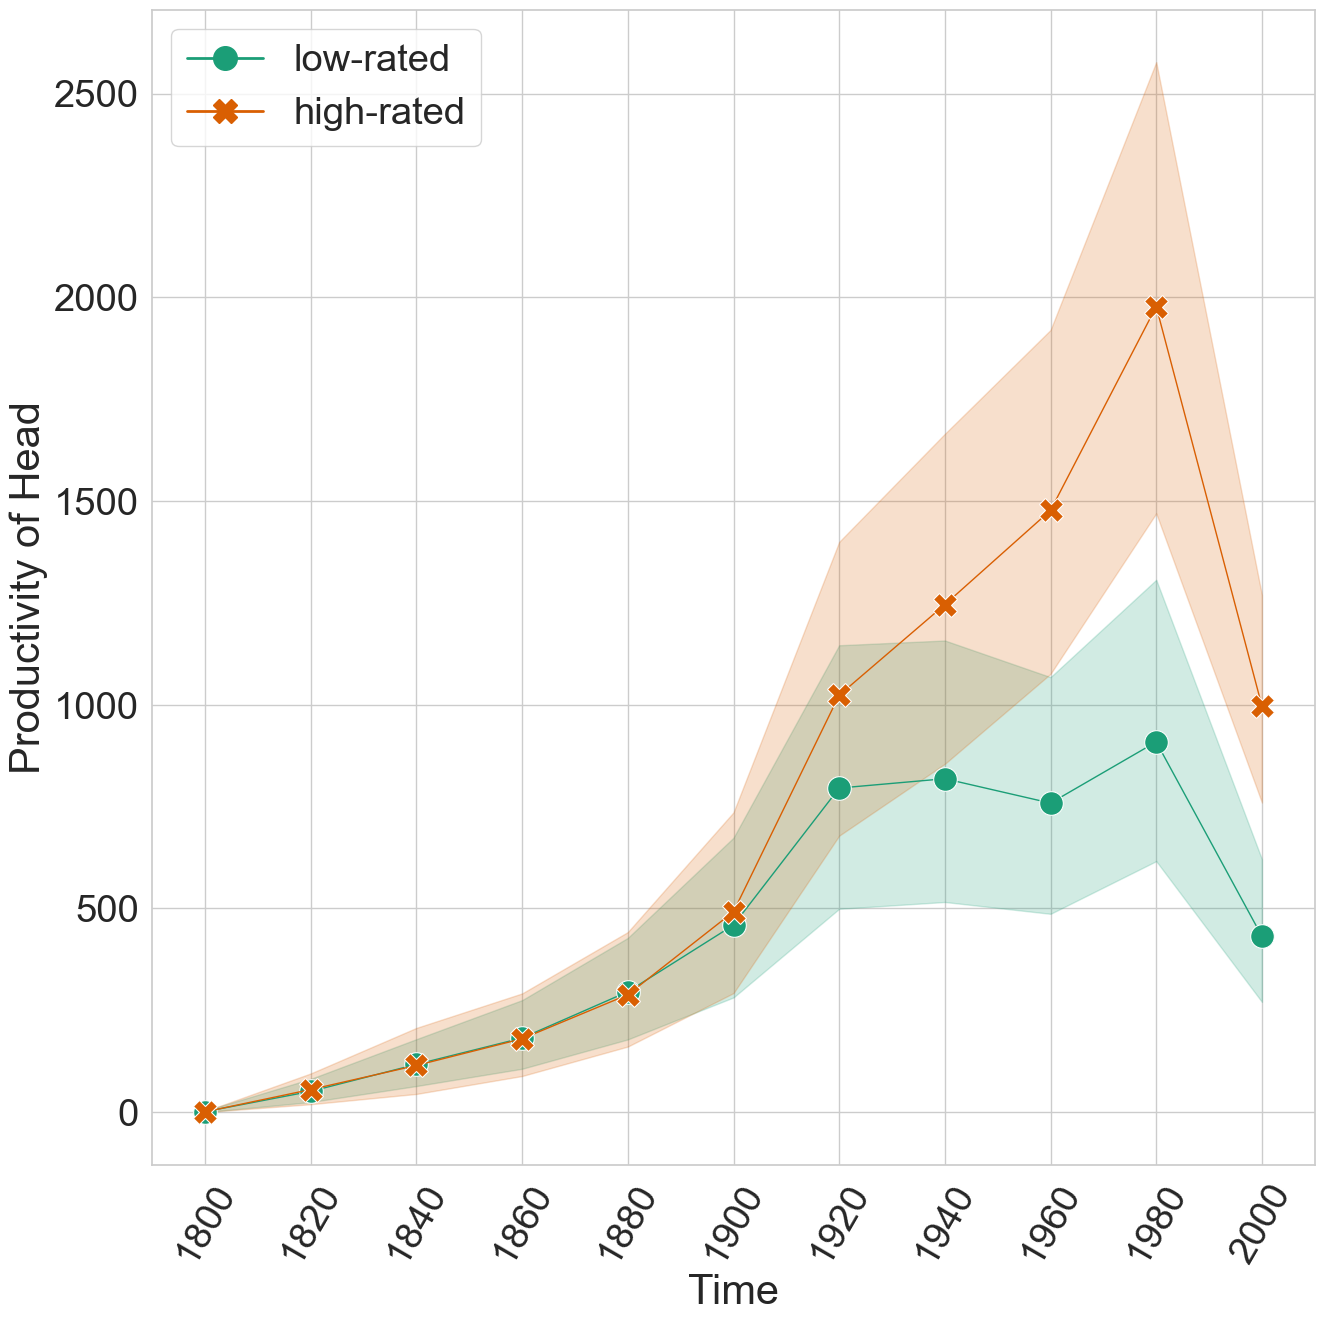

In [320]:
plot_head_prod_df = get_plot_df(head_prod_cols)
plot_head_prod_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="variable", y="value", hue="Compositionality Rating", hue_order=["low-rated", "high-rated"],style="Compositionality Rating",data=plot_head_prod_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.legend(loc='upper left')
g.set_xlabel("Time")
g.set_ylabel("Productivity of Head")
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
save_plots(g, 'head_prod_merged')

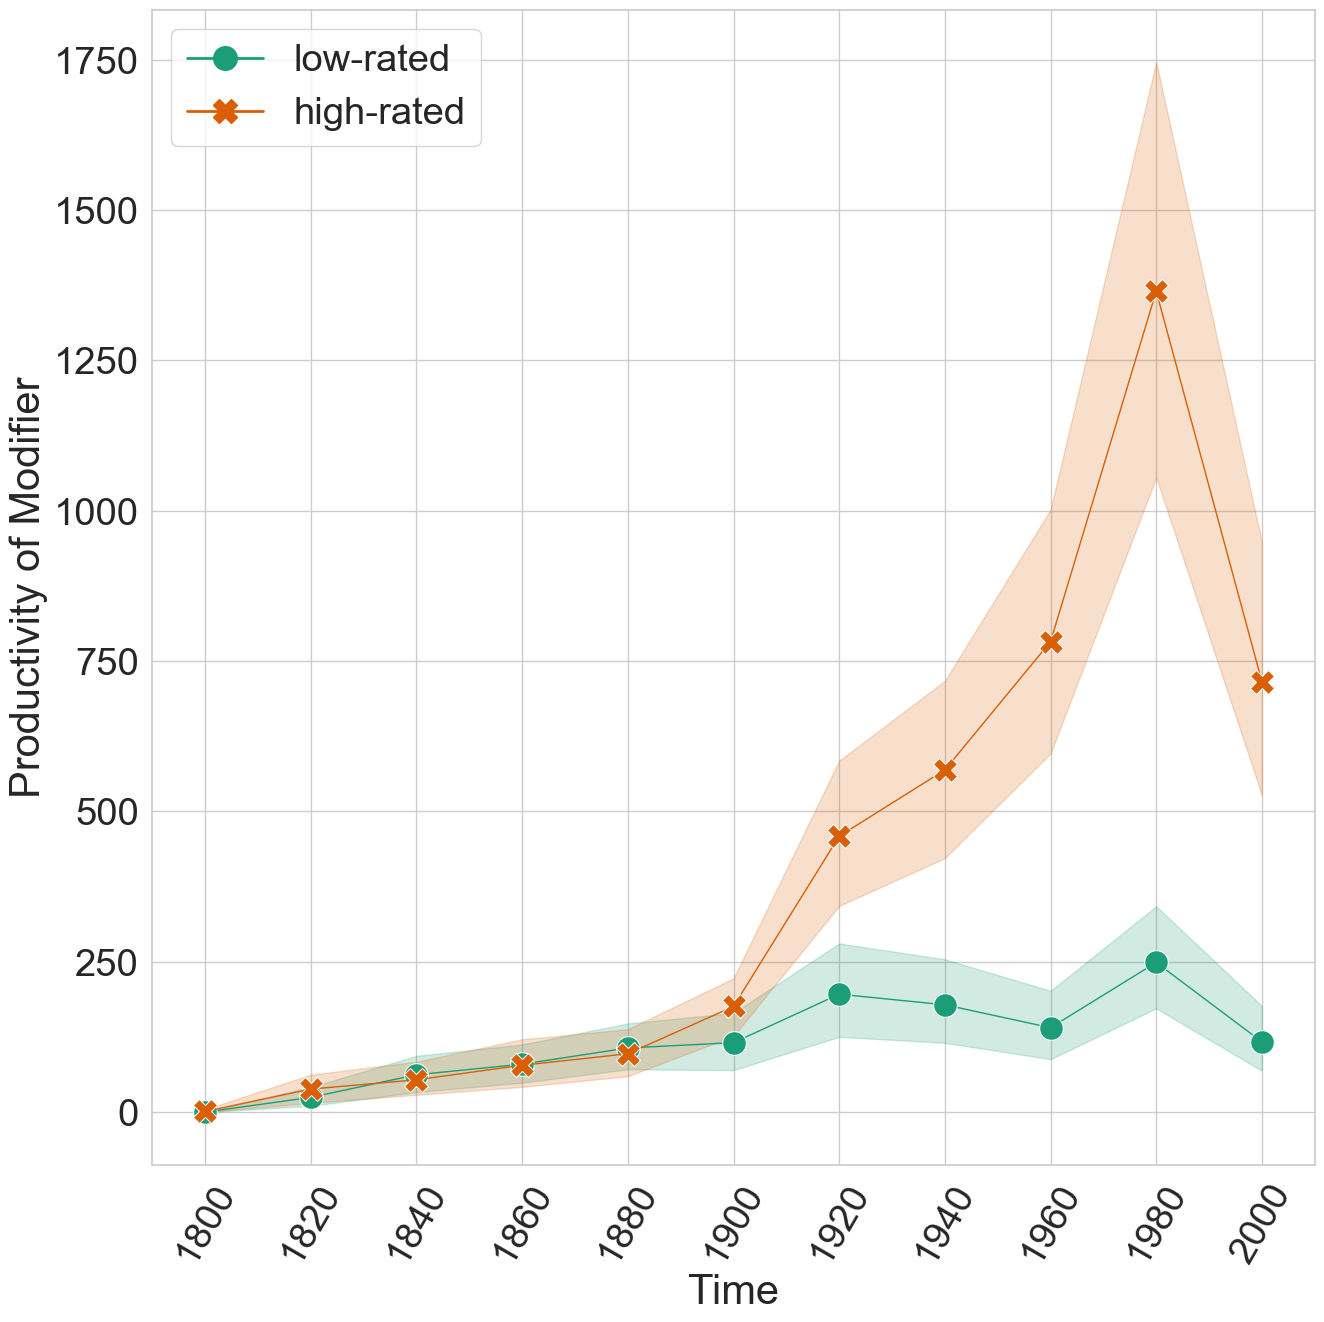

In [321]:
plot_mod_prod_df = get_plot_df(mod_prod_cols)
plot_mod_prod_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="variable", y="value", hue="Compositionality Rating", hue_order=["low-rated", "high-rated"],style="Compositionality Rating",data=plot_mod_prod_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("Productivity of Modifier")
g.legend(loc='upper left')
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
save_plots(g, 'modprod_merged')

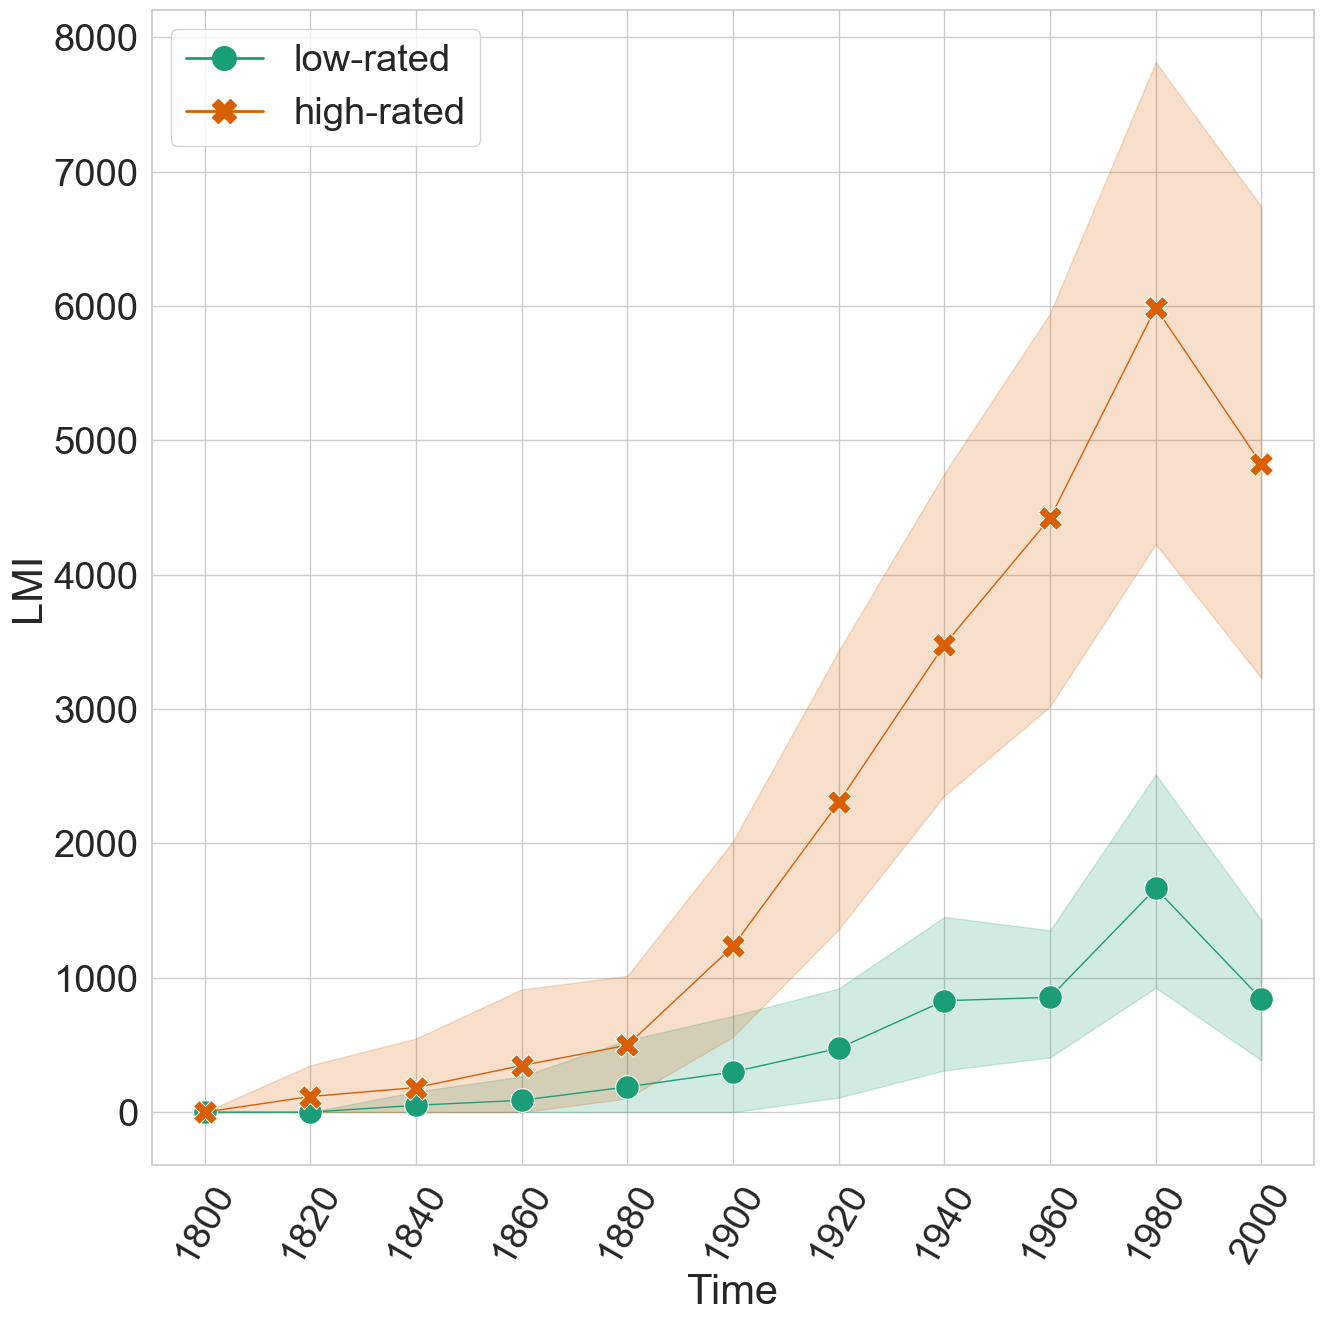

In [322]:
plot_lmi_df = get_plot_df(lmi_cols)
plot_lmi_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="variable", y="value", hue="Compositionality Rating", hue_order=["low-rated", "high-rated"],style="Compositionality Rating",data=plot_lmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("LMI")
g.legend(loc='upper left')
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
save_plots(g, 'LMI_merged')

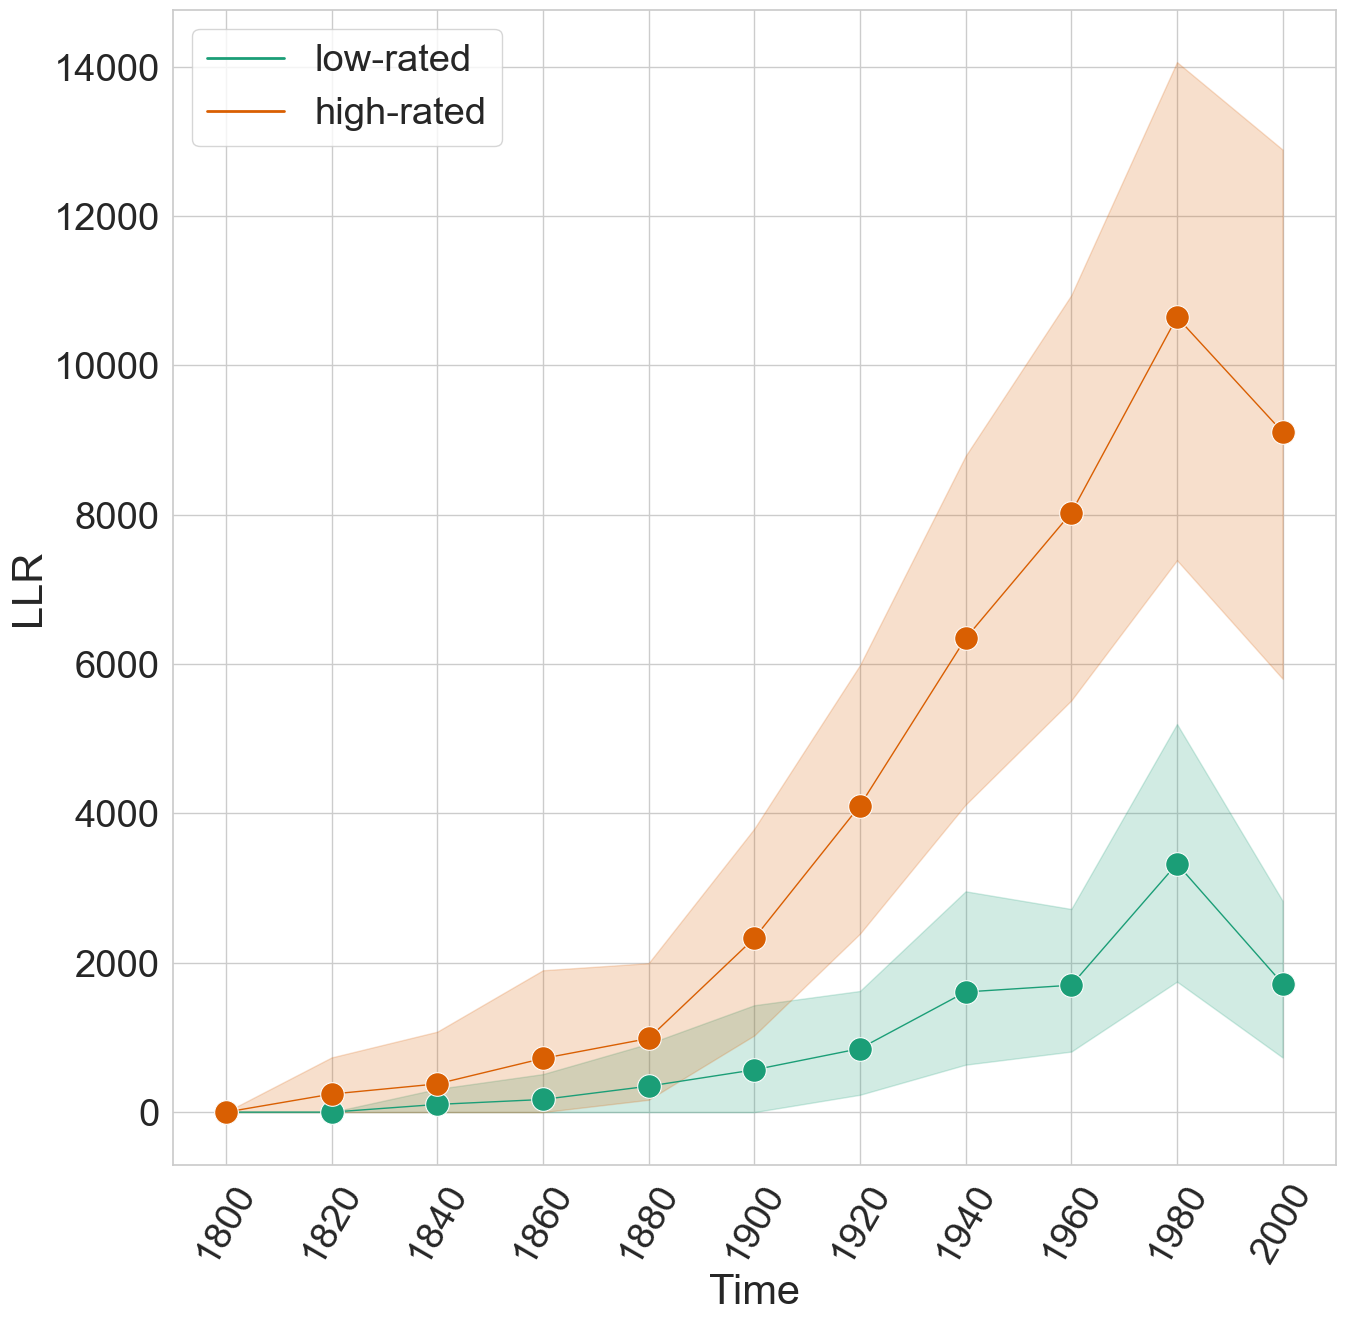

In [323]:
plot_llr_df = get_plot_df(llr_cols)
plot_llr_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="variable", y="value", hue="Compositionality Rating", hue_order=["low-rated", "high-rated"],style="Compositionality Rating",data=plot_llr_df,palette="Dark2", marker='o',linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("LLR")
g.legend(loc='upper left')
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
save_plots(g, 'LLR_merged')

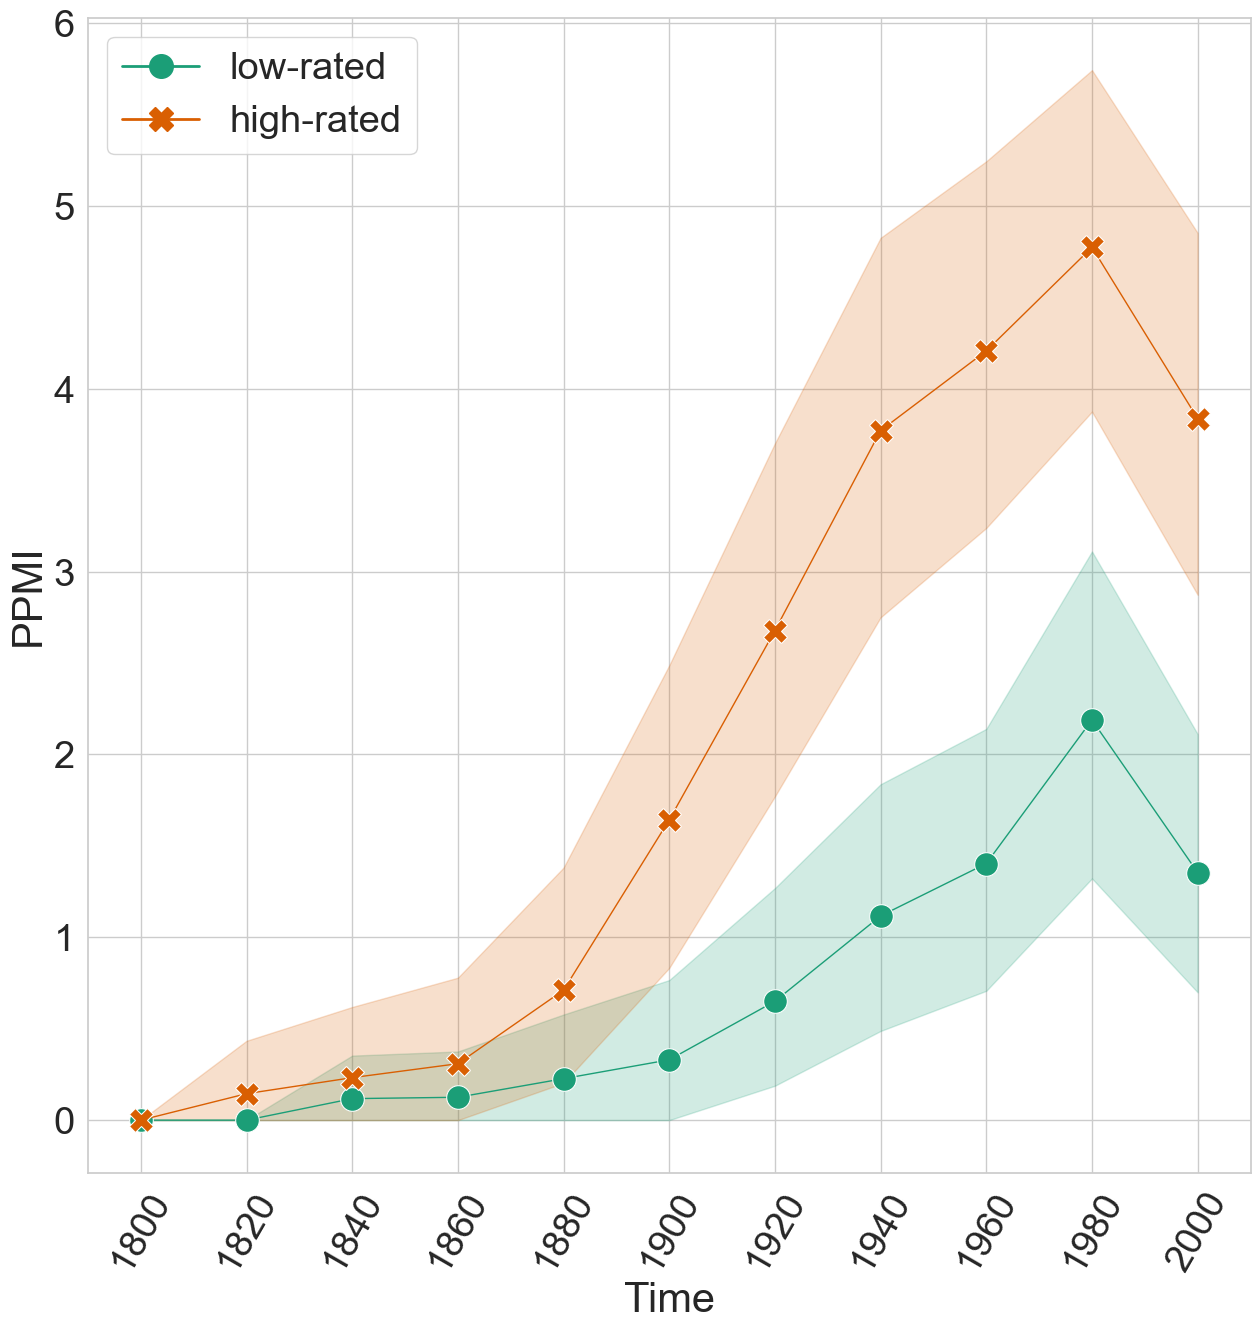

In [324]:
plot_ppmi_df = get_plot_df(ppmi_cols)
plot_ppmi_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="variable", y="value", hue="Compositionality Rating", hue_order=["low-rated", "high-rated"],style="Compositionality Rating",data=plot_ppmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("PPMI")
g.legend(loc='upper left')
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
save_plots(g, 'PPMI_merged')

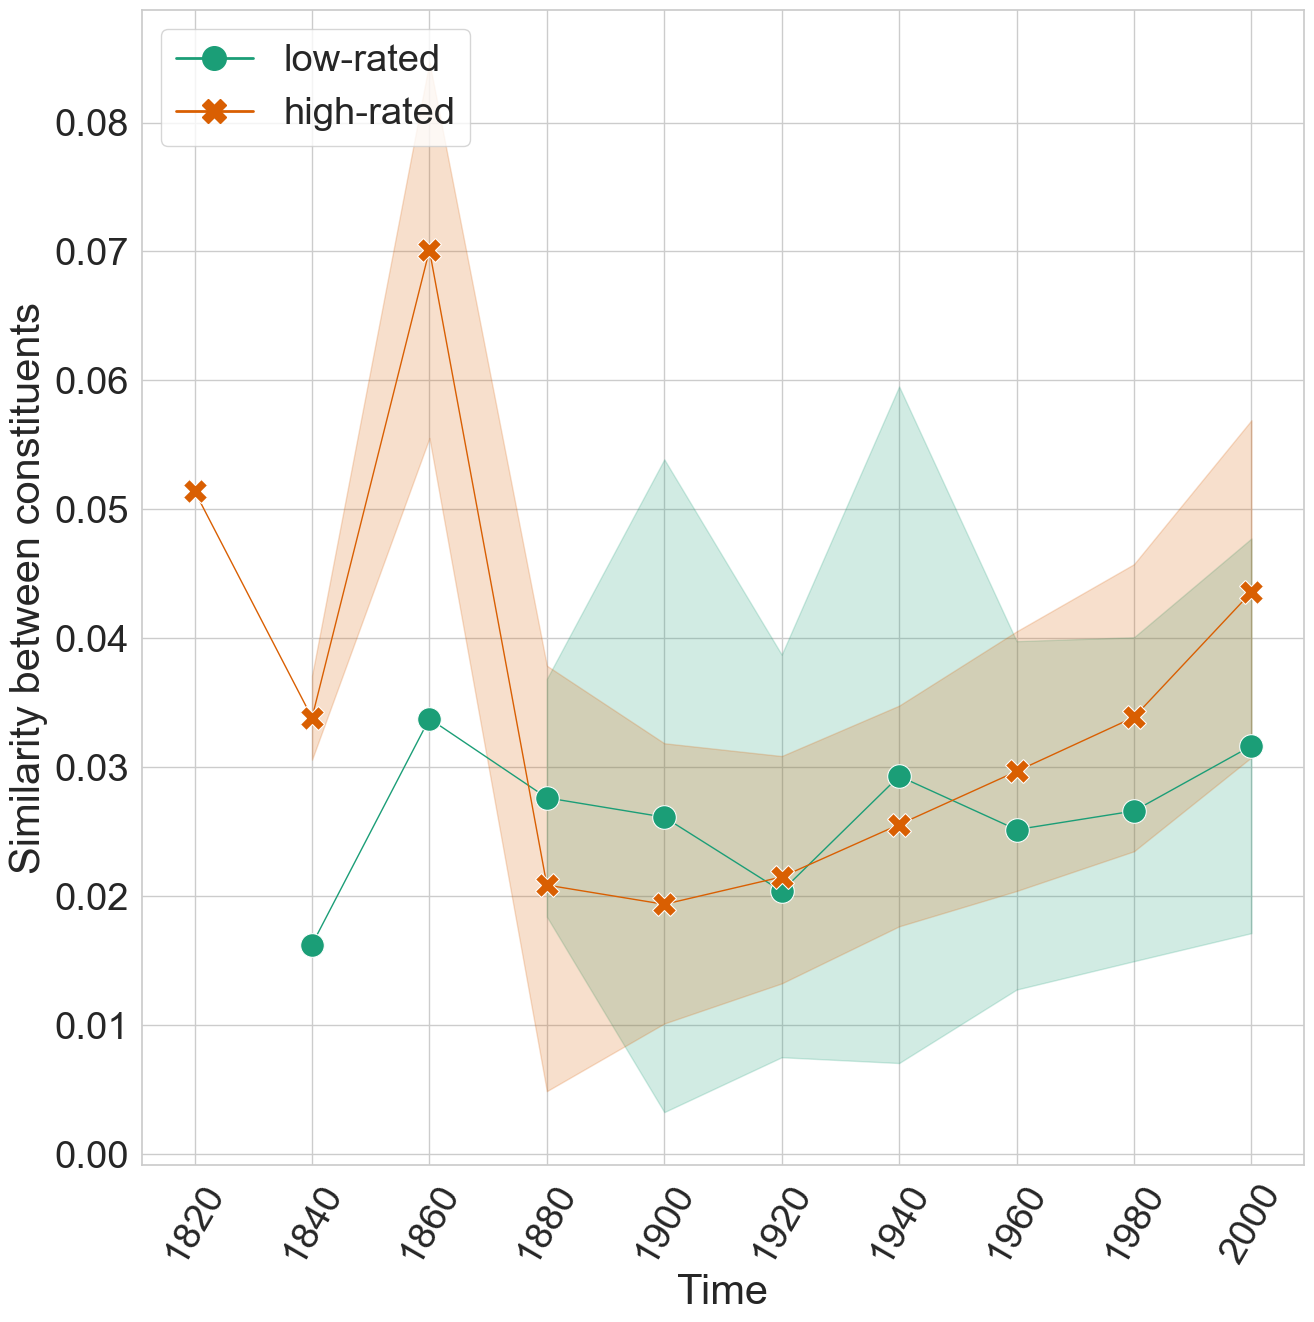

In [325]:
plot_sim_bw_constituents_df = get_plot_df(sim_bw_constituents_cols)
plot_sim_bw_constituents_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="variable", y="value", hue="Compositionality Rating", hue_order=["low-rated", "high-rated"],style="Compositionality Rating",data=plot_sim_bw_constituents_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("Similarity between constituents")
g.legend(loc='upper left')
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
save_plots(g, 'sim-bw-const_merged')

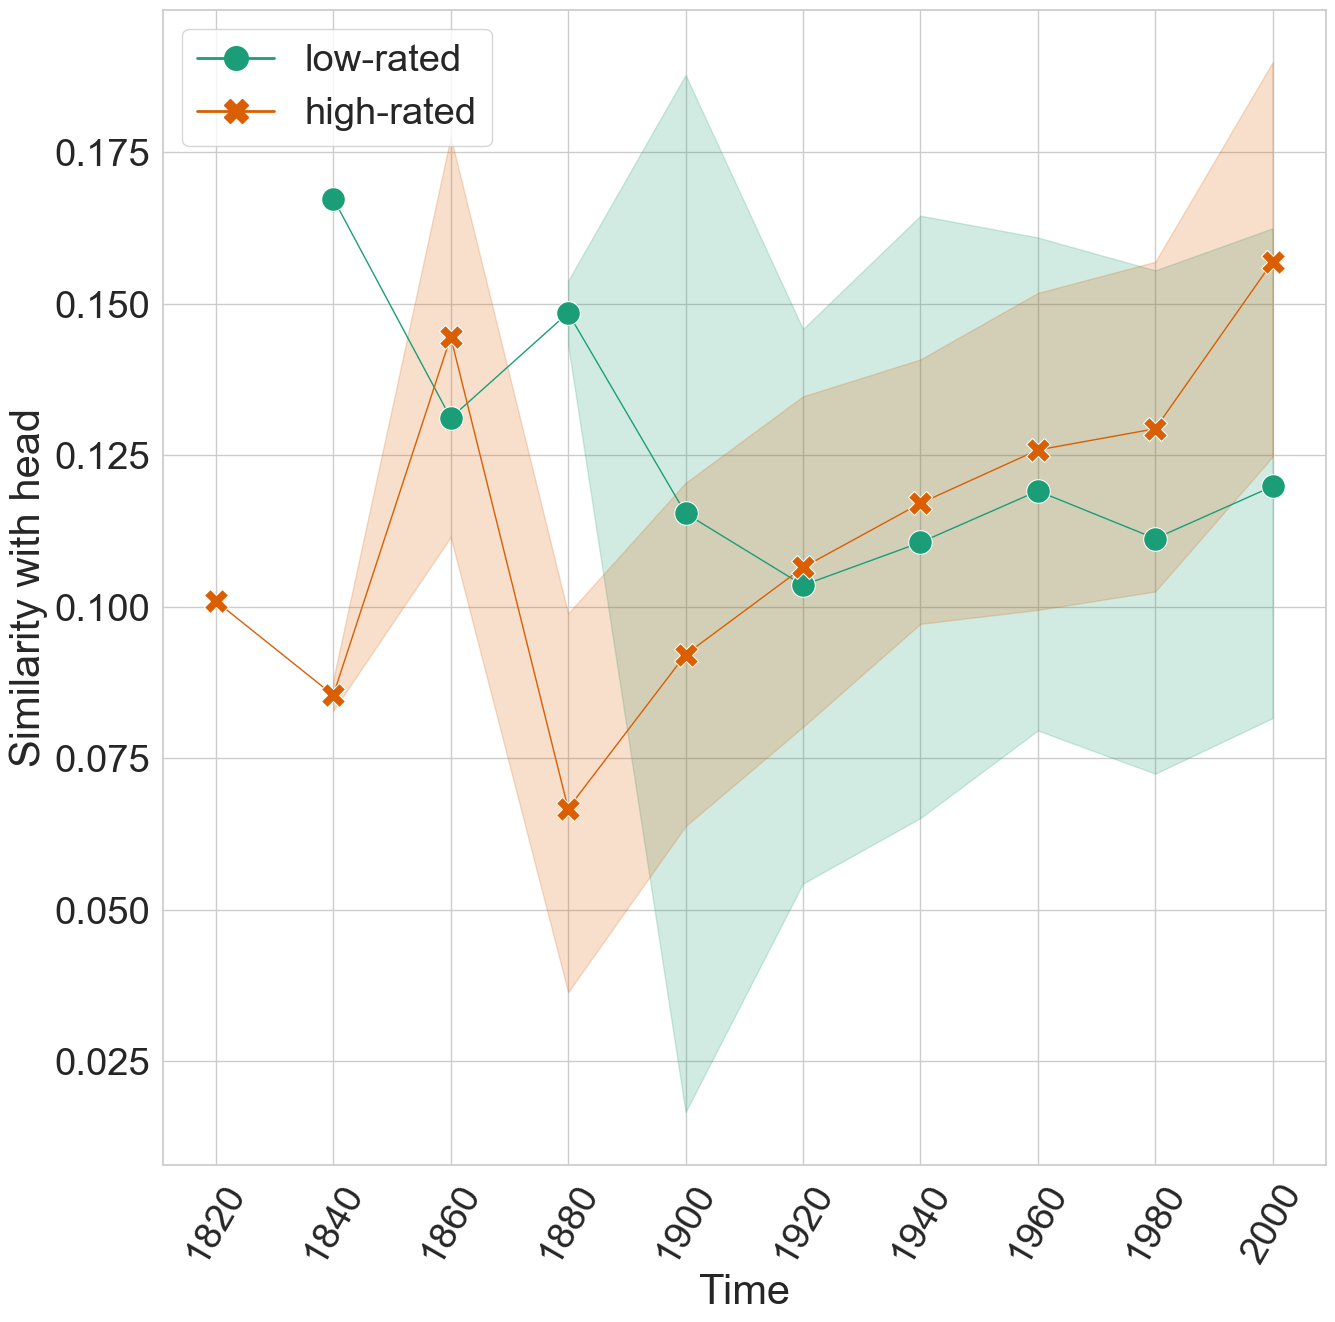

In [326]:
plot_sim_with_head_df = get_plot_df(sim_with_head_cols)
plot_sim_with_head_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="variable", y="value", hue="Compositionality Rating", hue_order=["low-rated", "high-rated"],style="Compositionality Rating",data=plot_sim_with_head_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("Similarity with head")
g.legend(loc='upper left')
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
save_plots(g, 'sim-with-head_merged')

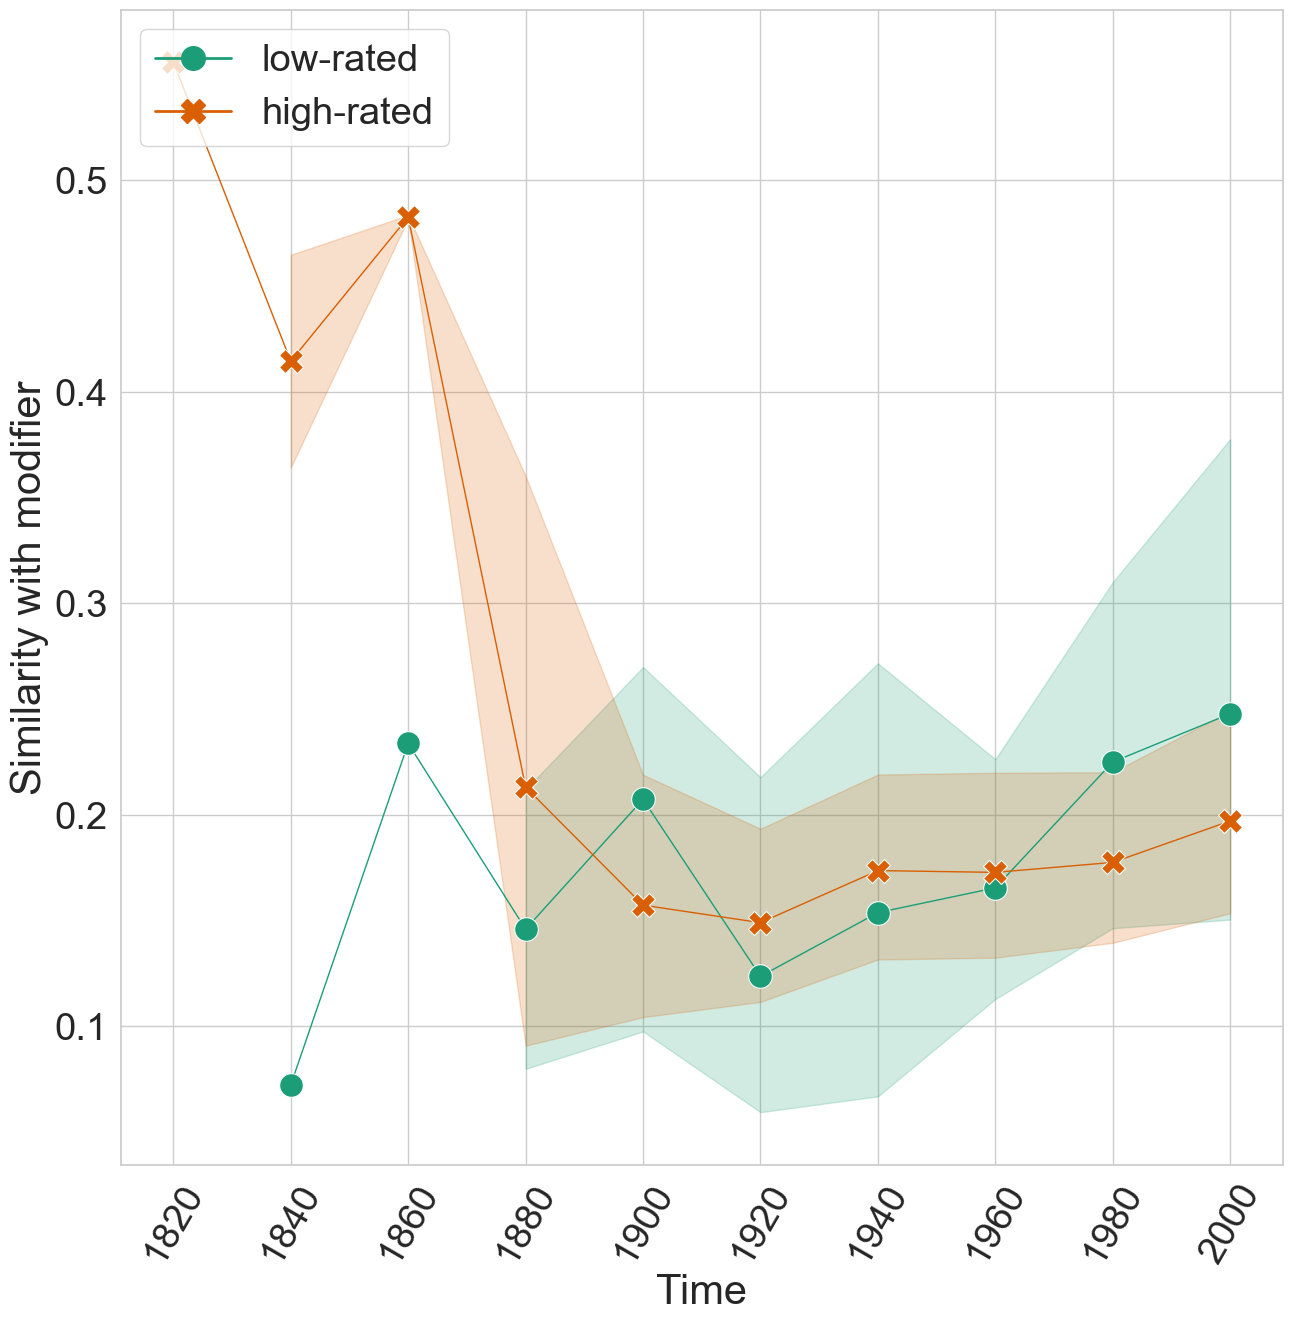

In [327]:
plot_sim_with_modifier_df = get_plot_df(sim_with_modifier_cols)
plot_sim_with_modifier_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="variable", y="value", hue="Compositionality Rating", hue_order=["low-rated", "high-rated"],style="Compositionality Rating",data=plot_sim_with_modifier_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("Similarity with modifier")
g.legend(loc='upper left')
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
save_plots(g, 'sim-with-mod_merged')

In [159]:
compounds=pd.read_pickle(compoundfile)
compounds["compound"] = compounds["modifier"].str.split("_").str[0]+" "+compounds["head"].str.split("_").str[0]
compounds = compounds.groupby(["compound", "modifier", "head", "year"])[["count"]].agg("sum").reset_index()
compounds.head()

compound modifier            head  year  count
0      ! asset  !_PROPN      asset_NOUN  1905     12
1     ! bishop  !_PROPN     bishop_NOUN  1969     12
2  ! commision  !_PROPN  commision_NOUN  1925     12
3   ! daughter  !_PROPN   daughter_NOUN  1883     12
4       ! deal   !_NOUN       deal_NOUN  2006      3

In [108]:
merge_df_aware=features[['modifier','head','compound_rating']].merge(compounds.reset_index(),on=['modifier','head'],how='inner')
#merge_df_aware.set_index(["modifier", "head",'year','compound_rating'], inplace = True)
merge_df_aware.head()

Empty DataFrame
Columns: [modifier, head, compound_rating, index, num_comp, context, year, comp_ner_sent, count]
Index: []

In [24]:
def cosine(row1,row2):
    if row1.name[:-2]!=row2.name[:-2]:
        return np.nan
    else:
        denom1=np.sqrt(np.sum(np.square(row1)))
        denom2=np.sqrt(np.sum(np.square(row2)))
        num=np.sum(row1*row2)
        return num/(denom1*denom2)

In [25]:
cosine(merge_df_aware.iloc[2-1],merge_df_aware.iloc[2])

nan

In [26]:
cosine_compound_agnostic=[np.nan]
for i in range(1,merge_df_aware.shape[0]):
    cosine_compound_agnostic.append(cosine(merge_df_aware.iloc[i-1],merge_df_aware.iloc[i]))

In [27]:
merge_df_aware['compound_cosine']=cosine_compound_agnostic
compound_df=pd.pivot_table(merge_df_aware.reset_index(), values = 'compound_cosine', index=['modifier','head','compound_rating'], columns = 'time')

In [28]:
compound_df.reset_index(inplace=True)
compound_df['compound']=compound_df['modifier'].str[:-5]+' '+compound_df['head'].str[:-5]
compound_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_compound_df=plot_compound_df.loc[plot_compound_df['compound'].isin(selected_compounds)]
#compound_df.set_index('compound',inplace=True)
#plot_compound_df=plot_compound_df[plot_compound_df.columns[10:]]
plot_compound_df=pd.melt(compound_df,id_vars=['compound','compound_rating'],
                        value_vars=[c for c in compound_df.columns if c not in ("compound_rating", "compound")])

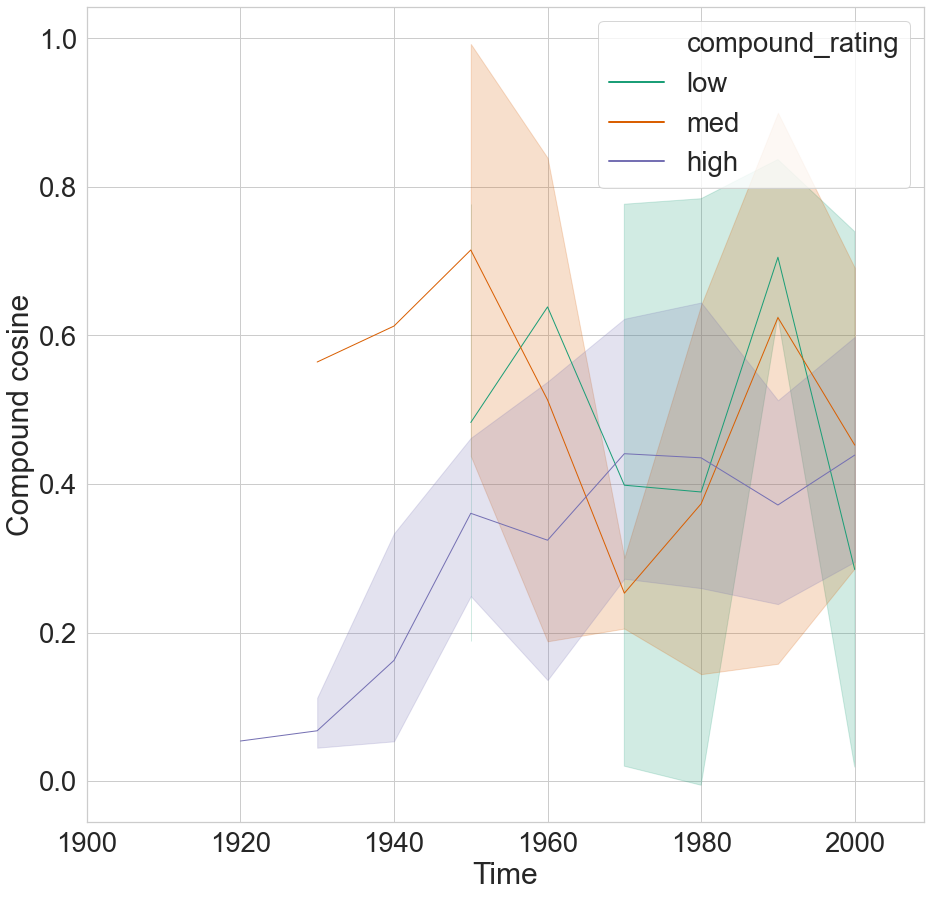

In [29]:
plt.figure(figsize=(15,15))
g=sns.lineplot(x="time", y="value", hue="compound_rating", hue_order=["low", "med", "high"],style="compound_rating",data=plot_compound_df,palette="Dark2",linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("Compound cosine")
#g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"])
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
g.set_xlim(1900, 2009)
plt.savefig(plotdir+'compound-cosine_{}_{}_{}_{}.png'.format(mode, timespan, cutoff, dimension), dpi=300)
plt.savefig(plotdir+'compound-cosine_{}_{}_{}_{}.jpg'.format(mode, timespan, cutoff, dimension), dpi=300)
plt.savefig(plotdir+'compound-cosine_{}_{}_{}_{}.tiff'.format(mode, timespan, cutoff, dimension), dpi=300)
if use_pgf:
    plt.savefig(plotdir+'compound-cosine_{}_{}_{}_{}.pgf'.format(mode, timespan, cutoff, dimension))

In [25]:
heads=pd.read_pickle(constituentsfile)
#heads.index.set_names('head',level=0,inplace=True)
heads.head()

head  num_comp       context  year comp_ner_sent  count
0   #_NOUN      True        b_NOUN  1817                    1
1   #_NOUN      True   borrow_VERB  1817                    1
2   #_NOUN      True       can_AUX  1817                    1
3  &_PROPN      True       :_PUNCT  1818           GPE      2
4  &_PROPN      True  harper_PROPN  1818           GPE      2

In [26]:
merge_df_aware_heads=features[['modifier','head']].merge(heads.reset_index(),on=['head'],how='inner')
merge_df_aware_heads.set_index(["modifier", "head",'time'], inplace = True)
merge_df_aware_heads.head()

KeyError: "None of ['time'] are in the columns"

In [32]:
cosine_head_agnostic=[np.nan]
for i in range(1,merge_df_aware_heads.shape[0]):
    cosine_head_agnostic.append(cosine(merge_df_aware_heads.iloc[i-1],merge_df_aware_heads.iloc[i]))


In [33]:
merge_df_aware_heads['head_cosine']=cosine_head_agnostic
head_df=pd.pivot_table(merge_df_aware_heads.reset_index(), values = 'head_cosine', index=['modifier','head'], columns = 'time')

In [34]:
plot_head_df=head_df.reset_index()
plot_head_df['compound']=plot_head_df['modifier'].str[:-5]+' '+plot_head_df['head'].str[:-5]
plot_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_head_df.set_index('compound',inplace=True)

In [ ]:
# Add counts
compounds=pd.read_csv("../../../Compounding/coha_compounds/compounds.csv",sep="\t")
compounds["compound"] = compounds["modifier"].str[:-5]+" "+compounds["head"].str[:-5]
compounds = compounds.groupby(["compound", "modifier", "head", "year"])[["count"]].agg("sum").reset_index()
modifiers=pd.read_csv("../../../Compounding/coha_compounds/modifiers.csv",sep="\t")
modifiers = modifiers.groupby(["modifier", "year"])[["count"]].agg("sum").reset_index()
heads=pd.read_csv("../../../Compounding/coha_compounds/heads.csv",sep="\t")
heads = heads.groupby(["head", "year"])[["count"]].agg("sum").reset_index()

FileNotFoundError: [Errno 2] No such file or directory: '../../../Compounding/coha_compounds/compounds.csv'

In [36]:
merge_df = pd.merge(compounds, modifiers, on=["modifier", "year"])
merge_df = pd.merge(merge_df, heads, on=["head", "year"])
merge_df = merge_df[["compound","year","count_x","count_y","count"]]
merge_df.columns = ["compound_surface","year", "compound","mod","head"]
merge_df = merge_df.groupby(["compound_surface", "year"])[["compound", "mod", "head"]].agg("sum").reset_index()
merge_df = pd.melt(merge_df, id_vars=["compound_surface", "year"], var_name="type", value_name="count")
merge_df

compound_surface  year      type  count
0                     -- --  1870  compound      1
1                     -- --  1880  compound      2
2                     -- --  1910  compound      1
3                 -- cherry  2000  compound      1
4              -- community  2000  compound      2
...                     ...   ...       ...    ...
978682       zweite stadium  1890      head      1
978683  zworykin television  1980      head    246
978684        zworykin tube  1980      head    177
978685         zydeco music  1990      head    708
978686       zymase present  1980      head    109

[978687 rows x 4 columns]

In [304]:
sim_with_head_df=features.set_index(["modifier", "head"])[sim_with_head_cols]
sim_with_head_df.columns=[v.split(":")[1] for v in sim_with_head_df.columns]
plot_sim_with_head_df=sim_with_head_df.reset_index()
plot_sim_with_head_df['compound']=plot_sim_with_head_df['modifier']+' '+plot_sim_with_head_df['head']
plot_sim_with_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_sim_with_head_df.set_index('compound',inplace=True)
plot_sim_with_head_df = plot_sim_with_head_df.stack().reset_index()
plot_sim_with_head_df.columns=["compound", "year", "value"]
plot_sim_with_head_df['Feature'] = "sim_with_head"

sim_with_mod_df=features.set_index(["modifier", "head"])[sim_with_modifier_cols]
sim_with_mod_df.columns=[v.split(":")[1] for v in sim_with_mod_df.columns]
plot_sim_with_mod_df=sim_with_mod_df.reset_index()
plot_sim_with_mod_df['compound']=plot_sim_with_mod_df['modifier']+' '+plot_sim_with_mod_df['head']
plot_sim_with_mod_df.drop(['modifier','head'],axis=1,inplace=True)
plot_sim_with_mod_df.set_index('compound',inplace=True)
plot_sim_with_mod_df = plot_sim_with_mod_df.stack().reset_index()
plot_sim_with_mod_df.columns=["compound", "year", "value"]
plot_sim_with_mod_df['Feature'] = "sim_with_mod"

sim_bw_const_df=features.set_index(["modifier", "head"])[sim_bw_constituents_cols]
sim_bw_const_df.columns=[v.split(":")[1] for v in sim_bw_const_df.columns]
plot_sim_bw_const_df=sim_bw_const_df.reset_index()
plot_sim_bw_const_df['compound']=plot_sim_bw_const_df['modifier']+' '+plot_sim_bw_const_df['head']
plot_sim_bw_const_df.drop(['modifier','head'],axis=1,inplace=True)
plot_sim_bw_const_df.set_index('compound',inplace=True)
plot_sim_bw_const_df = plot_sim_bw_const_df.stack().reset_index()
plot_sim_bw_const_df.columns=["compound", "year", "value"]
plot_sim_bw_const_df['Feature'] = "sim_bw_constituents"

plot_sim_head_mod_df = plot_sim_with_head_df.append(plot_sim_with_mod_df)
plot_sim_head_mod_df = plot_sim_head_mod_df.append(plot_sim_bw_const_df)

plot_sim_head_mod_df = plot_sim_head_mod_df[plot_sim_head_mod_df.value != 0]
plot_sim_head_mod_df.year = pd.to_numeric(plot_sim_head_mod_df.year)

/tmp/ipykernel_1972184/2970699408.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_sim_head_mod_df = plot_sim_with_head_df.append(plot_sim_with_mod_df)
/tmp/ipykernel_1972184/2970699408.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_sim_head_mod_df = plot_sim_head_mod_df.append(plot_sim_bw_const_df)


In [161]:
for i in plot_sim_head_mod_df[["compound"]].drop_duplicates().values.tolist():
    i = i[0]
    if compounds[compounds[["compound"]] == i]["count"].sum() >= 200:
        print(i, compounds[compounds.compound == i]["count"].sum())

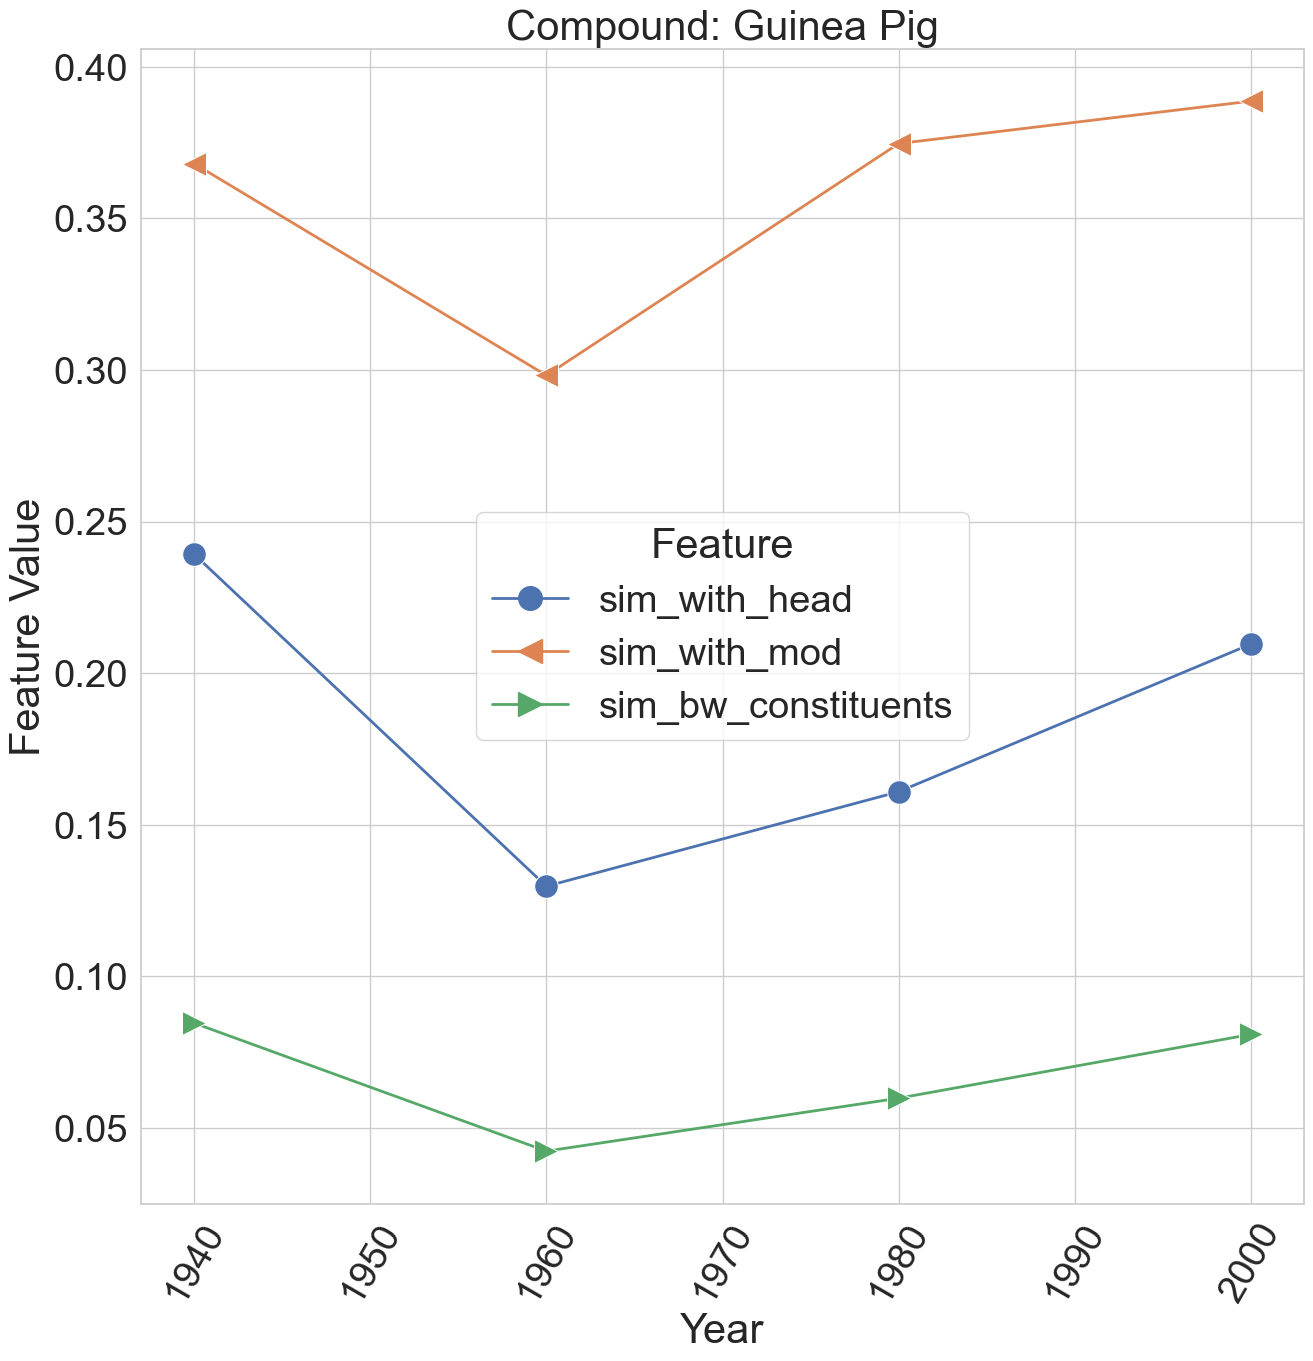

In [312]:
for i in plot_sim_head_mod_df.compound.unique():
    if i == "guinea pig":
    #if compounds[compounds.compound == i]["count"].sum() >= 200:
        #fig, ax = plt.subplots(1, 2, figsize=(20,10))
        plt.figure(figsize=(15,15))
        """
        h=sns.lineplot(x = "year", y = "count", data=merge_df.loc[merge_df['compound_surface'] == i],
                      style = "type",
                      hue = "type",
                      markers=['o', '<', '>'],
                      dashes = False,
                      palette = "Paired",
                      ax = ax[0])
        h.set_title(i)
        """
        g=sns.lineplot(x = "year", y = "value", data=plot_sim_head_mod_df.loc[plot_sim_head_mod_df['compound'] == i],
                       hue = "Feature",
                       style = "Feature",
                       #palette="Set2", 
                       markers=['o', '<', '>'],
                       linewidth = 2,
                       legend = "brief",
                       dashes = False,
                       sort = True,
                       #ax = ax[1]
                      )
        #g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
        #g.xaxis.set_major_locator(ticker.MultipleLocator(20))
        g.set_title("Compound: " + i.title())
        g.set_xlabel("Year")
        g.set_ylabel("Feature Value")
        plt.setp(g.get_xticklabels(), rotation=60)
        plt.savefig(plotdir+'single_compounds_sims_{}.png'.format(i), dpi=300)
        #plt.savefig(plotdir+'single_compounds_sims_{}.jpg'.format(i), dpi=300)
        #plt.savefig(plotdir+'single_compounds_sims_{}.tiff'.format(i), dpi=300)
        if use_pgf:
            plt.savefig(plotdir+'single_compounds_sims_{}.pgf'.format(i))
        plt.show()

In [306]:
mod_prod_df=features.set_index(["modifier", "head"])[mod_prod_cols]
mod_prod_df.columns=[v.split(":")[1] for v in mod_prod_df.columns]
plot_mod_prod_df=mod_prod_df.reset_index()
plot_mod_prod_df['compound']=plot_mod_prod_df['modifier']+' '+plot_mod_prod_df['head']
plot_mod_prod_df.drop(['modifier','head'],axis=1,inplace=True)
plot_mod_prod_df.set_index('compound',inplace=True)
plot_mod_prod_df = plot_mod_prod_df.stack().reset_index()
plot_mod_prod_df.columns=["compound", "year", "value"]
plot_mod_prod_df['Feature'] = "mod_prod"

head_prod_df=features.set_index(["modifier", "head"])[head_prod_cols]
head_prod_df.columns=[v.split(":")[1] for v in head_prod_df.columns]
plot_head_prod_df=head_prod_df.reset_index()
plot_head_prod_df['compound']=plot_head_prod_df['modifier']+' '+plot_head_prod_df['head']
plot_head_prod_df.drop(['modifier','head'],axis=1,inplace=True)
plot_head_prod_df.set_index('compound',inplace=True)
plot_head_prod_df = plot_head_prod_df.stack().reset_index()
plot_head_prod_df.columns=["compound", "year", "value"]
plot_head_prod_df['Feature'] = "head_prod"

plot_prod_head_mod_df = plot_mod_prod_df.append(plot_head_prod_df)

plot_prod_head_mod_df = plot_prod_head_mod_df[plot_prod_head_mod_df.value != 0]

/tmp/ipykernel_1972184/3035057027.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_prod_head_mod_df = plot_mod_prod_df.append(plot_head_prod_df)


OSError: [Errno 28] No space left on device

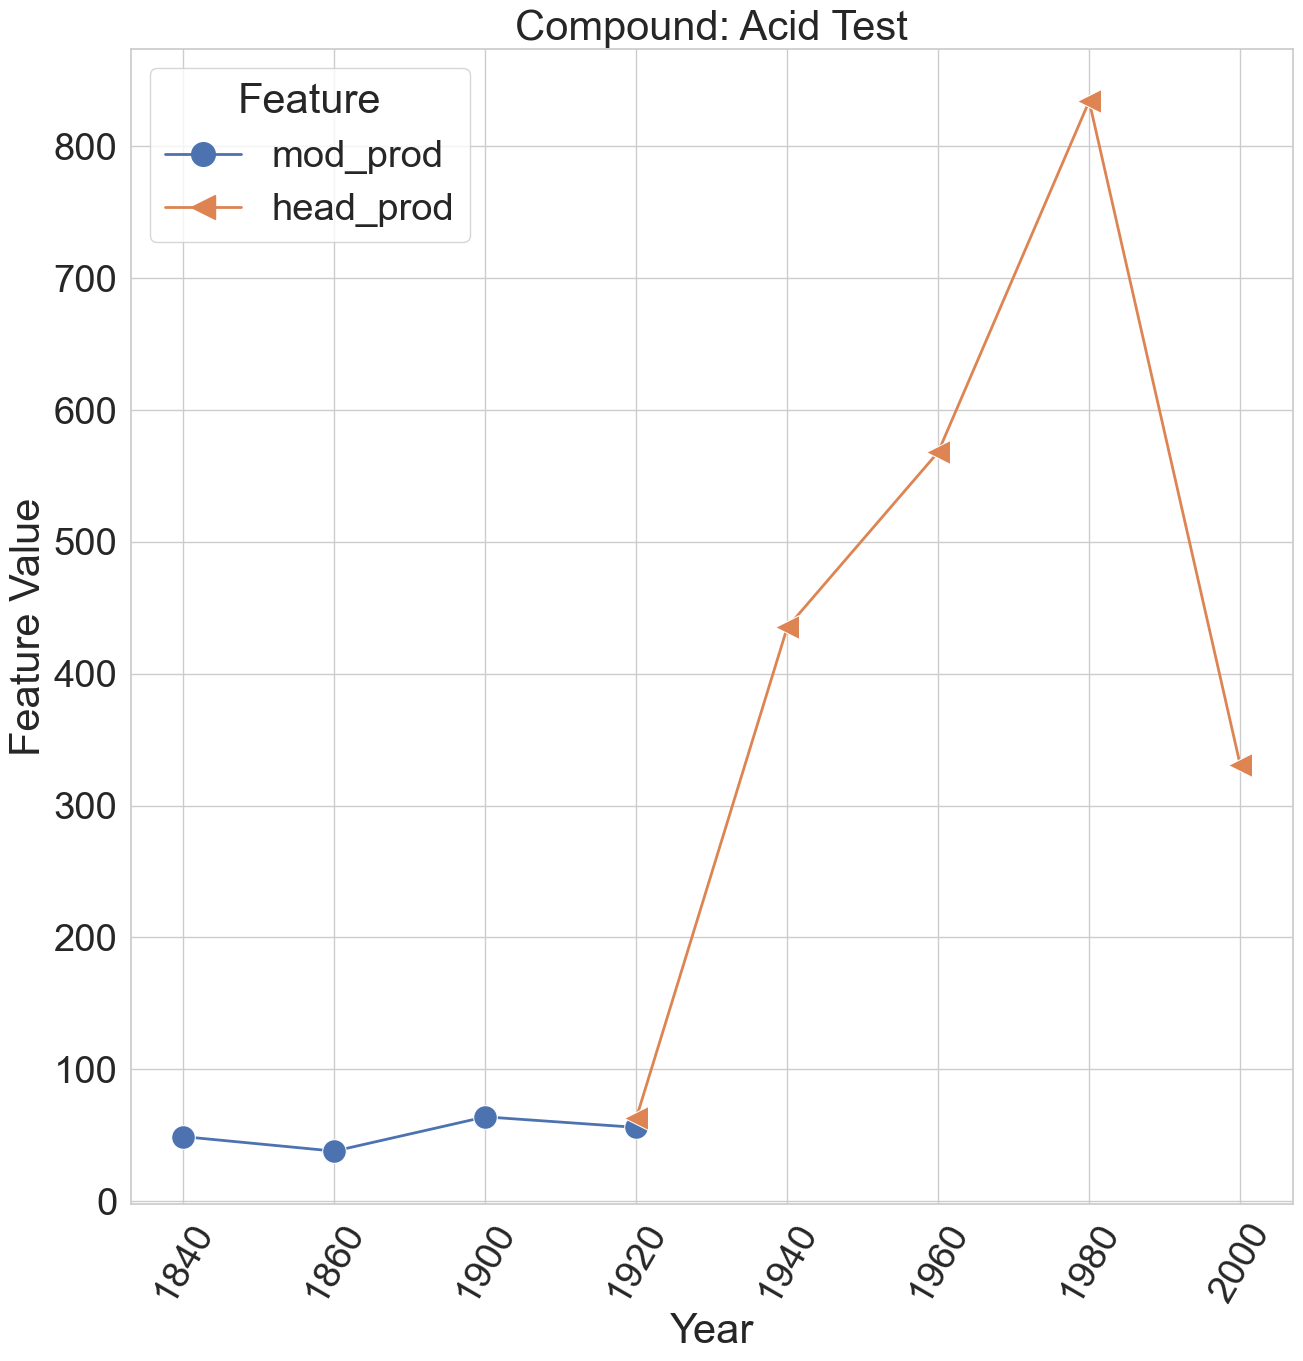

In [200]:
for i in plot_prod_head_mod_df.compound.unique():
    #if compounds[compounds.compound == i]["count"].sum() >= 200:
        #fig, ax = plt.subplots(1,2, figsize=(20,10))
        plt.figure(figsize=(15,15))
        """
        h=sns.lineplot(x = "year", y = "count", data=merge_df.loc[merge_df['compound_surface'] == i],
                      style = "type",
                      hue = "type",
                      markers=['o', '<', '>'],
                      dashes = False,
                      palette = "Paired",
                      ax = ax[0])
        h.set_title(i)
        """
        g=sns.lineplot(x = "year", y = "value", data=plot_prod_head_mod_df.loc[plot_prod_head_mod_df['compound'] == i],
                       hue = "Feature",
                       style = "Feature",
                       #palette="Set2", 
                       markers=['o', '<'],
                       linewidth = 2,
                       legend = "brief",
                       dashes = False,
                       #ax = ax[1]
                      )
        #g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
        #g.xaxis.set_major_locator(ticker.MultipleLocator(20))
        g.set_title("Compound: " + i.title())
        g.set_xlabel("Year")
        g.set_ylabel("Feature Value")
        plt.setp(g.get_xticklabels(), rotation=60)
        plt.savefig(plotdir+'single_compounds_prod_{}.png'.format(i), dpi=300)
        #plt.savefig(plotdir+'single_compounds_prod_{}.jpg'.format(i), dpi=300)
        #plt.savefig(plotdir+'single_compounds_prod_{}.tiff'.format(i), dpi=300)
        if use_pgf:
            plt.savefig(plotdir+'single_compounds_prod_{}.pgf'.format(i))

In [307]:
lmi_df=features.set_index(["modifier", "head"])[lmi_cols]
lmi_df.columns=[v.split(":")[1] for v in lmi_df.columns]
plot_lmi_df=lmi_df.reset_index()
plot_lmi_df['compound']=plot_lmi_df['modifier']+' '+plot_lmi_df['head']
plot_lmi_df.drop(['modifier','head'],axis=1,inplace=True)
plot_lmi_df.set_index('compound',inplace=True)
plot_lmi_df = plot_lmi_df.stack().reset_index()
plot_lmi_df.columns=["compound", "year", "value"]
plot_lmi_df['Feature'] = "lmi"

llr_df=features.set_index(["modifier", "head"])[llr_cols]
llr_df.columns=[v.split(":")[1] for v in llr_df.columns]
plot_llr_df=llr_df.reset_index()
plot_llr_df['compound']=plot_llr_df['modifier']+' '+plot_llr_df['head']
plot_llr_df.drop(['modifier','head'],axis=1,inplace=True)
plot_llr_df.set_index('compound',inplace=True)
plot_llr_df = plot_llr_df.stack().reset_index()
plot_llr_df.columns=["compound", "year", "value"]
plot_llr_df['Feature'] = "llr"

ppmi_df=features.set_index(["modifier", "head"])[ppmi_cols]
ppmi_df.columns=[v.split(":")[1] for v in ppmi_df.columns]
plot_ppmi_df=ppmi_df.reset_index()
plot_ppmi_df['compound']=plot_ppmi_df['modifier']+' '+plot_ppmi_df['head']
plot_ppmi_df.drop(['modifier','head'],axis=1,inplace=True)
plot_ppmi_df.set_index('compound',inplace=True)
plot_ppmi_df = plot_ppmi_df.stack().reset_index()
plot_ppmi_df.columns=["compound", "year", "value"]
plot_ppmi_df['Feature'] = "ppmi"

plot_info_df = plot_lmi_df.append(plot_llr_df)
plot_info_df = plot_info_df.append(plot_ppmi_df)

plot_info_df = plot_info_df[plot_info_df.value != 0]
plot_info_df.year = pd.to_numeric(plot_info_df.year)

/tmp/ipykernel_1972184/3226492110.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_info_df = plot_lmi_df.append(plot_llr_df)
/tmp/ipykernel_1972184/3226492110.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_info_df = plot_info_df.append(plot_ppmi_df)


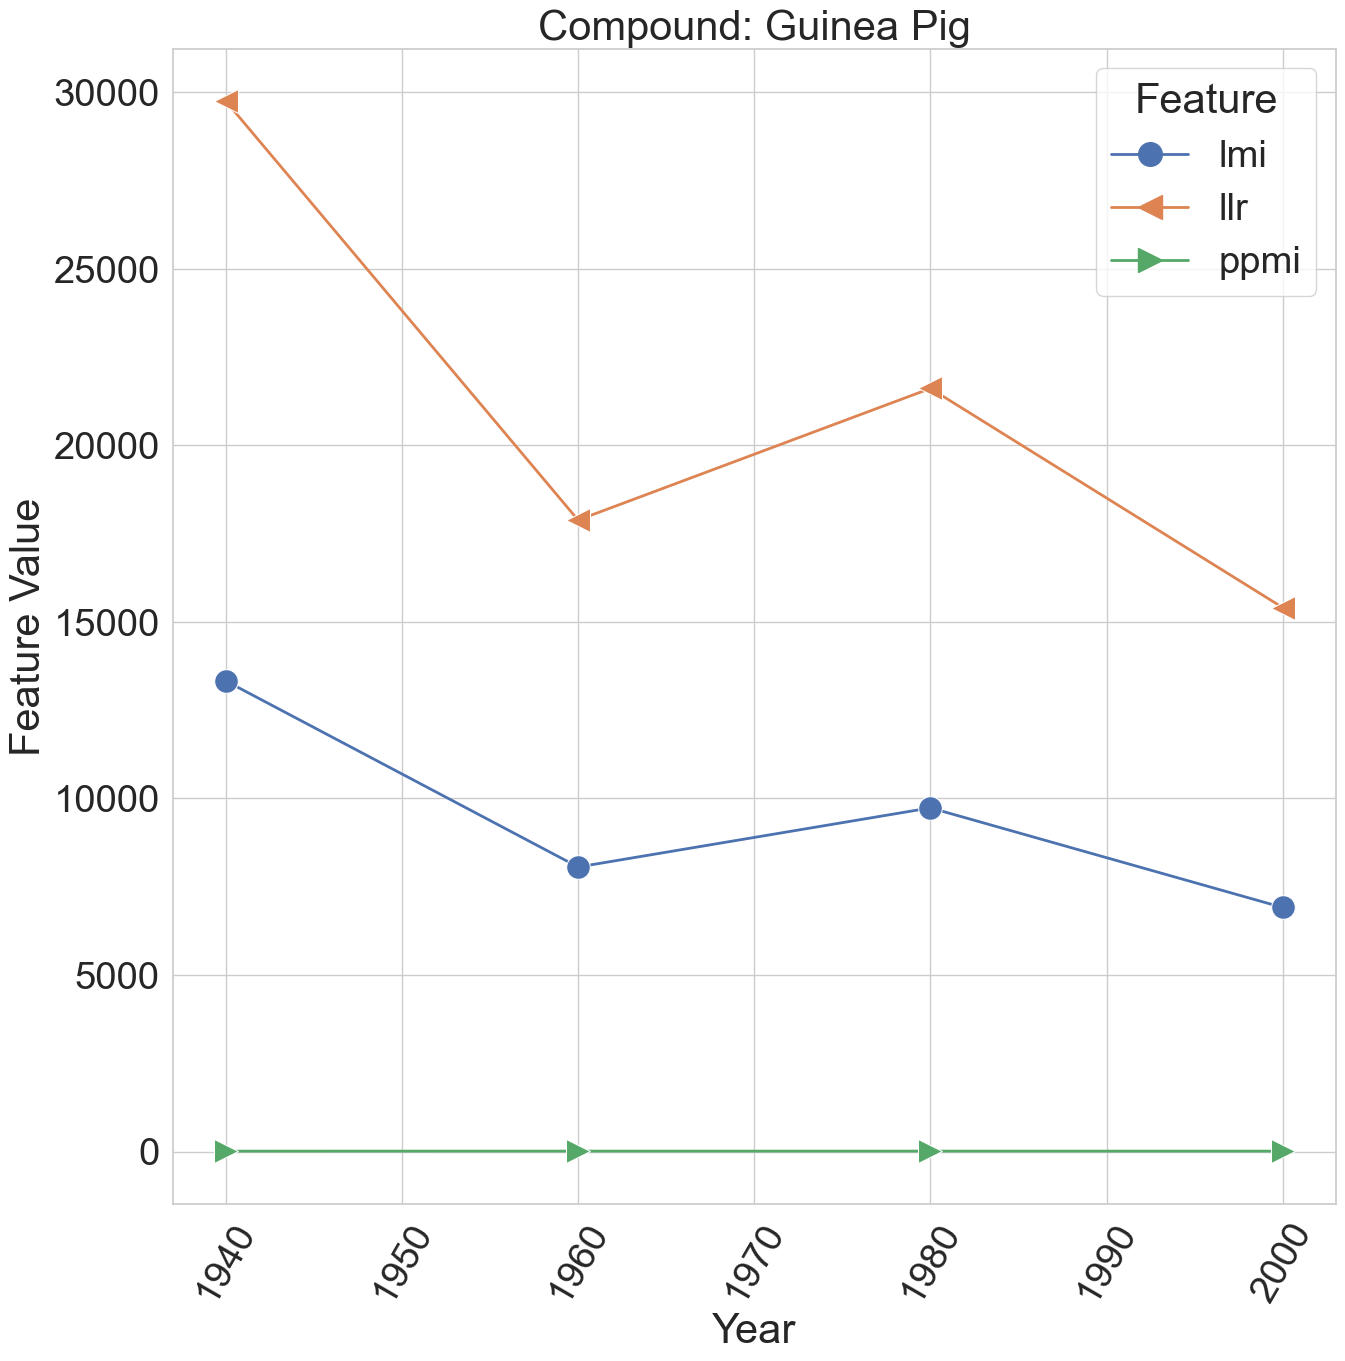

In [310]:
for i in plot_info_df.compound.unique():
    if i == "guinea pig":
    #if compounds[compounds.compound == i]["count"].sum() >= 200:
        #fig, ax = plt.subplots(1,2, figsize=(20,10))
        plt.figure(figsize=(15,15))
        """
        h=sns.lineplot(x = "year", y = "count", data=merge_df.loc[merge_df['compound_surface'] == i],
                      style = "type",
                      hue = "type",
                      markers=['o', '<', '>'],
                      dashes = False,
                      palette = "Paired",
                      ax = ax[0])
        h.set_title(i)
        """
        g=sns.lineplot(x = "year", y = "value", data=plot_info_df.loc[plot_info_df['compound'] == i],
                       hue = "Feature",
                       style = "Feature",
                       #palette="Set2", 
                       markers=['o', '<', '>'],
                       linewidth = 2,
                       legend = "brief",
                       dashes = False,
                       #ax = ax[1]
                      )
        #g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
        #g.xaxis.set_major_locator(ticker.MultipleLocator(20))
        g.set_title("Compound: " + i.title())
        g.set_xlabel("Year")
        g.set_ylabel("Feature Value")
        plt.setp(g.get_xticklabels(), rotation=60)
        plt.savefig(plotdir+'single_compounds_inf_{}.png'.format(i), dpi=300)
        #plt.savefig(plotdir+'single_compounds_inf_{}.jpg'.format(i), dpi=300)
        #plt.savefig(plotdir+'single_compounds_inf_{}.tiff'.format(i), dpi=300)
        if use_pgf:
            plt.savefig(plotdir+'single_compounds_inf_{}.pgf'.format(i))

In [44]:
plot_features_df = pd.concat([plot_info_df, plot_prod_head_mod_df, plot_sim_head_mod_df])

In [45]:
year_token_counts = pd.read_csv('../../data/coha_year_token_count.csv')
year_token_counts.columns = ['year', 'tokencount']
year_token_counts

year  tokencount
0   2000    36346196
1   1990    34499634
2   1980    31014856
3   1920    30884417
4   1950    30043978
5   1930    29779920
6   1940    29644093
7   1960    29363887
8   1970    29109358
9   1910    27415006
10  1900    26455411
11  1890    24365806
12  1880    24198668
13  1870    22376110
14  1860    20414293
15  1850    19814449
16  1840    19247740
17  1830    16555683
18  1820     8363940
19  1810     1478152

In [46]:
plot_count_df = compounds[compounds.compound.isin(plot_features_df.compound.unique())]
plot_count_df = pd.merge(plot_count_df, plot_sim_with_modifier_df[["compound","Compositionality Rating"]], on="compound")
plot_count_df = plot_count_df.merge(year_token_counts, on='year')
plot_count_df["normcount"] = plot_count_df["count"]/plot_count_df["tokencount"]
plot_count_df["normcount"].fillna(0, inplace=True)
plot_count_df["normcount"] -= plot_count_df["normcount"].min()
plot_count_df["normcount"] /= plot_count_df["normcount"].max()
plot_count_df

compound      modifier             head  year  count  \
0        academy award  academy_noun       award_noun  1930      1   
1        academy award  academy_noun       award_noun  1930      1   
2        academy award  academy_noun       award_noun  1930      1   
3        academy award  academy_noun       award_noun  1930      1   
4        academy award  academy_noun       award_noun  1930      1   
...                ...           ...              ...   ...    ...   
6421  peace conference    peace_noun  conference_noun  1880      3   
6422  peace conference    peace_noun  conference_noun  1880      3   
6423  peace conference    peace_noun  conference_noun  1880      3   
6424  peace conference    peace_noun  conference_noun  1880      3   
6425  peace conference    peace_noun  conference_noun  1880      3   

     Compositionality Rating  tokencount  normcount  
0                        med    29779920      0.000  
1                        med    29779920      0.000  
2                        med    29779920      0.000  
3                        med    29779920      0.000  
4                        med    29779920      0.000  
...                      ...         ...        ...  
6421                    high    24198668      0.006  
6422                    high    24198668      0.006  
6423                    high    24198668      0.006  
6424                    high    24198668      0.006  
6425                    high    24198668      0.006  

[6426 rows x 8 columns]

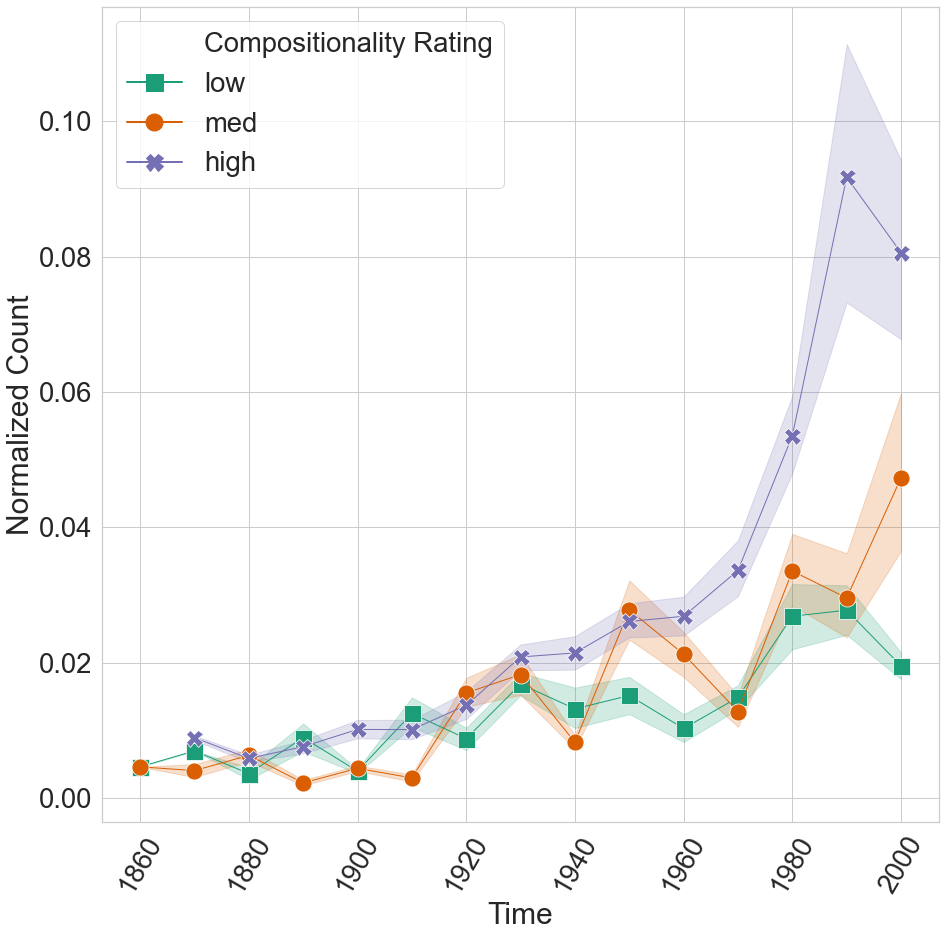

In [47]:
plot_count_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plt.figure(figsize=(15,15))
g=sns.lineplot(x="year", y="normcount", hue="Compositionality Rating", hue_order=["low", "med", "high"], style="Compositionality Rating",data=plot_count_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Time")
g.set_ylabel("Normalized Count")
g.legend(loc='upper left')
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.setp(g.get_xticklabels(), rotation=60)
plt.savefig(plotdir+'compound-counts-merged_{}_{}_{}_{}.png'.format(mode, timespan, cutoff, dimension), dpi=300)
plt.savefig(plotdir+'compound-counts-merged_{}_{}_{}_{}.jpg'.format(mode, timespan, cutoff, dimension), dpi=300)
plt.savefig(plotdir+'compound-counts-merged_{}_{}_{}_{}.tiff'.format(mode, timespan, cutoff, dimension), dpi=300)
if use_pgf:
    plt.savefig(plotdir+'compound-counts-merged_{}_{}_{}_{}.pgf'.format(mode, timespan, cutoff, dimension))

In [72]:
plot_comp_ratings_df = features[["modifier", "head", "modifier_mean", "head_mean", "compound_mean"]]
plot_comp_ratings_df["year"] = 2000
plot_comp_ratings_df['compound']=plot_comp_ratings_df['modifier'].str[:-5]+' '+plot_comp_ratings_df['head'].str[:-5]
plot_comp_ratings_df.drop(['modifier','head'],axis=1,inplace=True)
plot_comp_ratings_df = pd.melt(plot_comp_ratings_df, id_vars=["year","compound"],
                              value_vars=['modifier_mean', 'head_mean', 'compound_mean'])
plot_comp_ratings_df.rename(columns = {'variable':'Feature'}, inplace = True)
plot_comp_ratings_df = plot_comp_ratings_df[['compound', 'year', 'value', 'Feature']]
plot_comp_ratings_df

compound  year  value        Feature
0             web site  2000  2.679  modifier_mean
1           video game  2000  4.500  modifier_mean
2        balance sheet  2000  3.821  modifier_mean
3        radio station  2000  4.655  modifier_mean
4           face value  2000  1.393  modifier_mean
..                 ...   ...    ...            ...
124       cotton candy  2000  1.790  compound_mean
125  insurance company  2000  5.000  compound_mean
126         loan shark  2000  1.000  compound_mean
127        news agency  2000  4.389  compound_mean
128         phone book  2000  4.250  compound_mean

[129 rows x 4 columns]

In [80]:
corr_count_df = plot_count_df[["compound","year","count"]]
corr_count_df["Feature"] = "count"
corr_count_df.rename(columns = {'count':'value'}, inplace = True)
corr_count_df = pd.concat([plot_features_df, corr_count_df])
corr_count_df = pd.concat([plot_comp_ratings_df ,corr_count_df])
corr_count_df.drop_duplicates(inplace=True)
corr_count_df['year'] = pd.to_numeric(corr_count_df['year'])
corr_count_df = corr_count_df.pivot_table(values=['value'], index=['year','compound'], columns=['Feature'])
corr_count_df.columns = corr_count_df.columns.get_level_values(1)
corr_count_df = corr_count_df[["count", "compound_mean", "head_mean", "modifier_mean", "sim_with_head", "sim_with_mod", "head_prod", "mod_prod",
                              "lmi", "llr", "ppmi"]]
corr_count_df

Feature              count  compound_mean  head_mean  modifier_mean  \
year compound                                                         
1860 brick wall      2.000            NaN        NaN            NaN   
     fairy tale      2.000            NaN        NaN            NaN   
1870 balance sheet   1.000            NaN        NaN            NaN   
     brick wall      3.000            NaN        NaN            NaN   
     engine room     3.000            NaN        NaN            NaN   
...                    ...            ...        ...            ...   
2000 shelf life     14.000          1.304      2.174          1.522   
     speed limit    17.000          4.828      4.828          4.933   
     tear gas       15.000          3.273      4.773          2.864   
     video game     49.000          4.600      5.000          4.500   
     web site      174.000          3.786      3.933          2.679   

Feature             sim_with_head  sim_with_mod  head_prod  mod_prod   lmi  \
year compound                                                                
1860 brick wall               NaN           NaN        NaN       NaN   NaN   
     fairy tale               NaN           NaN        NaN       NaN   NaN   
1870 balance sheet            NaN           NaN        NaN       NaN   NaN   
     brick wall               NaN           NaN        NaN       NaN   NaN   
     engine room              NaN           NaN        NaN       NaN   NaN   
...                           ...           ...        ...       ...   ...   
2000 shelf life             0.202         0.036      0.375     0.059 0.724   
     speed limit            0.369         0.274      0.062     0.059 0.992   
     tear gas               0.261         0.135      0.125     0.059 0.893   
     video game             0.369         0.222      0.250     0.118 0.683   
     web site               0.143         0.131      0.062     0.118 0.895   

Feature              llr  ppmi  
year compound                   
1860 brick wall      NaN   NaN  
     fairy tale      NaN   NaN  
1870 balance sheet   NaN   NaN  
     brick wall      NaN   NaN  
     engine room     NaN   NaN  
...                  ...   ...  
2000 shelf life    0.641 0.730  
     speed limit   0.992 0.999  
     tear gas      0.816 0.894  
     video game    0.522 0.687  
     web site      0.818 0.894  

[371 rows x 11 columns]

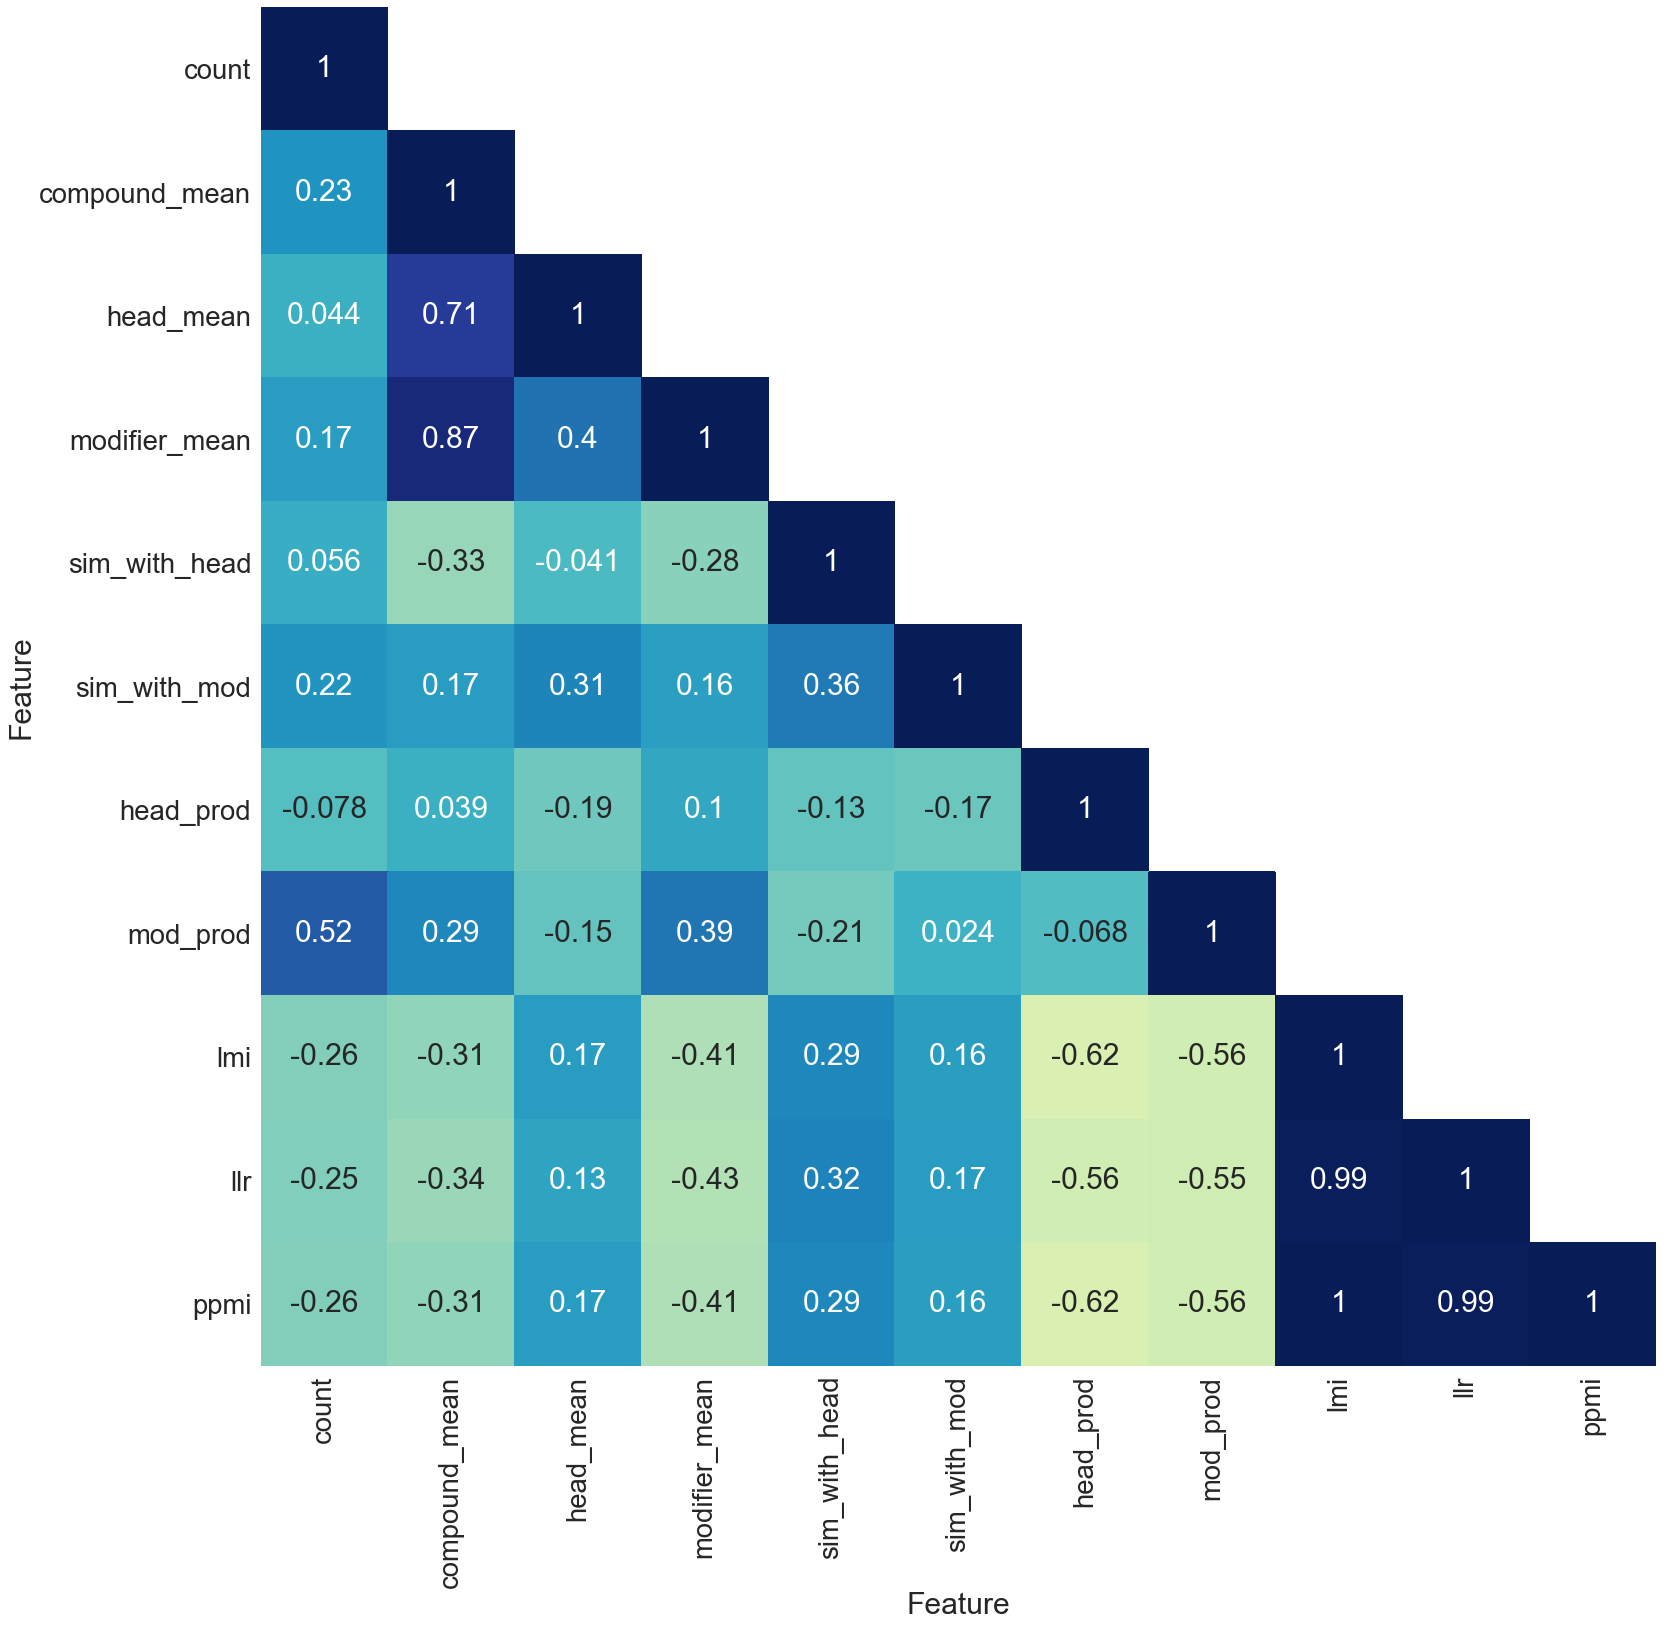

In [93]:
mask = np.zeros_like(corr_count_df.corr())
mask[np.triu_indices_from(mask, k=1)] = True
plt.figure(figsize=(25, 25))
g = sns.heatmap(corr_count_df.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu", mask=mask, cbar=False)
plt.savefig(plotdir+'corr_{}_{}_{}_{}.png'.format(mode, timespan, cutoff, dimension), dpi=300)
plt.savefig(plotdir+'corr_{}_{}_{}_{}.jpg'.format(mode, timespan, cutoff, dimension), dpi=300)
plt.savefig(plotdir+'corr_{}_{}_{}_{}.tiff'.format(mode, timespan, cutoff, dimension), dpi=300)
if use_pgf:
    plt.savefig(plotdir+'corr_{}_{}_{}_{}.pgf'.format(mode, timespan, cutoff, dimension))

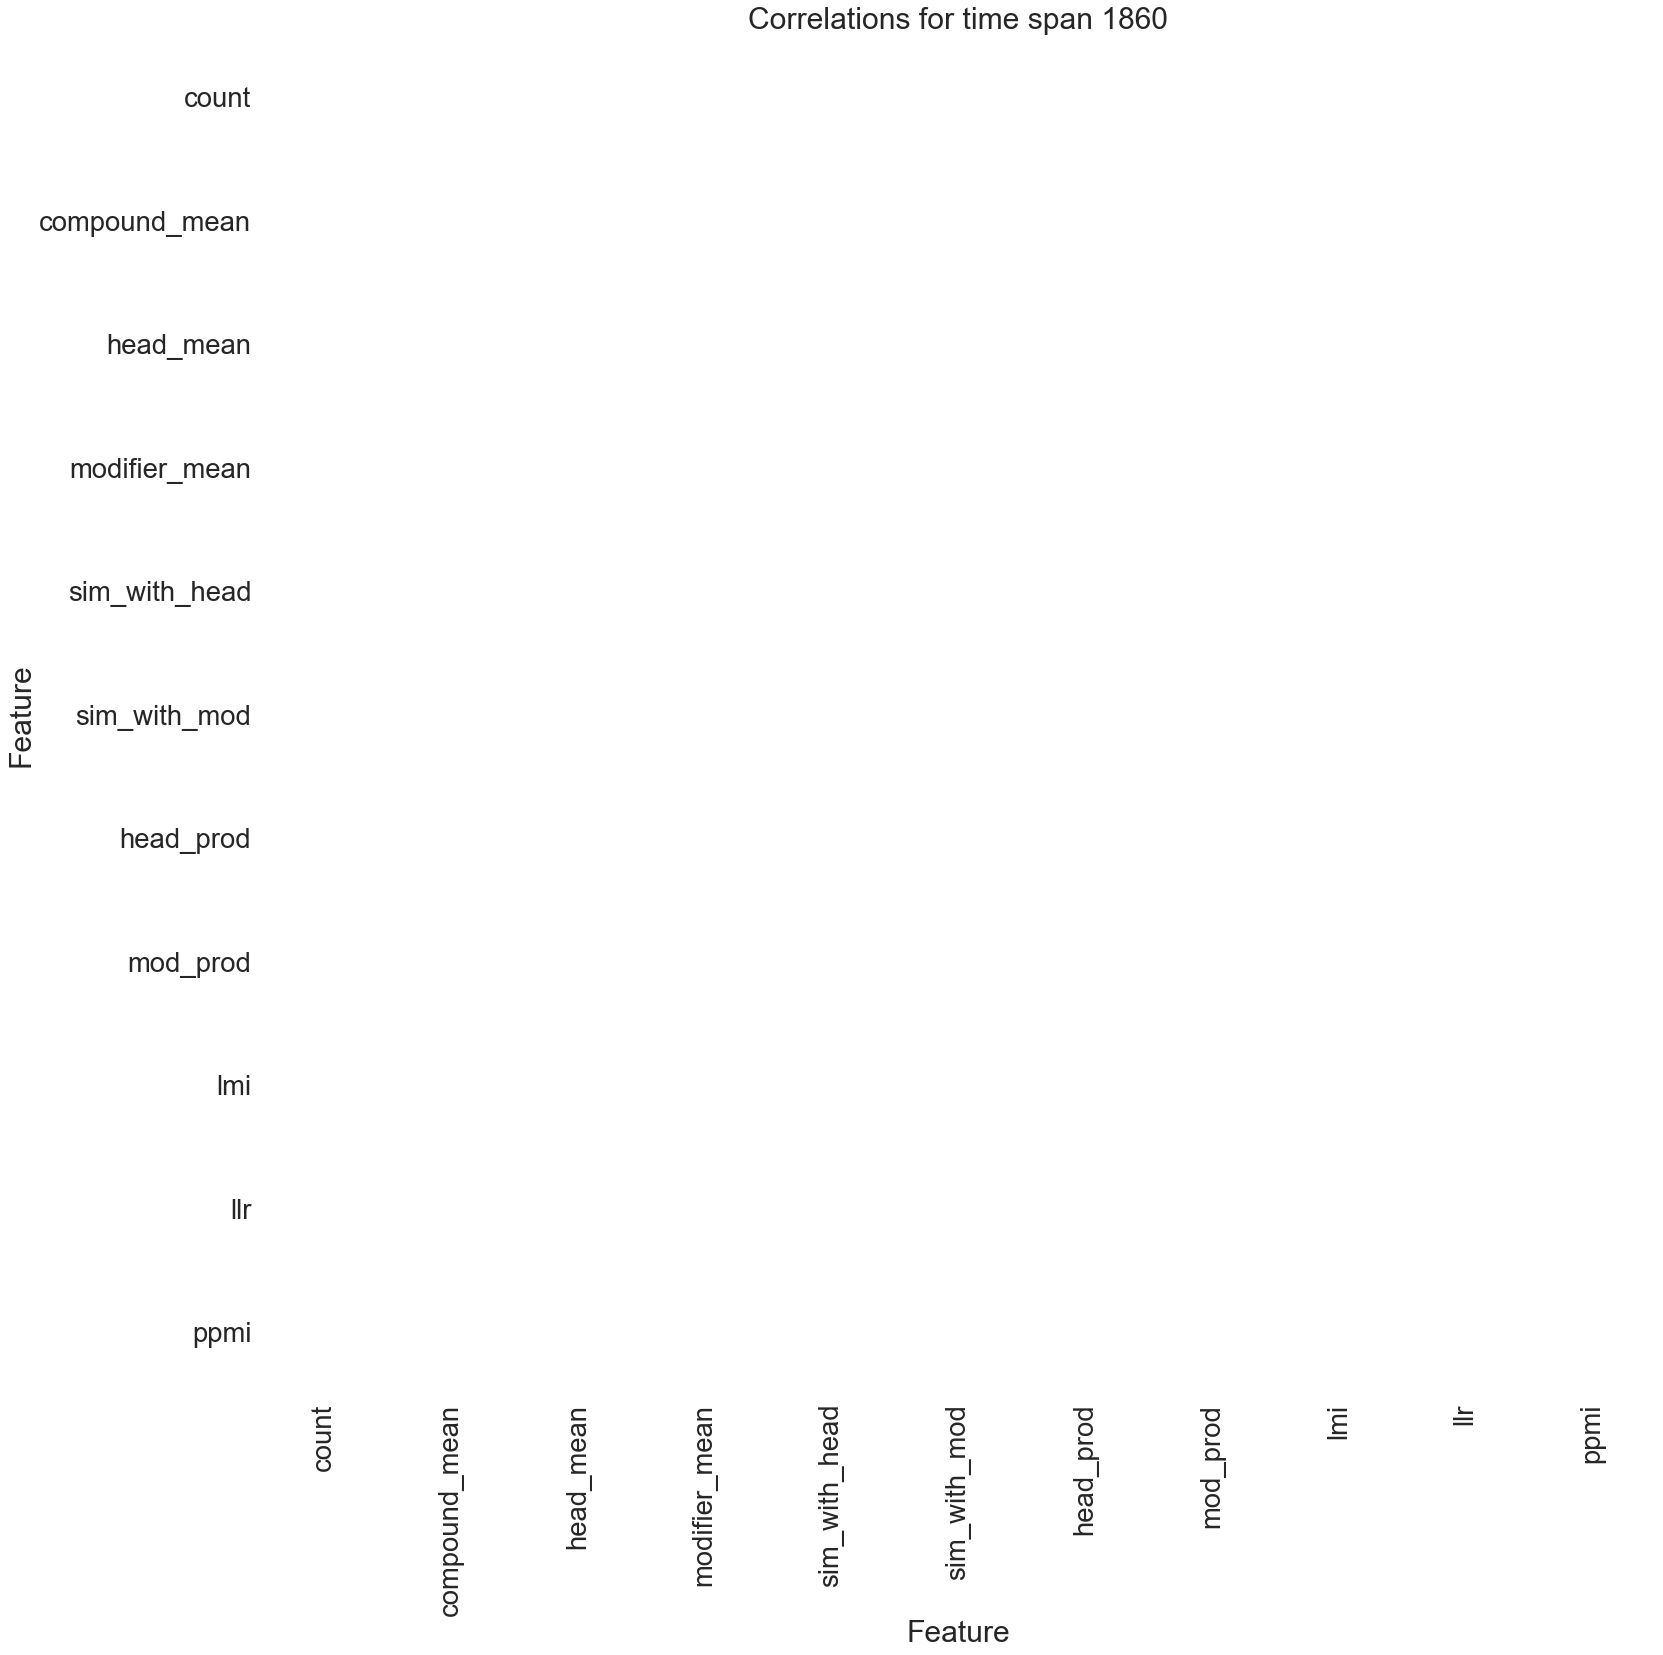

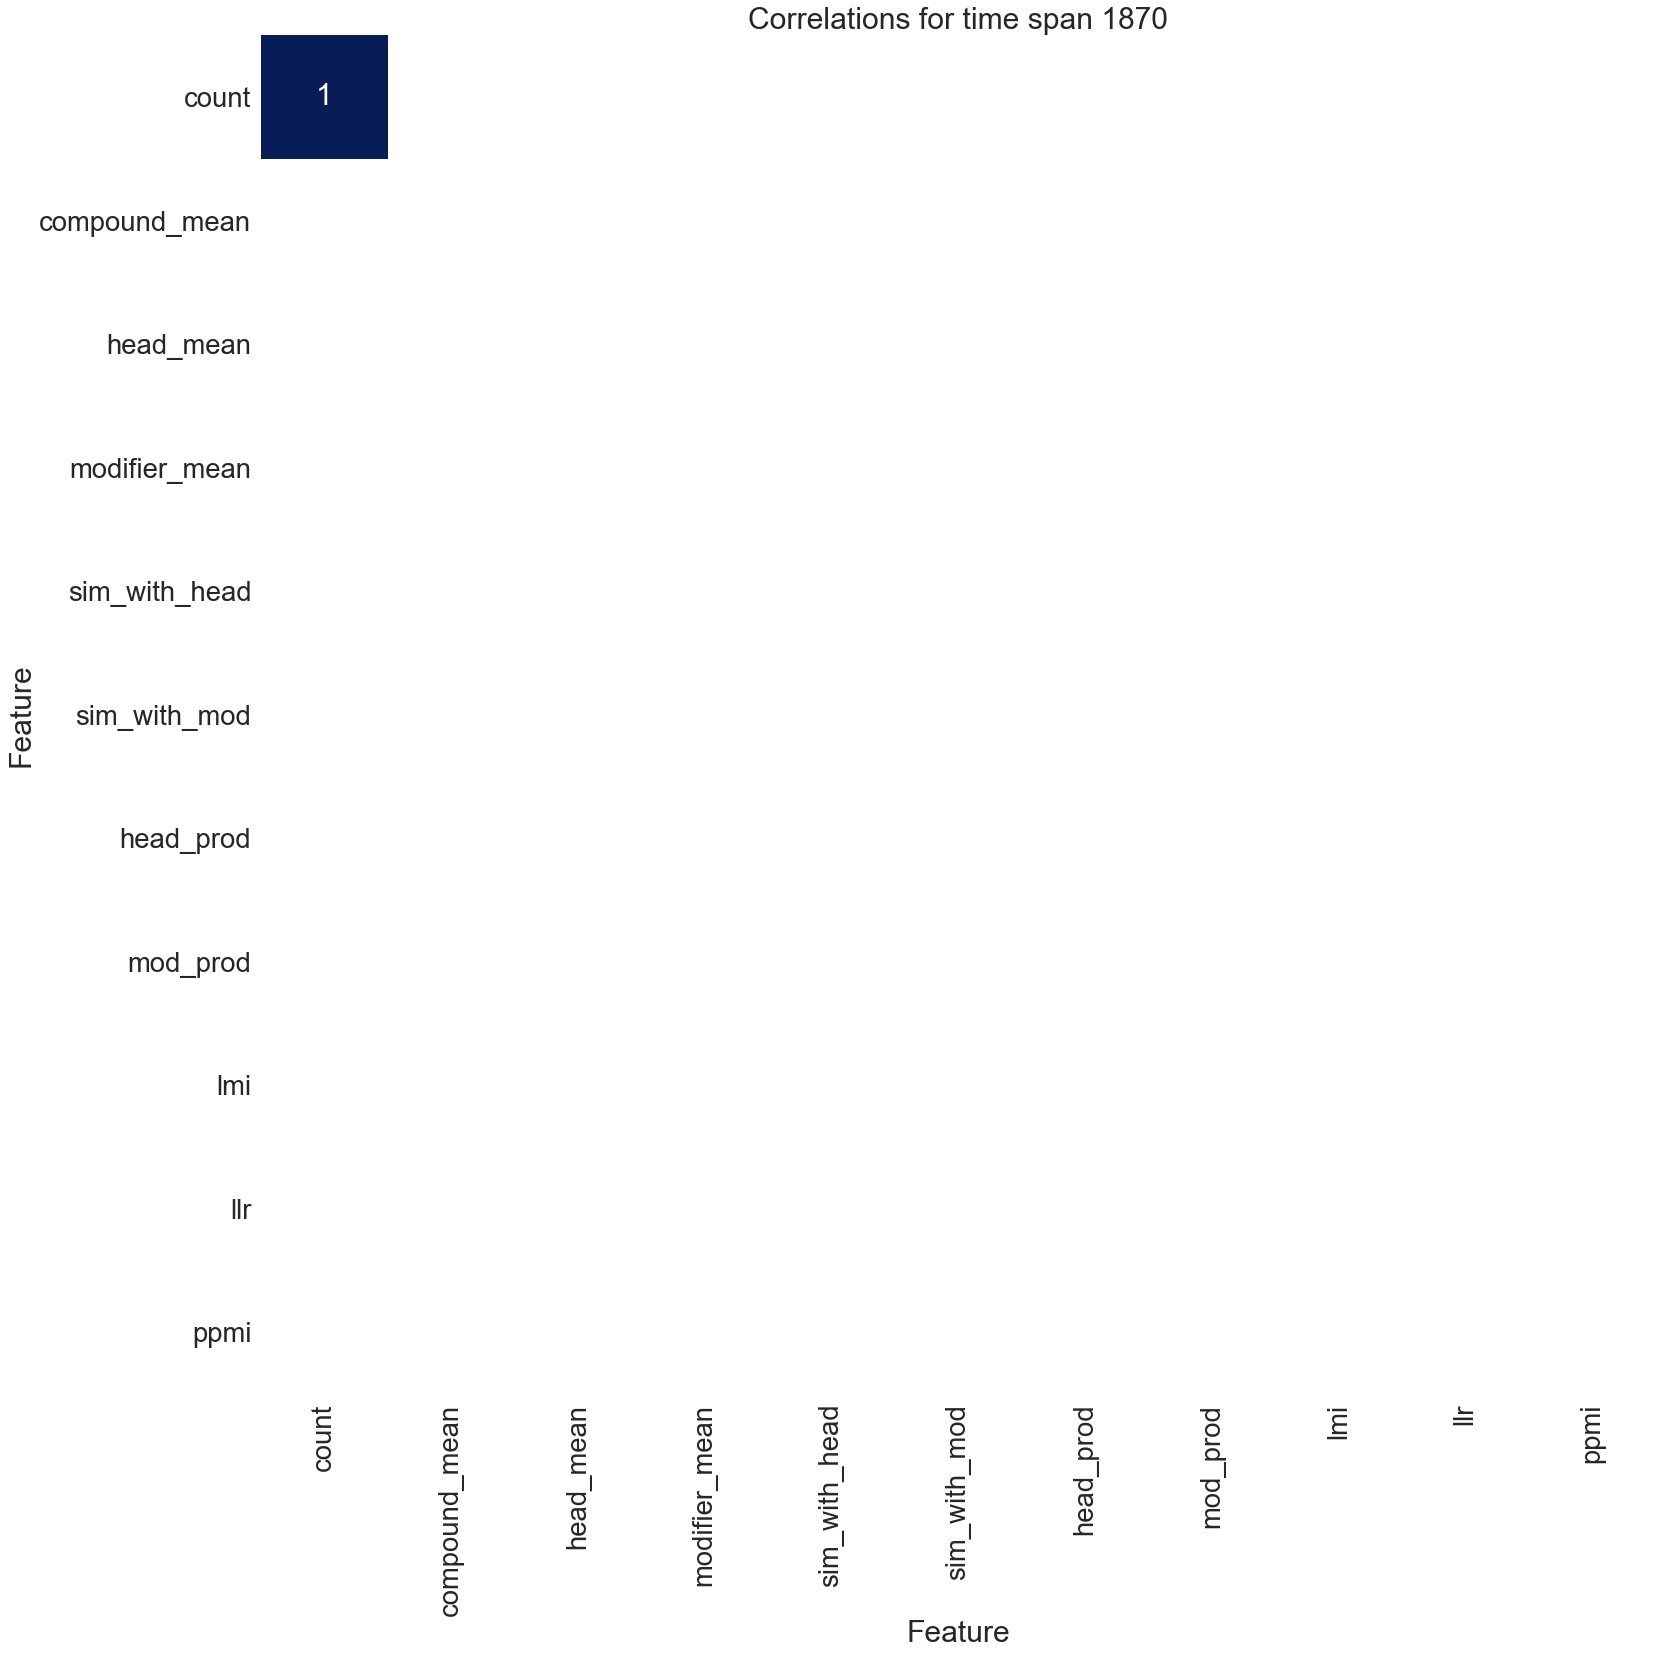

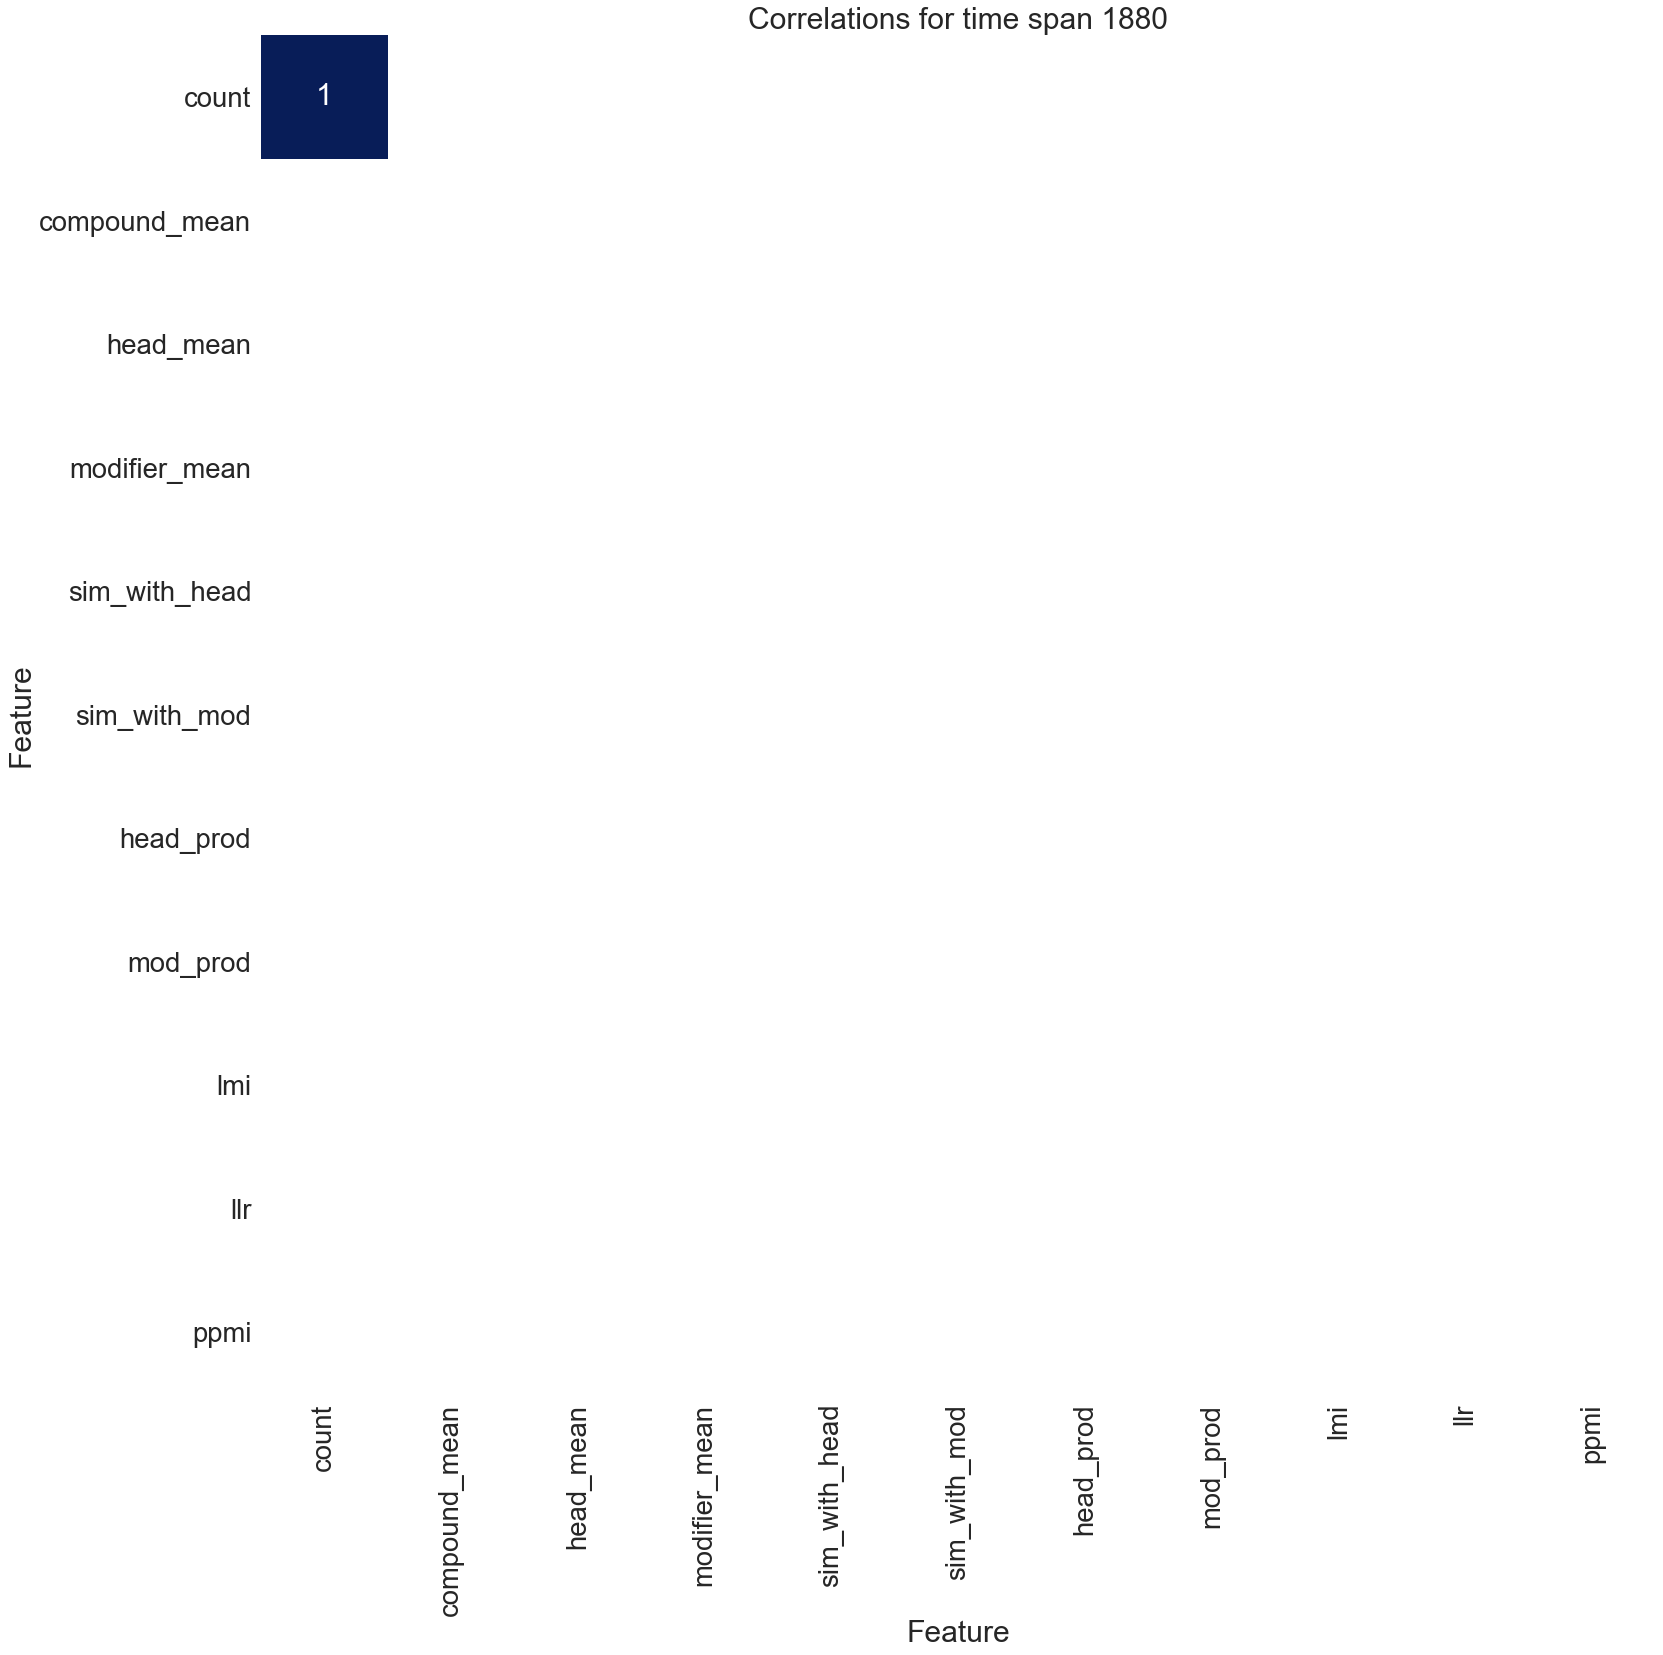

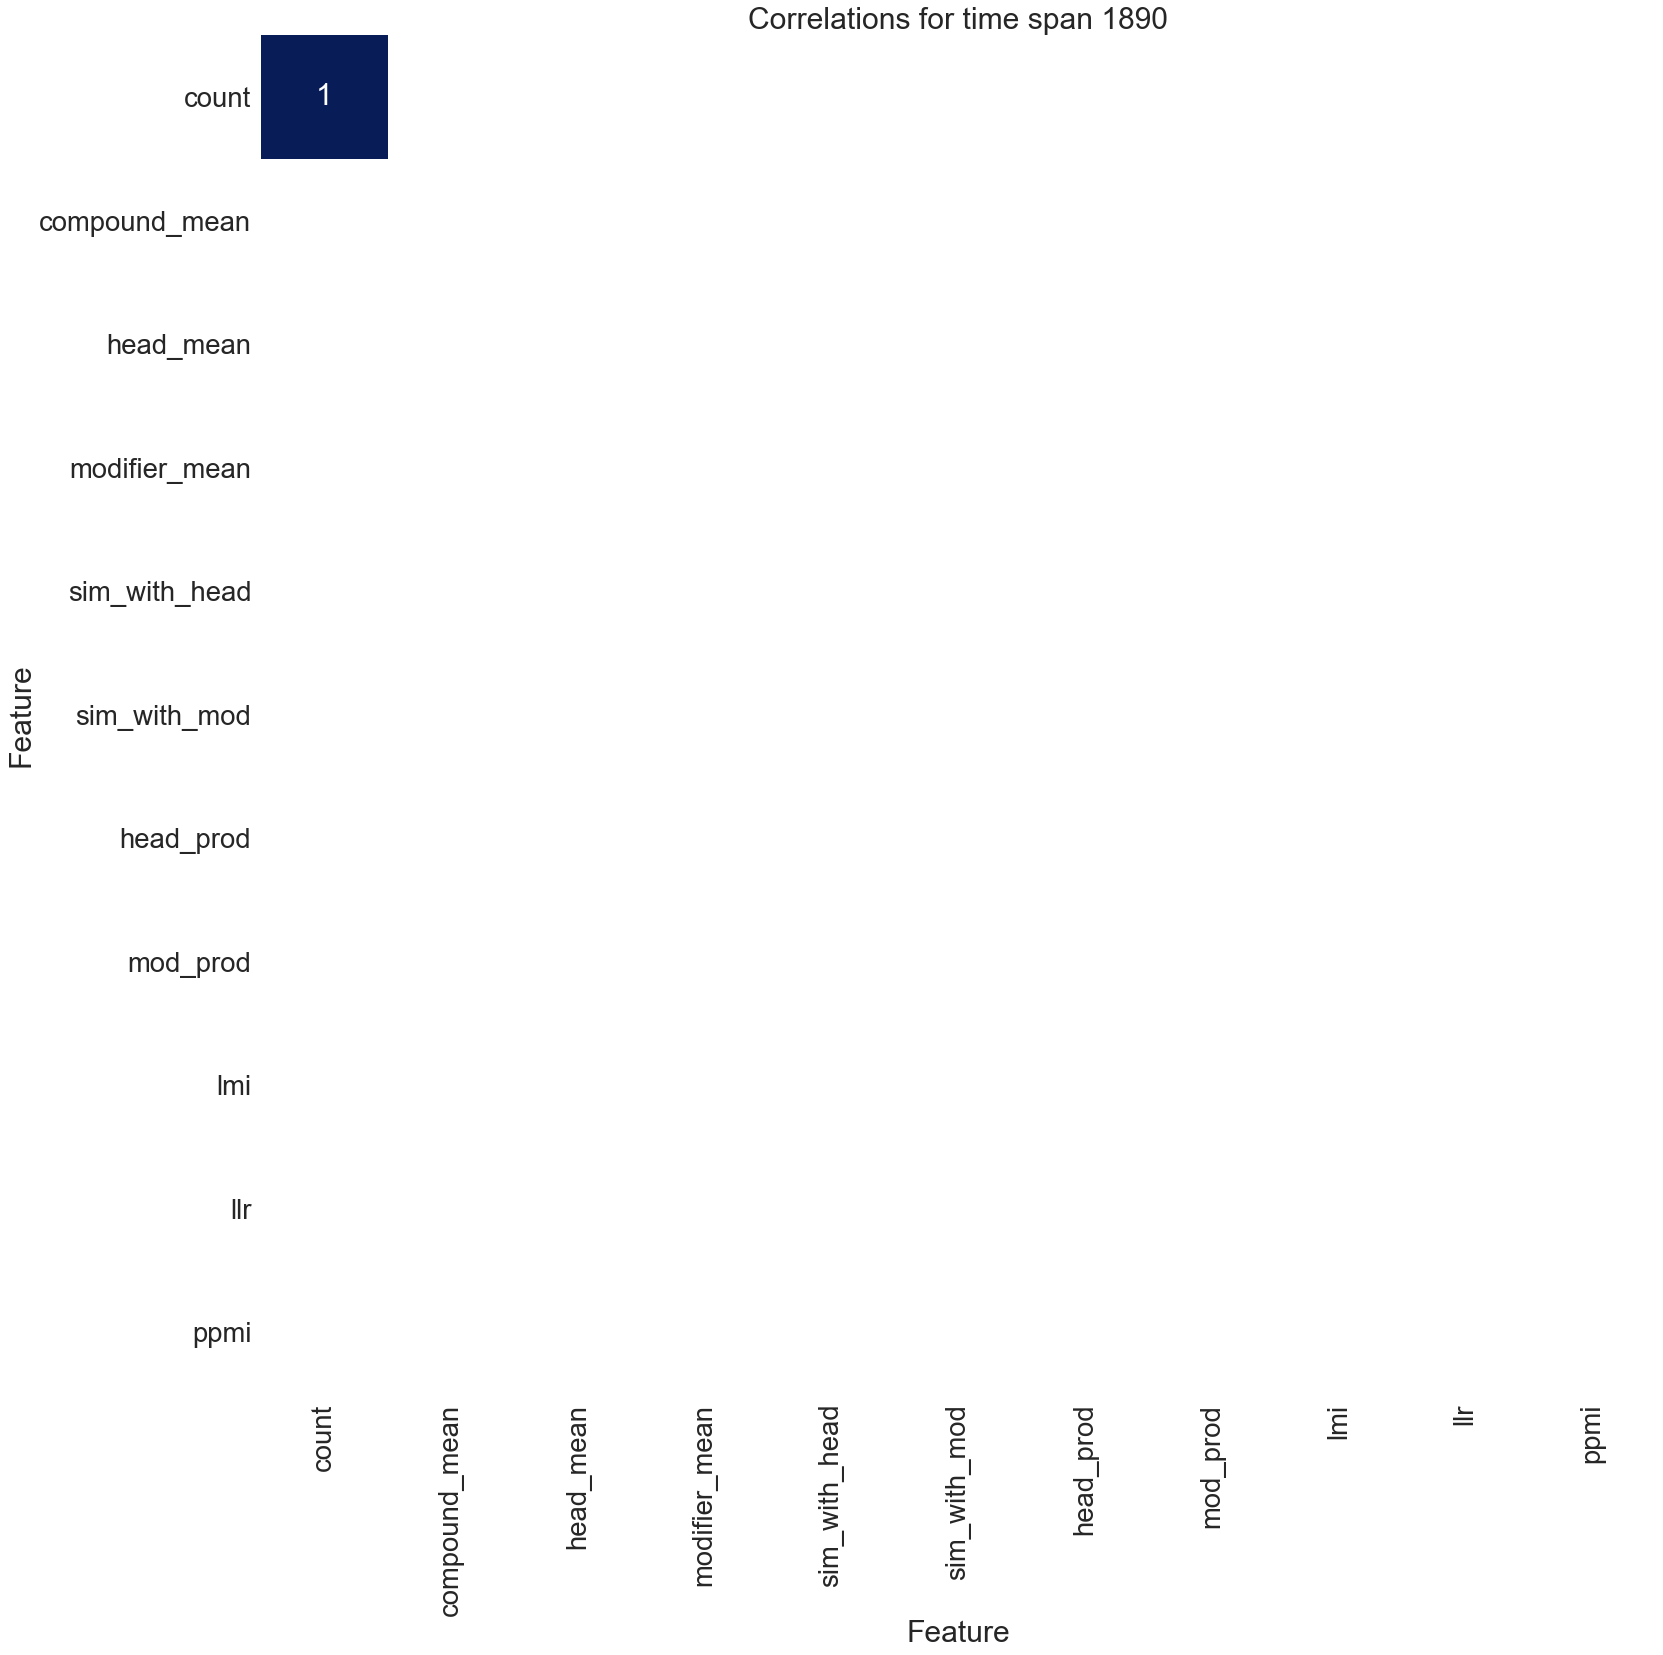

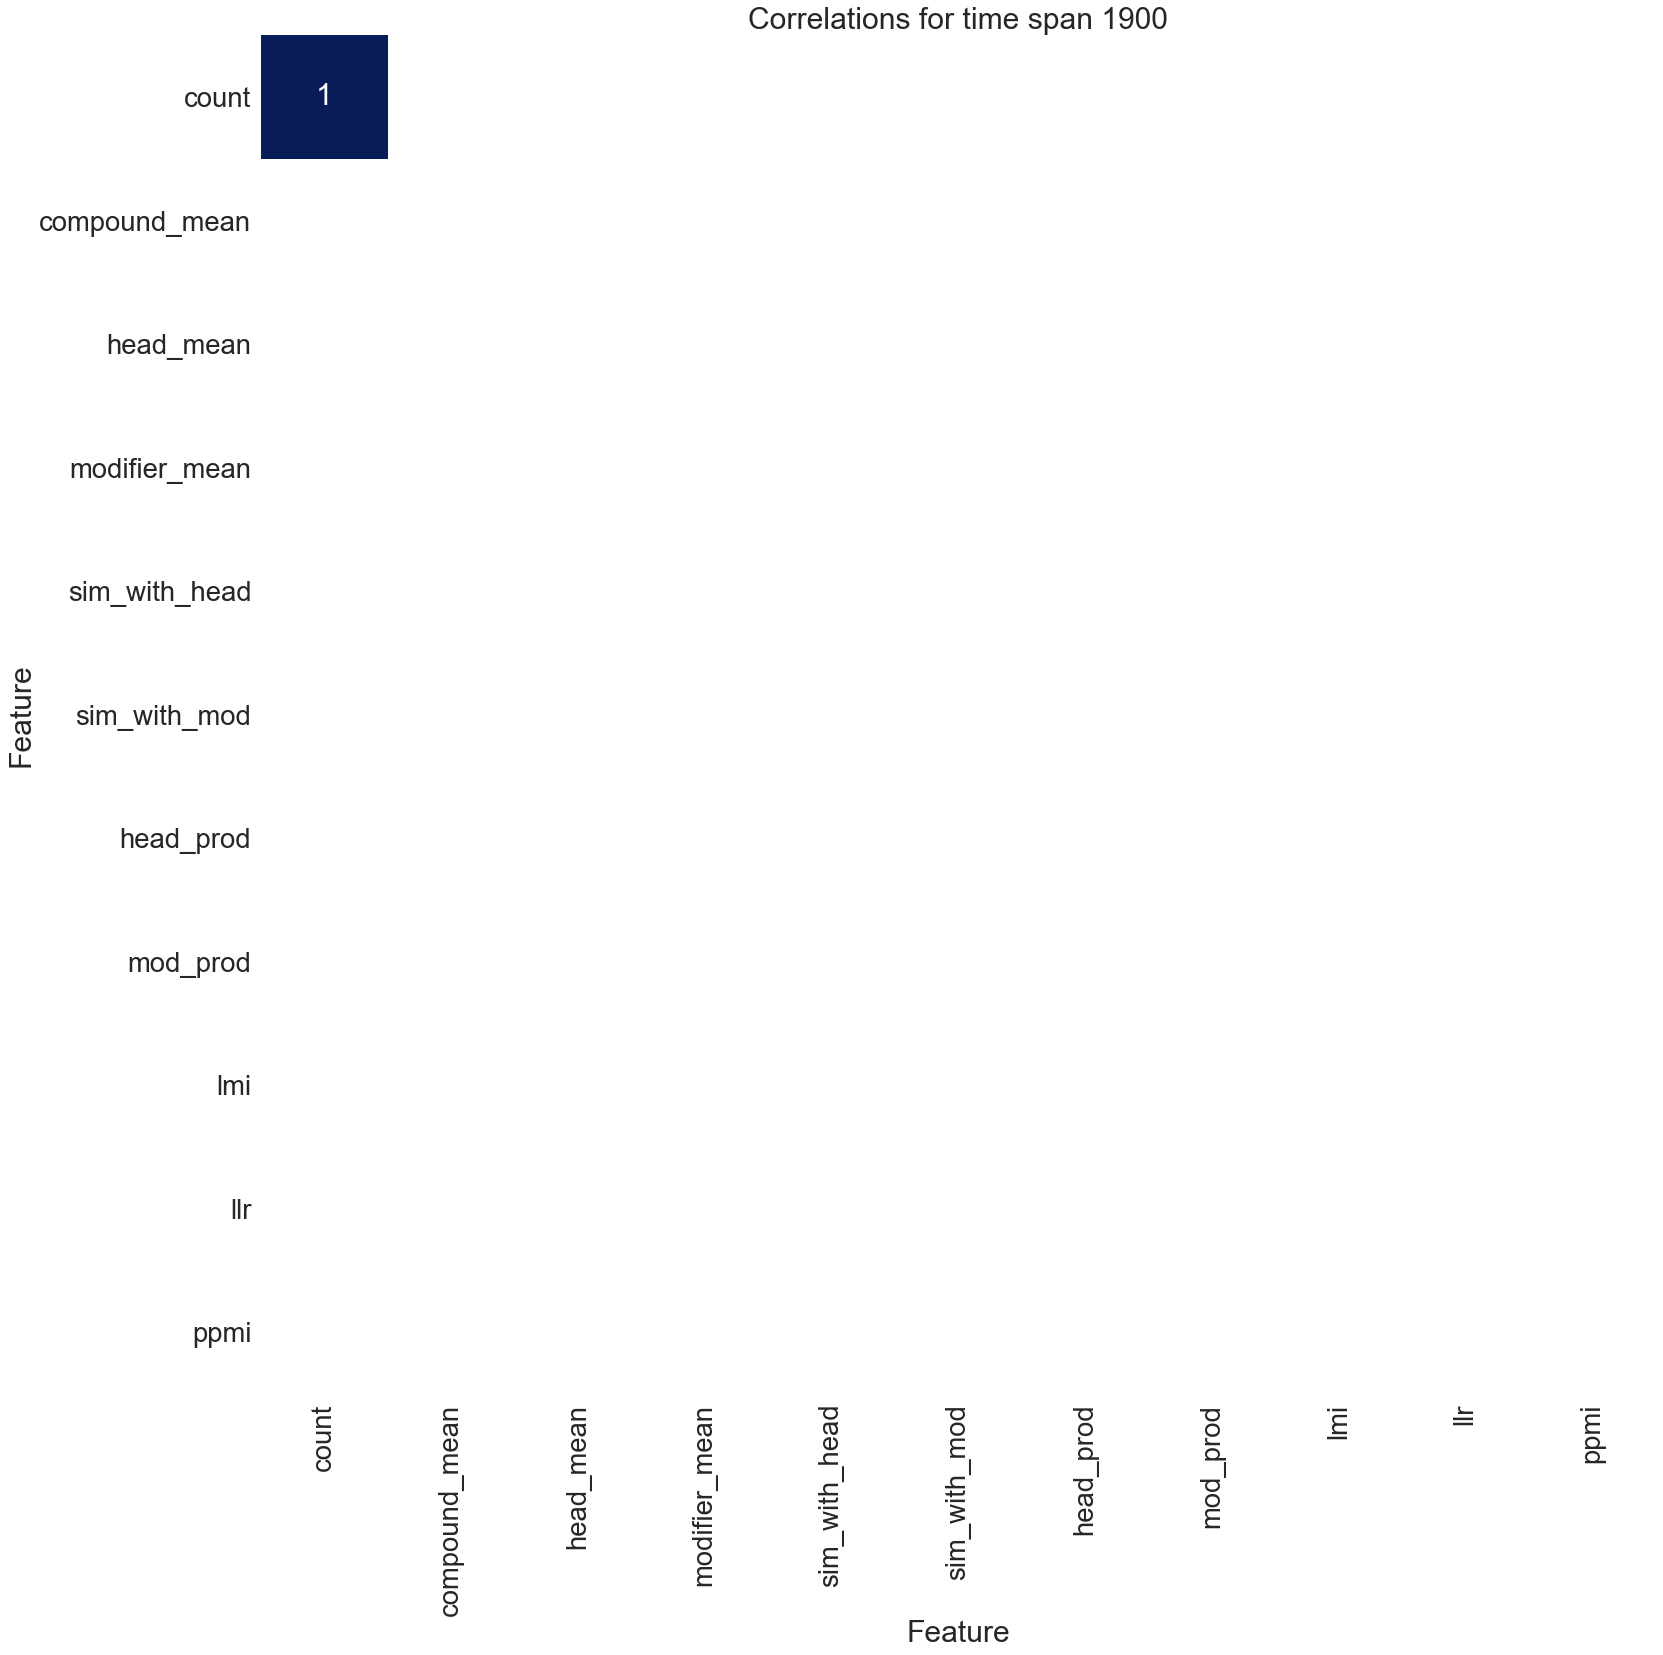

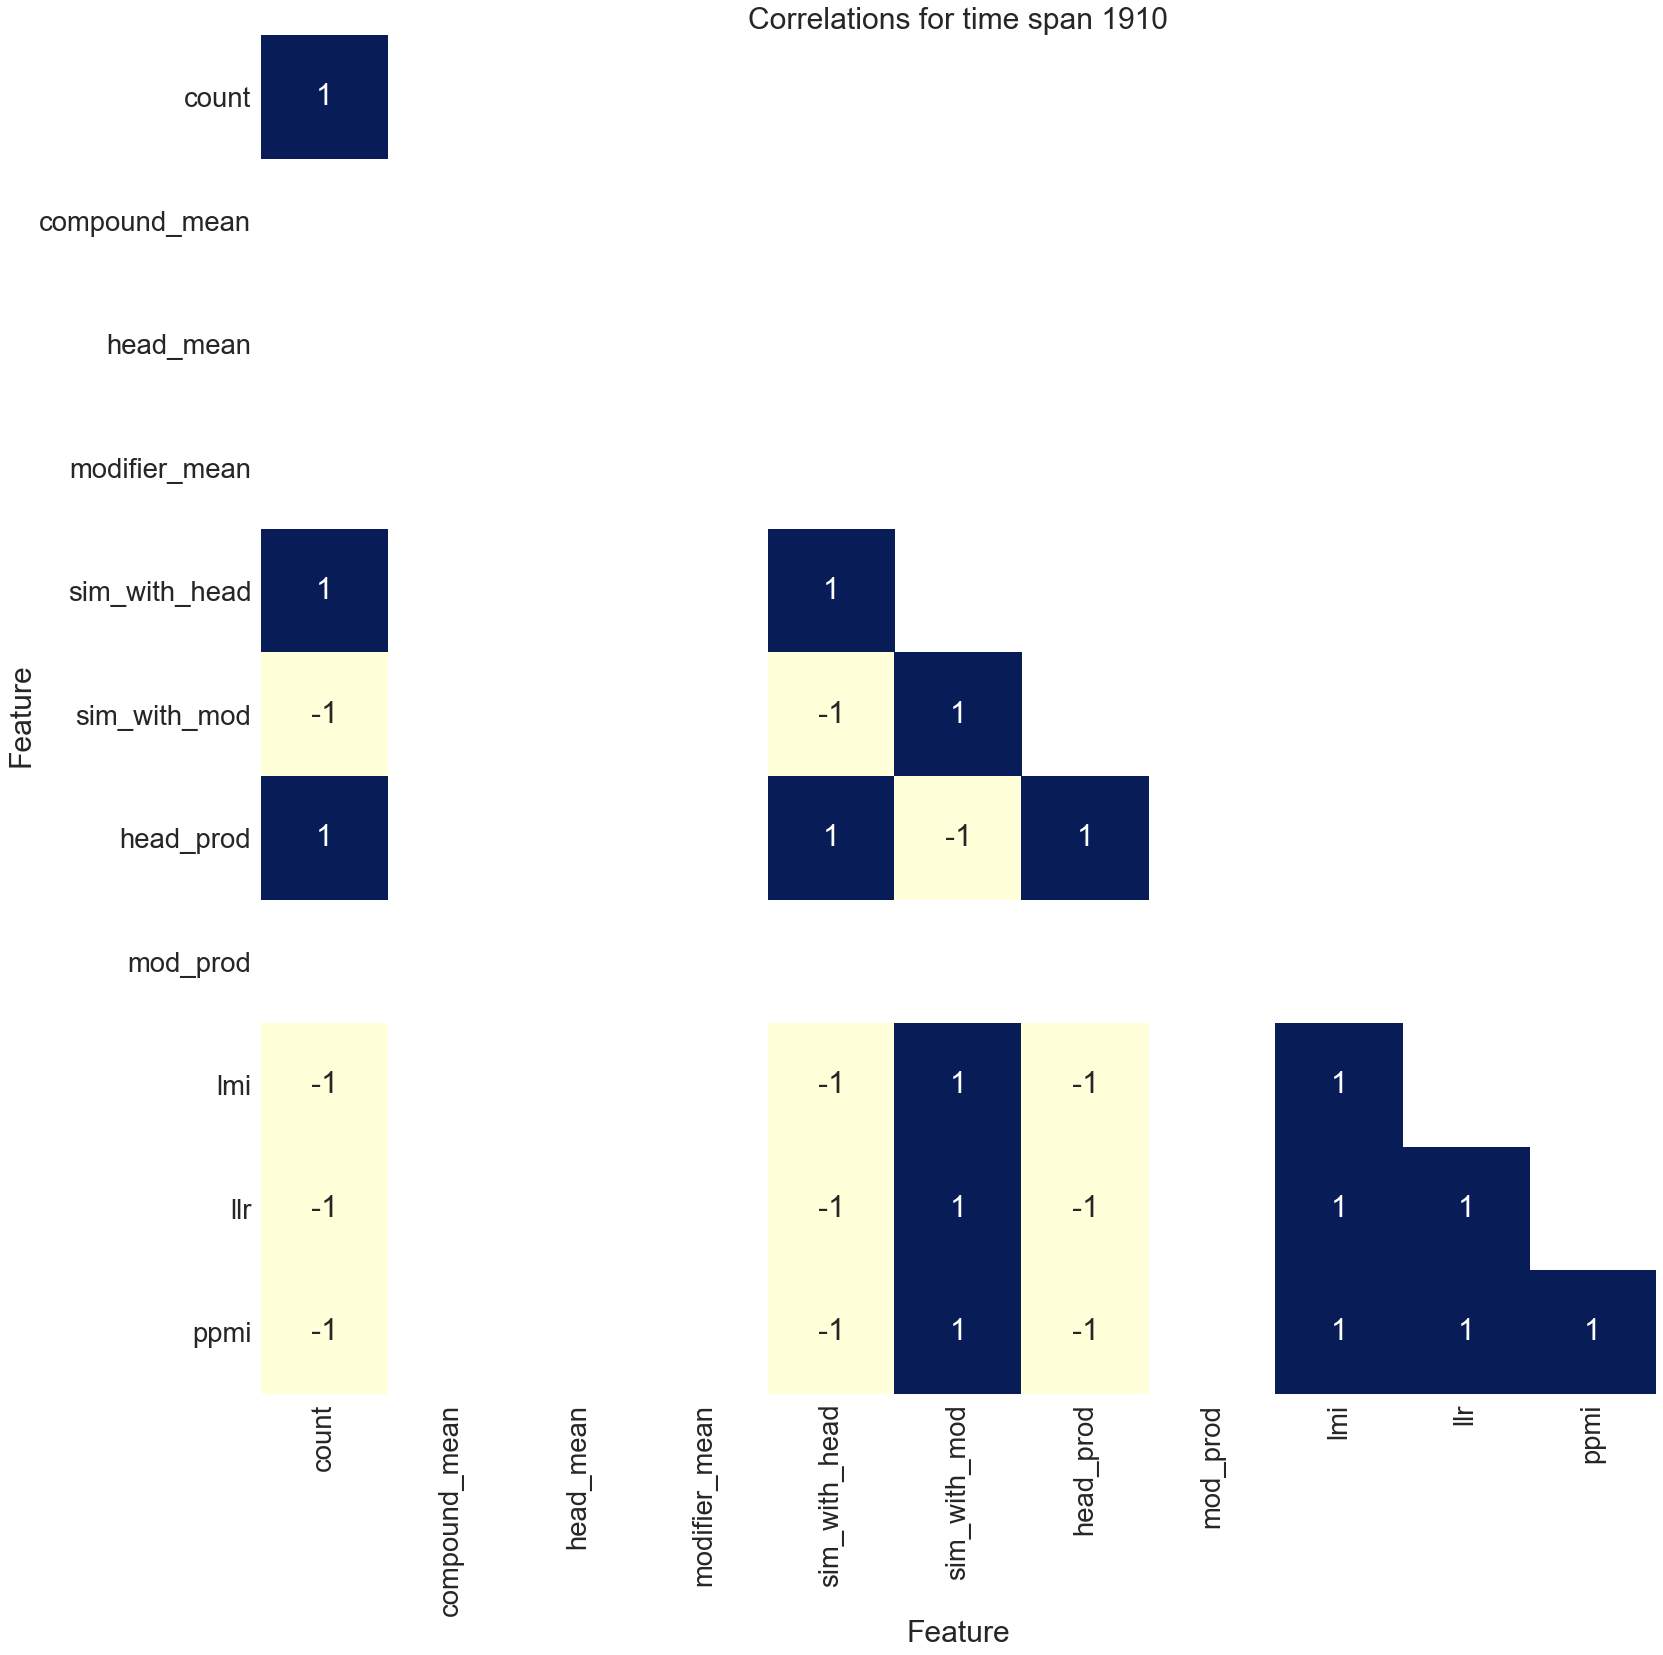

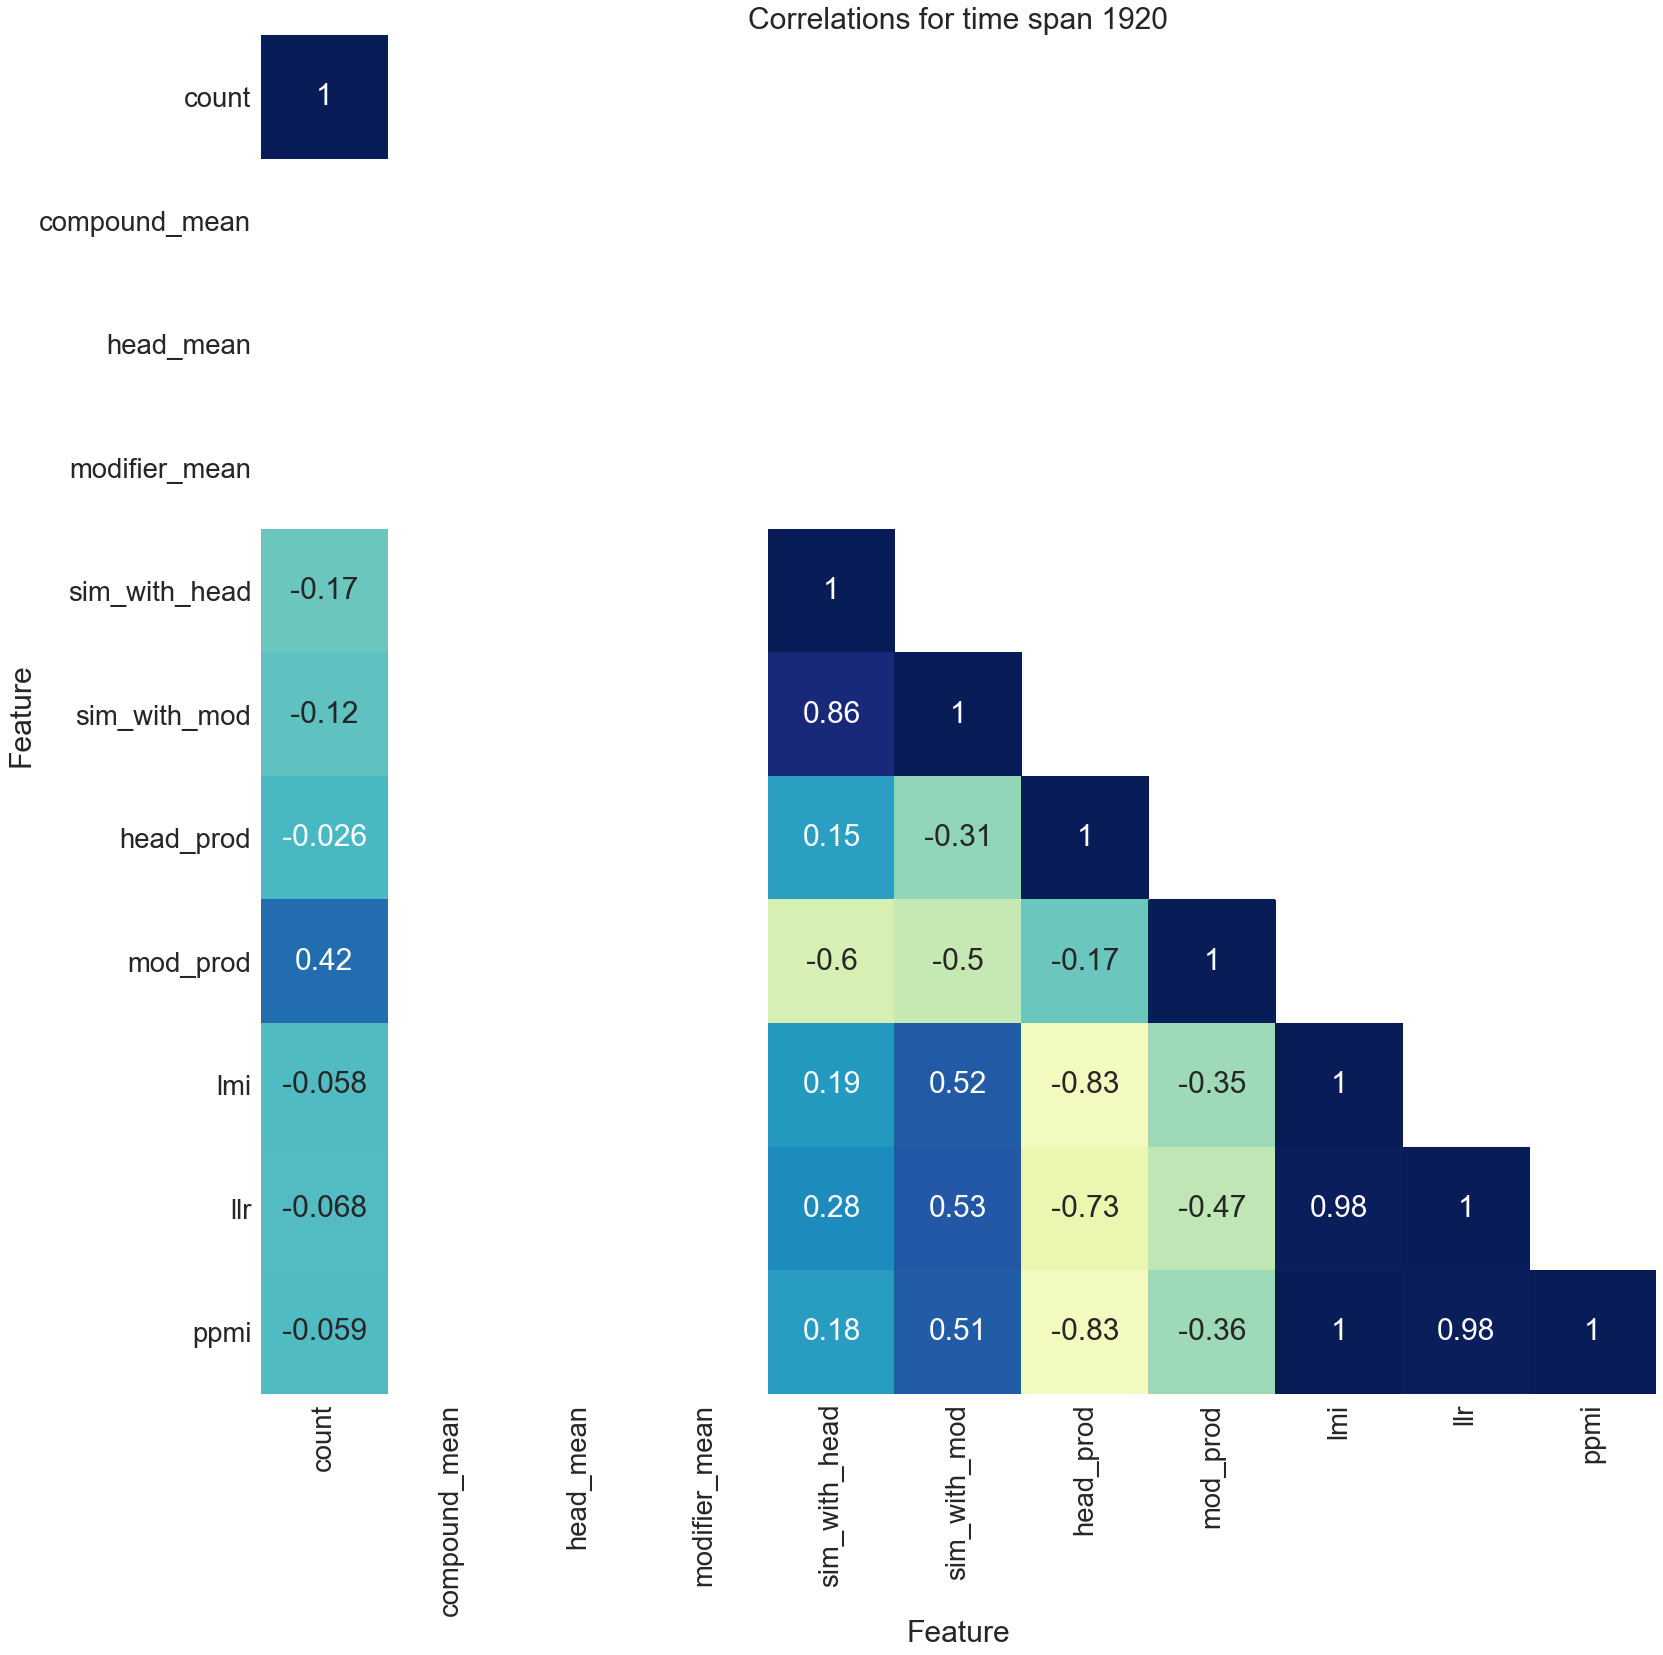

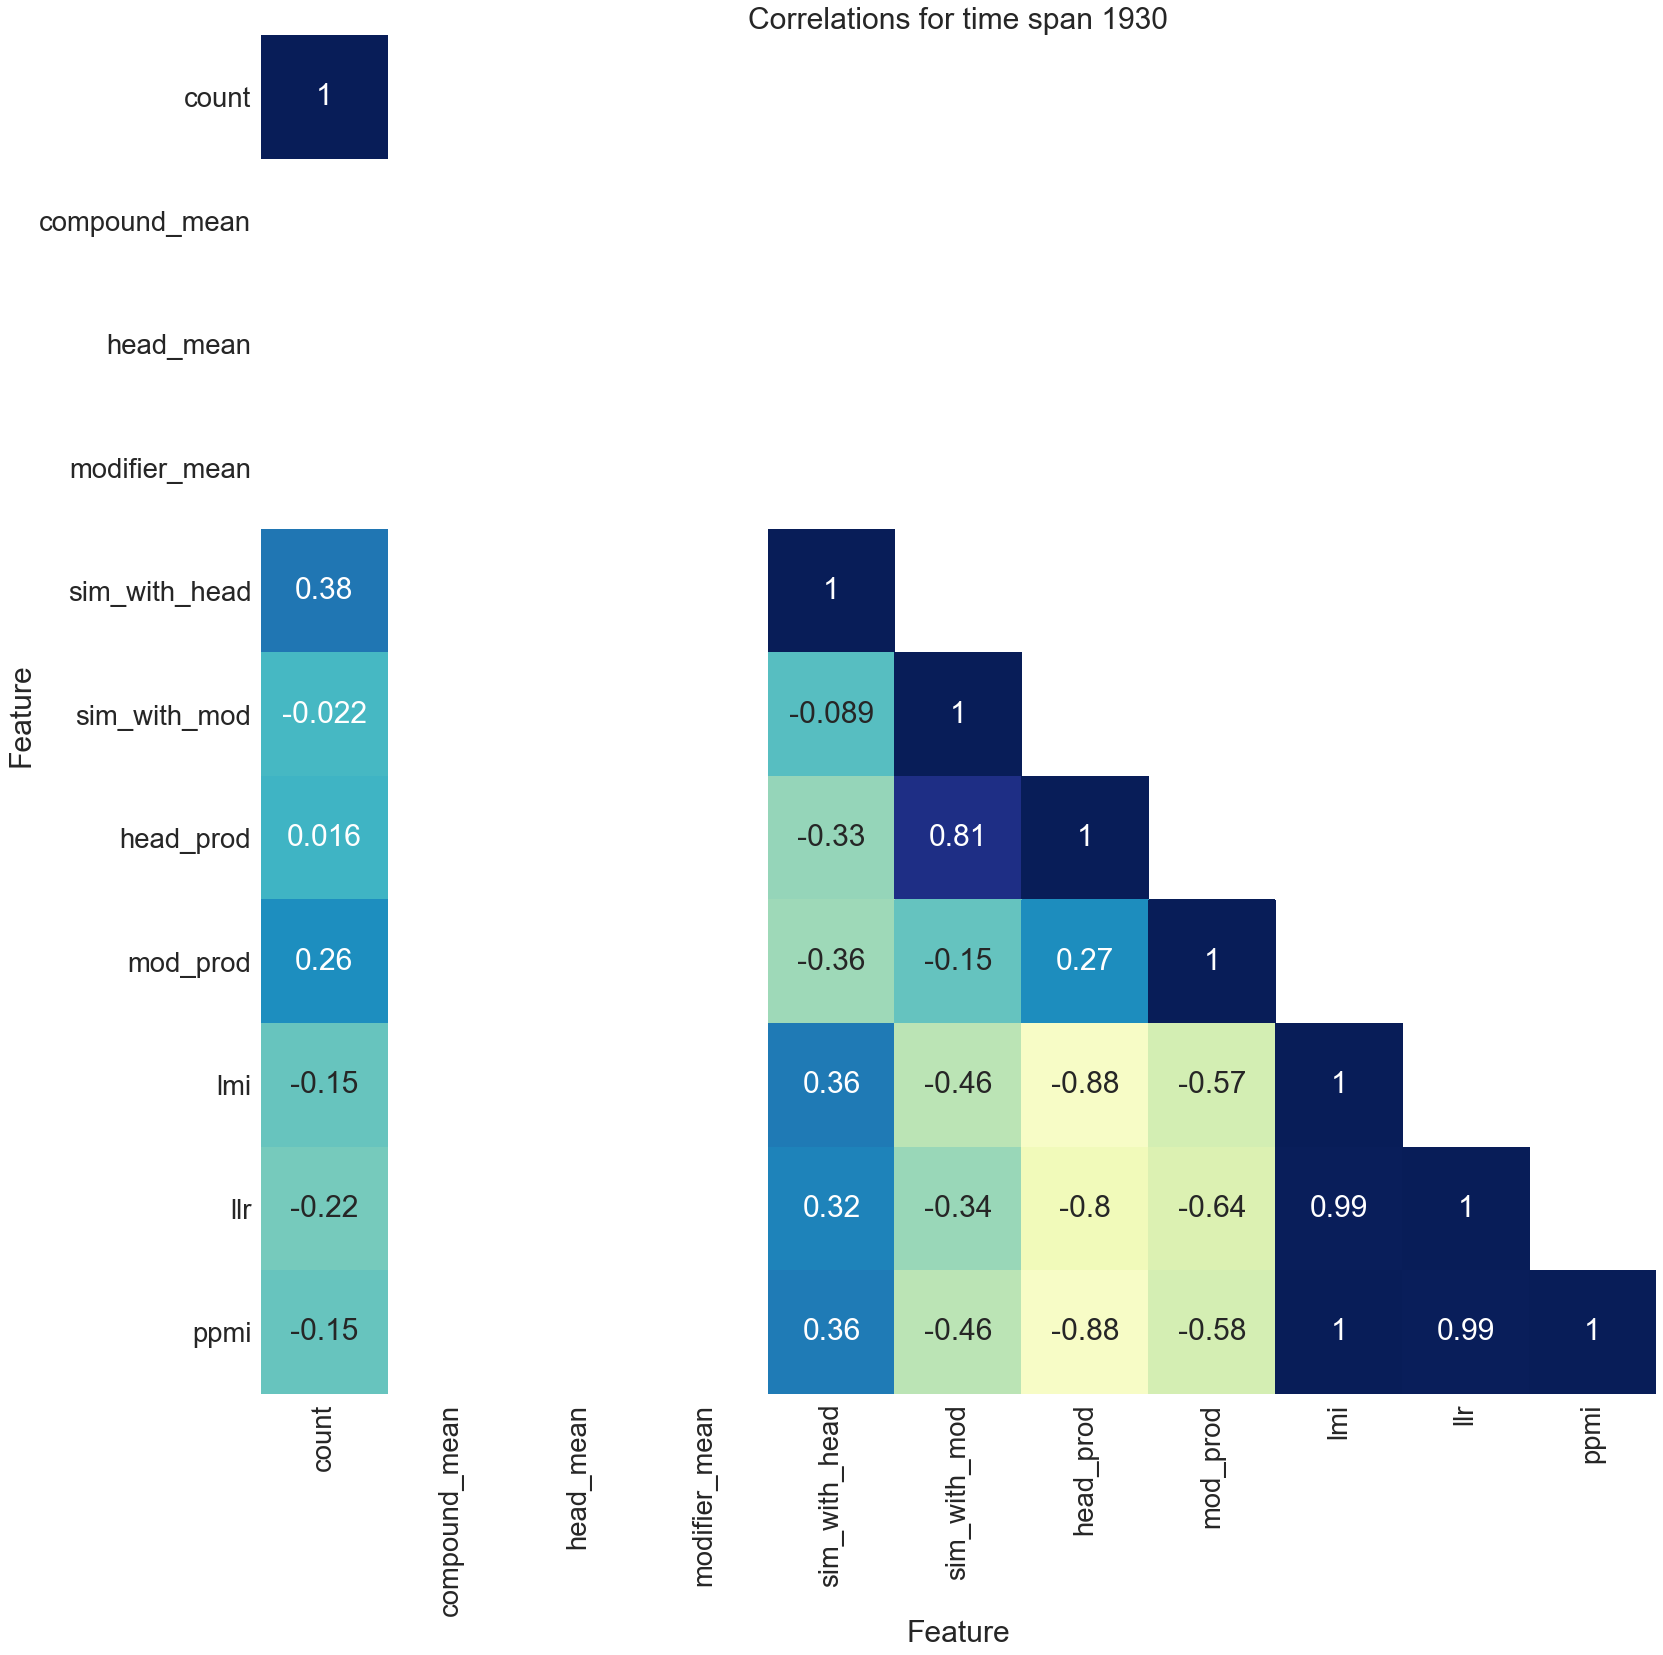

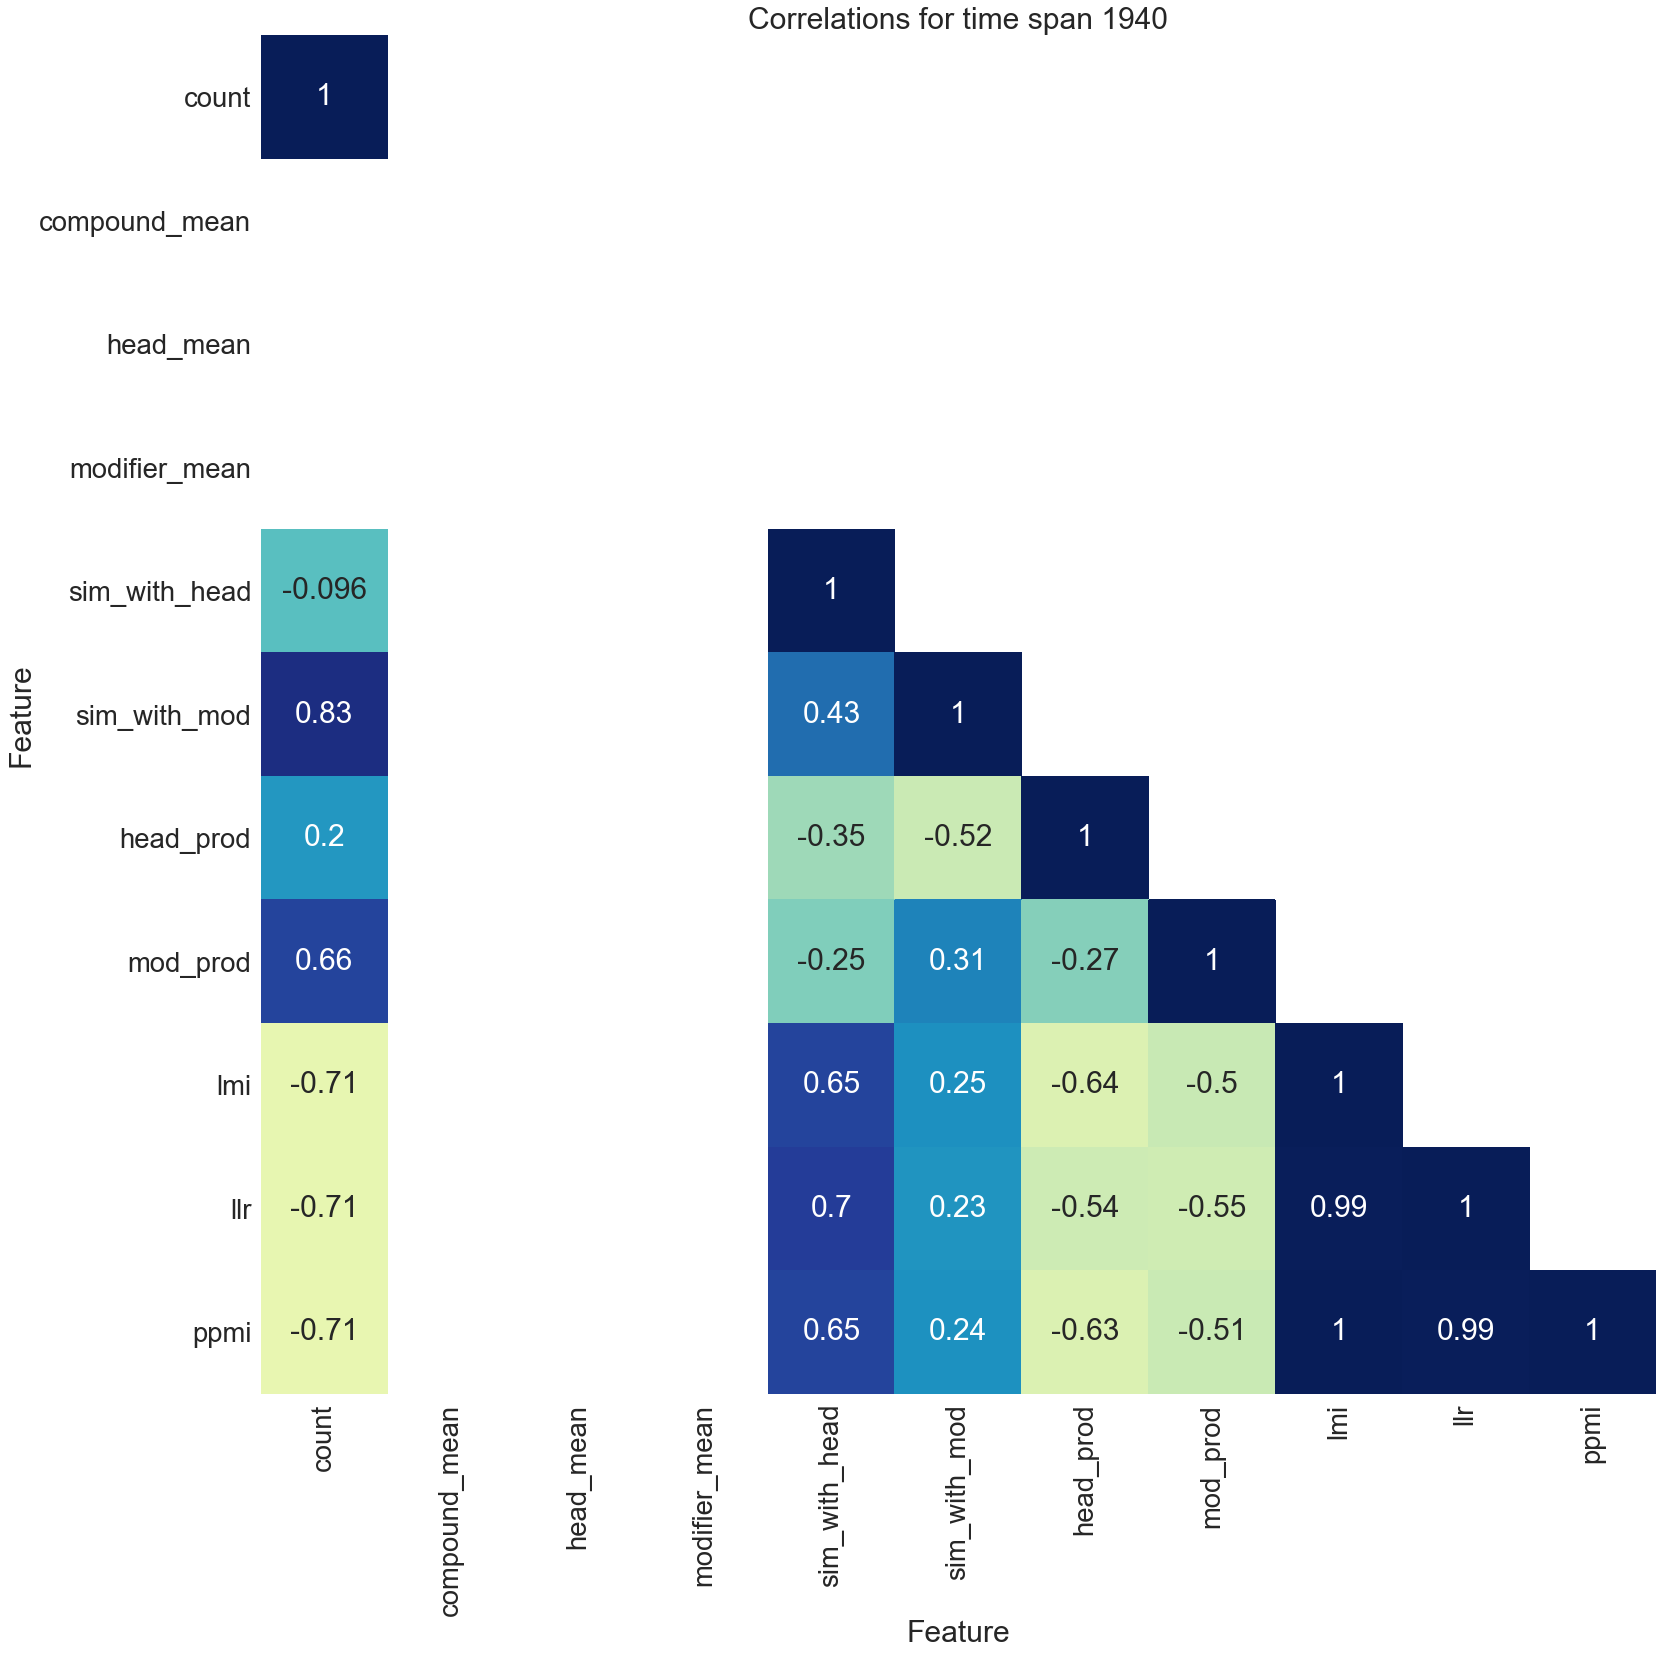

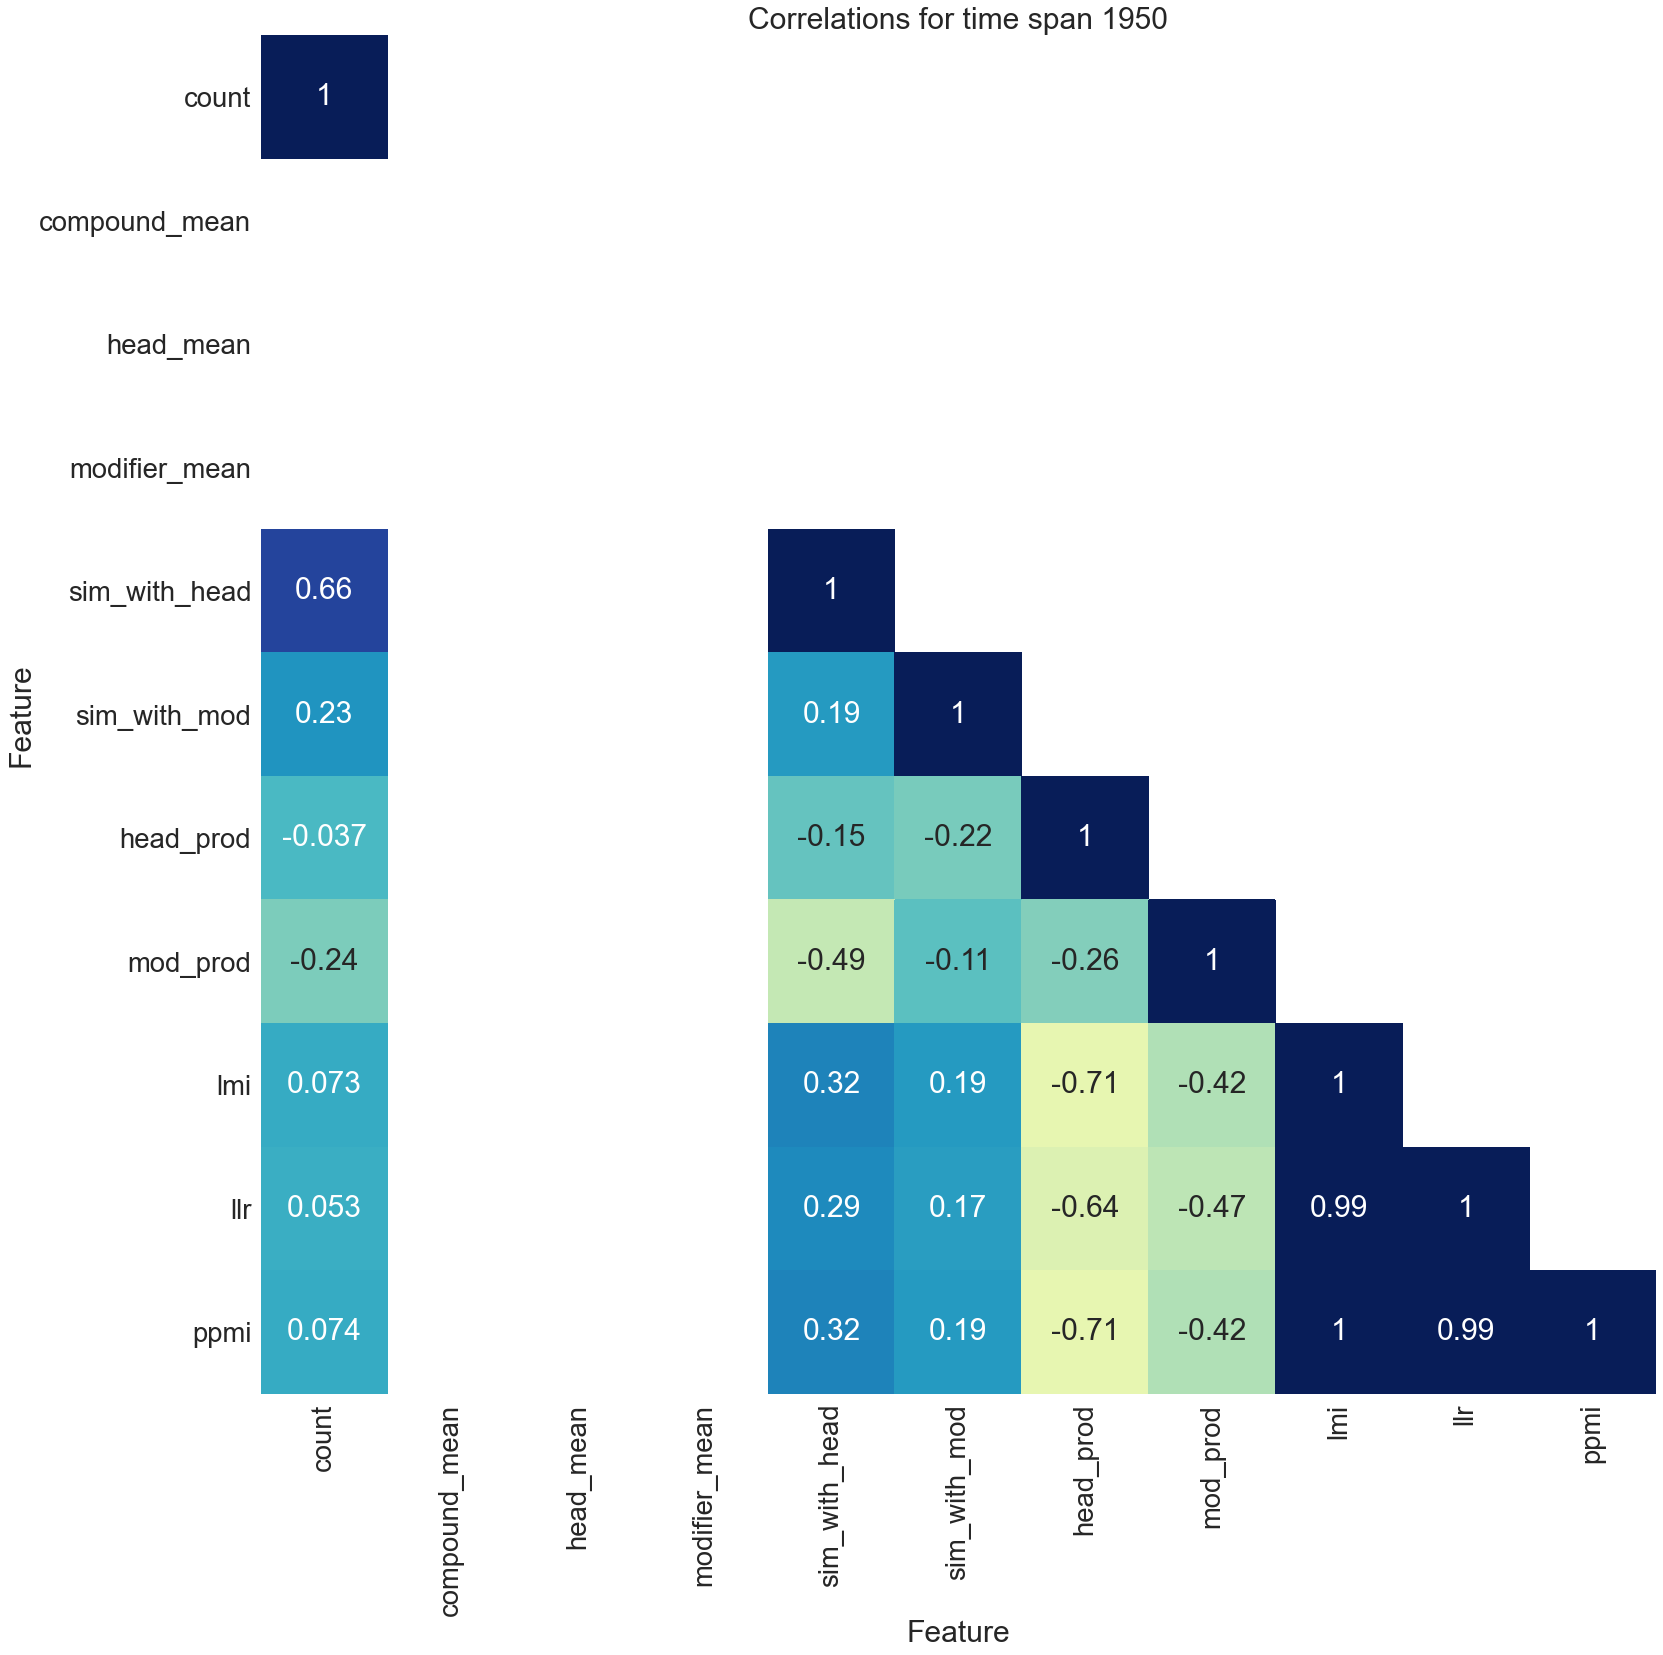

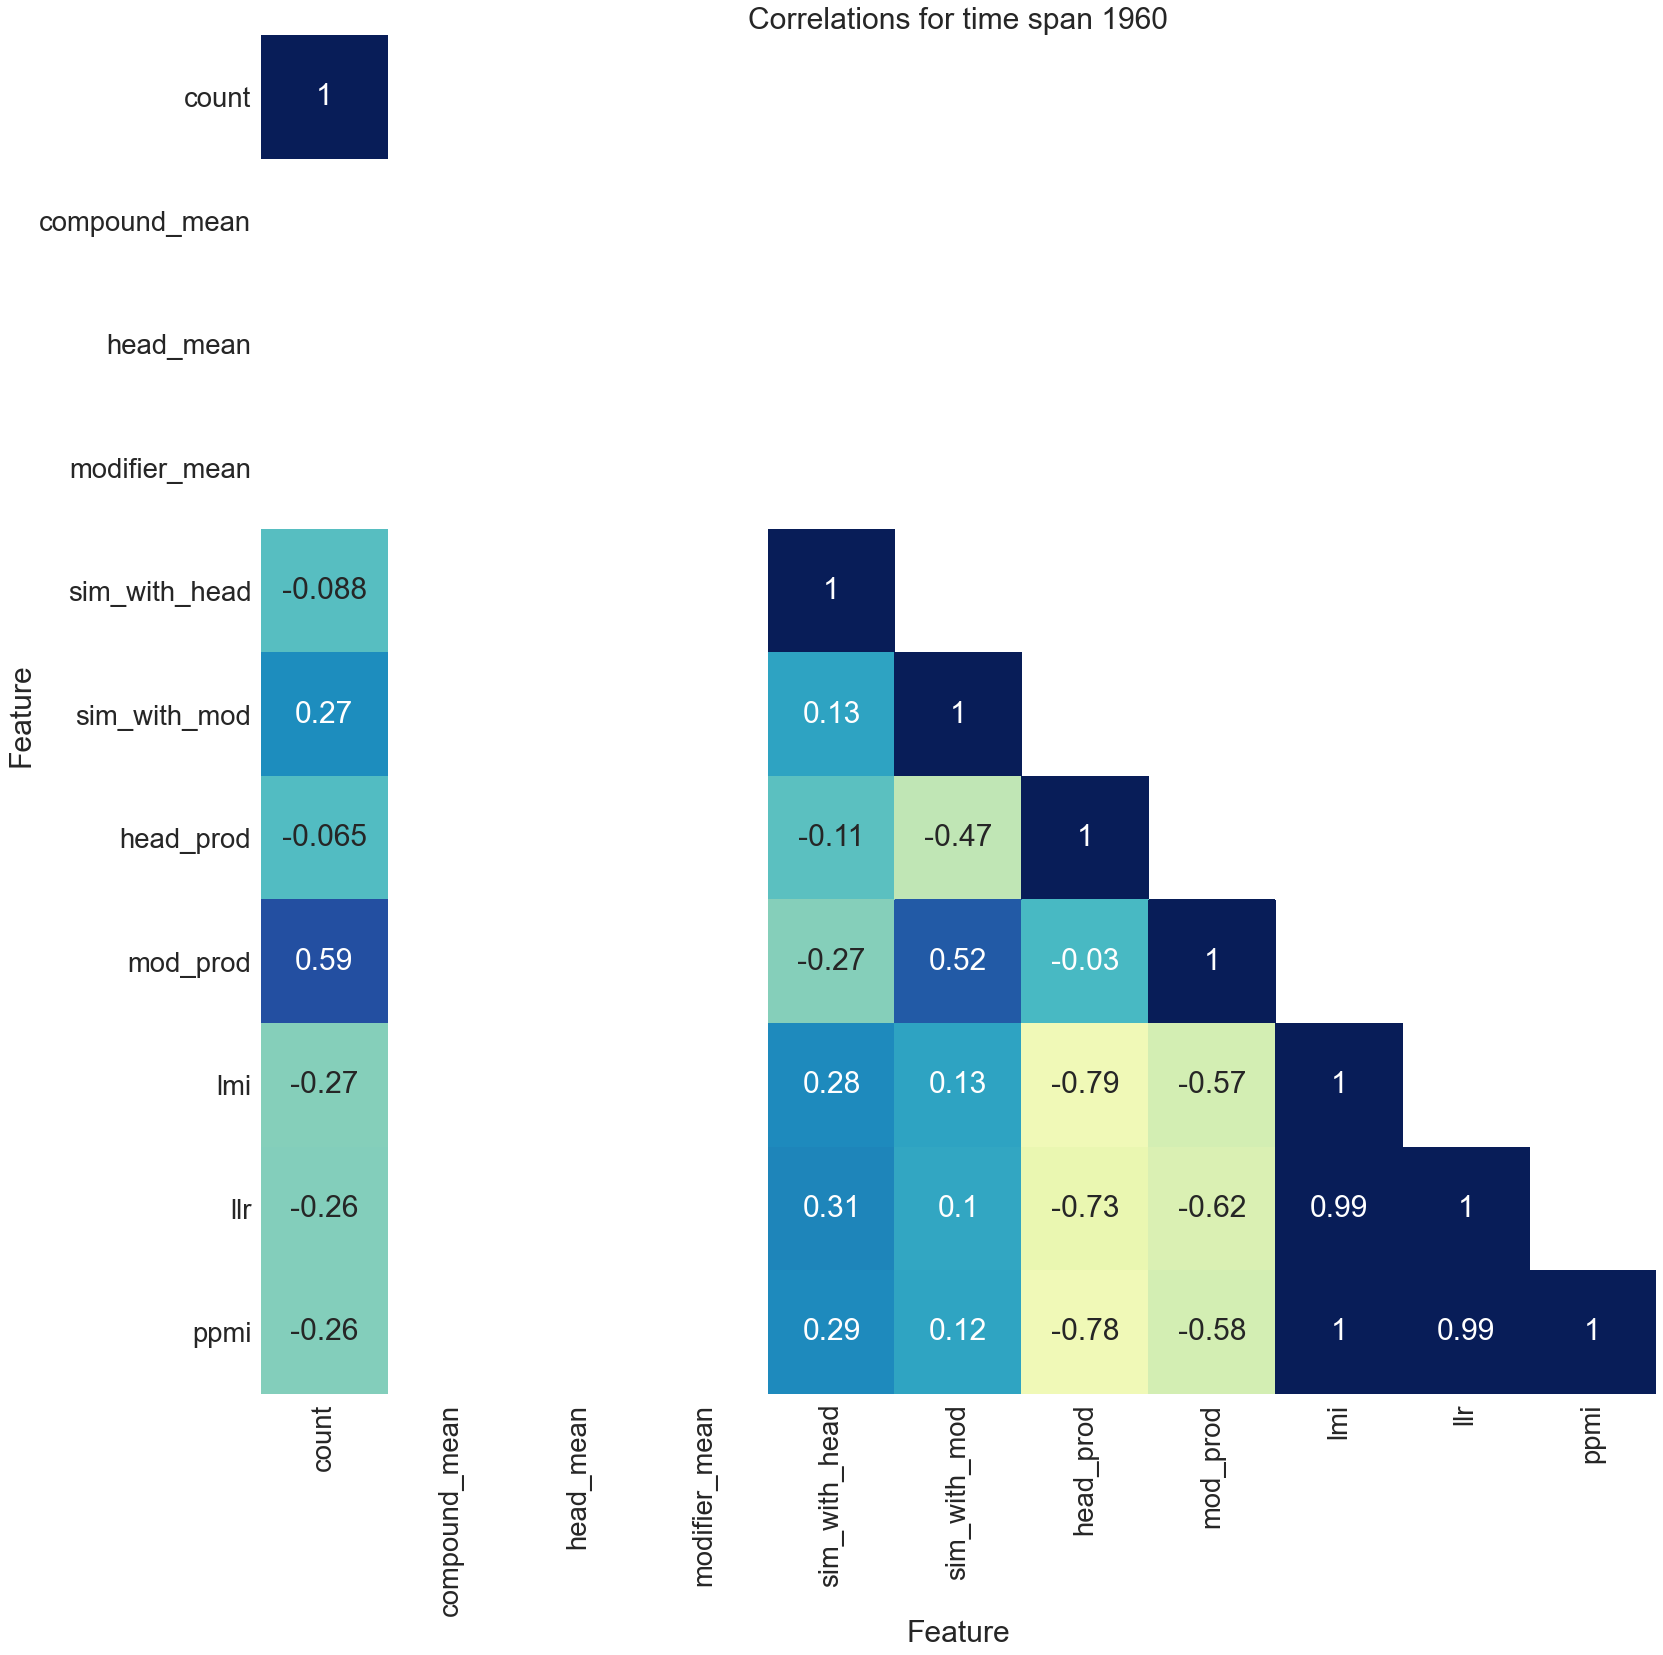

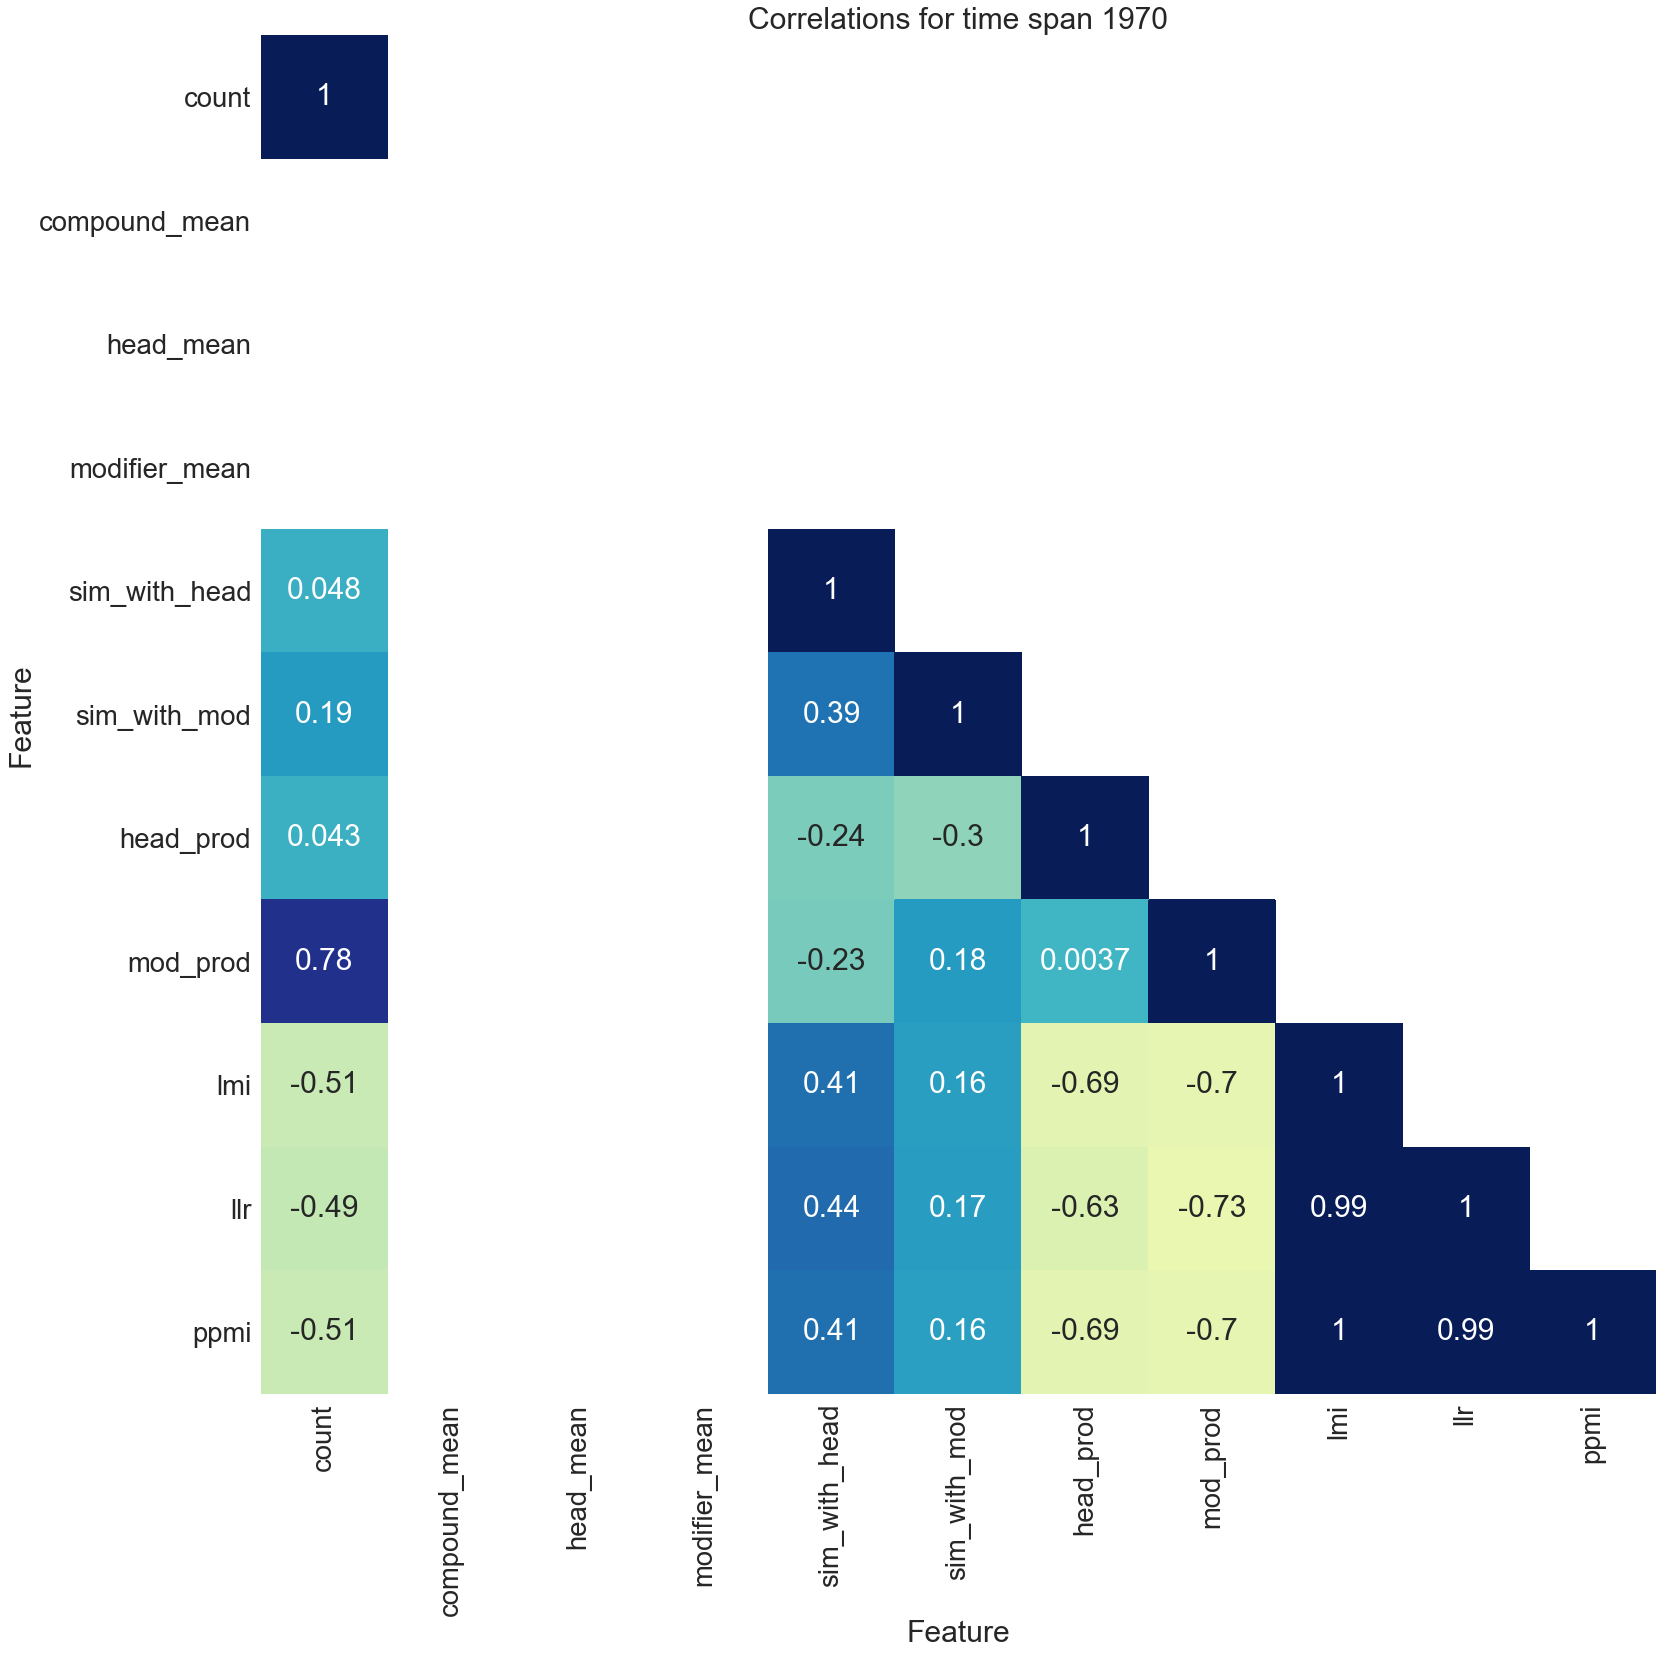

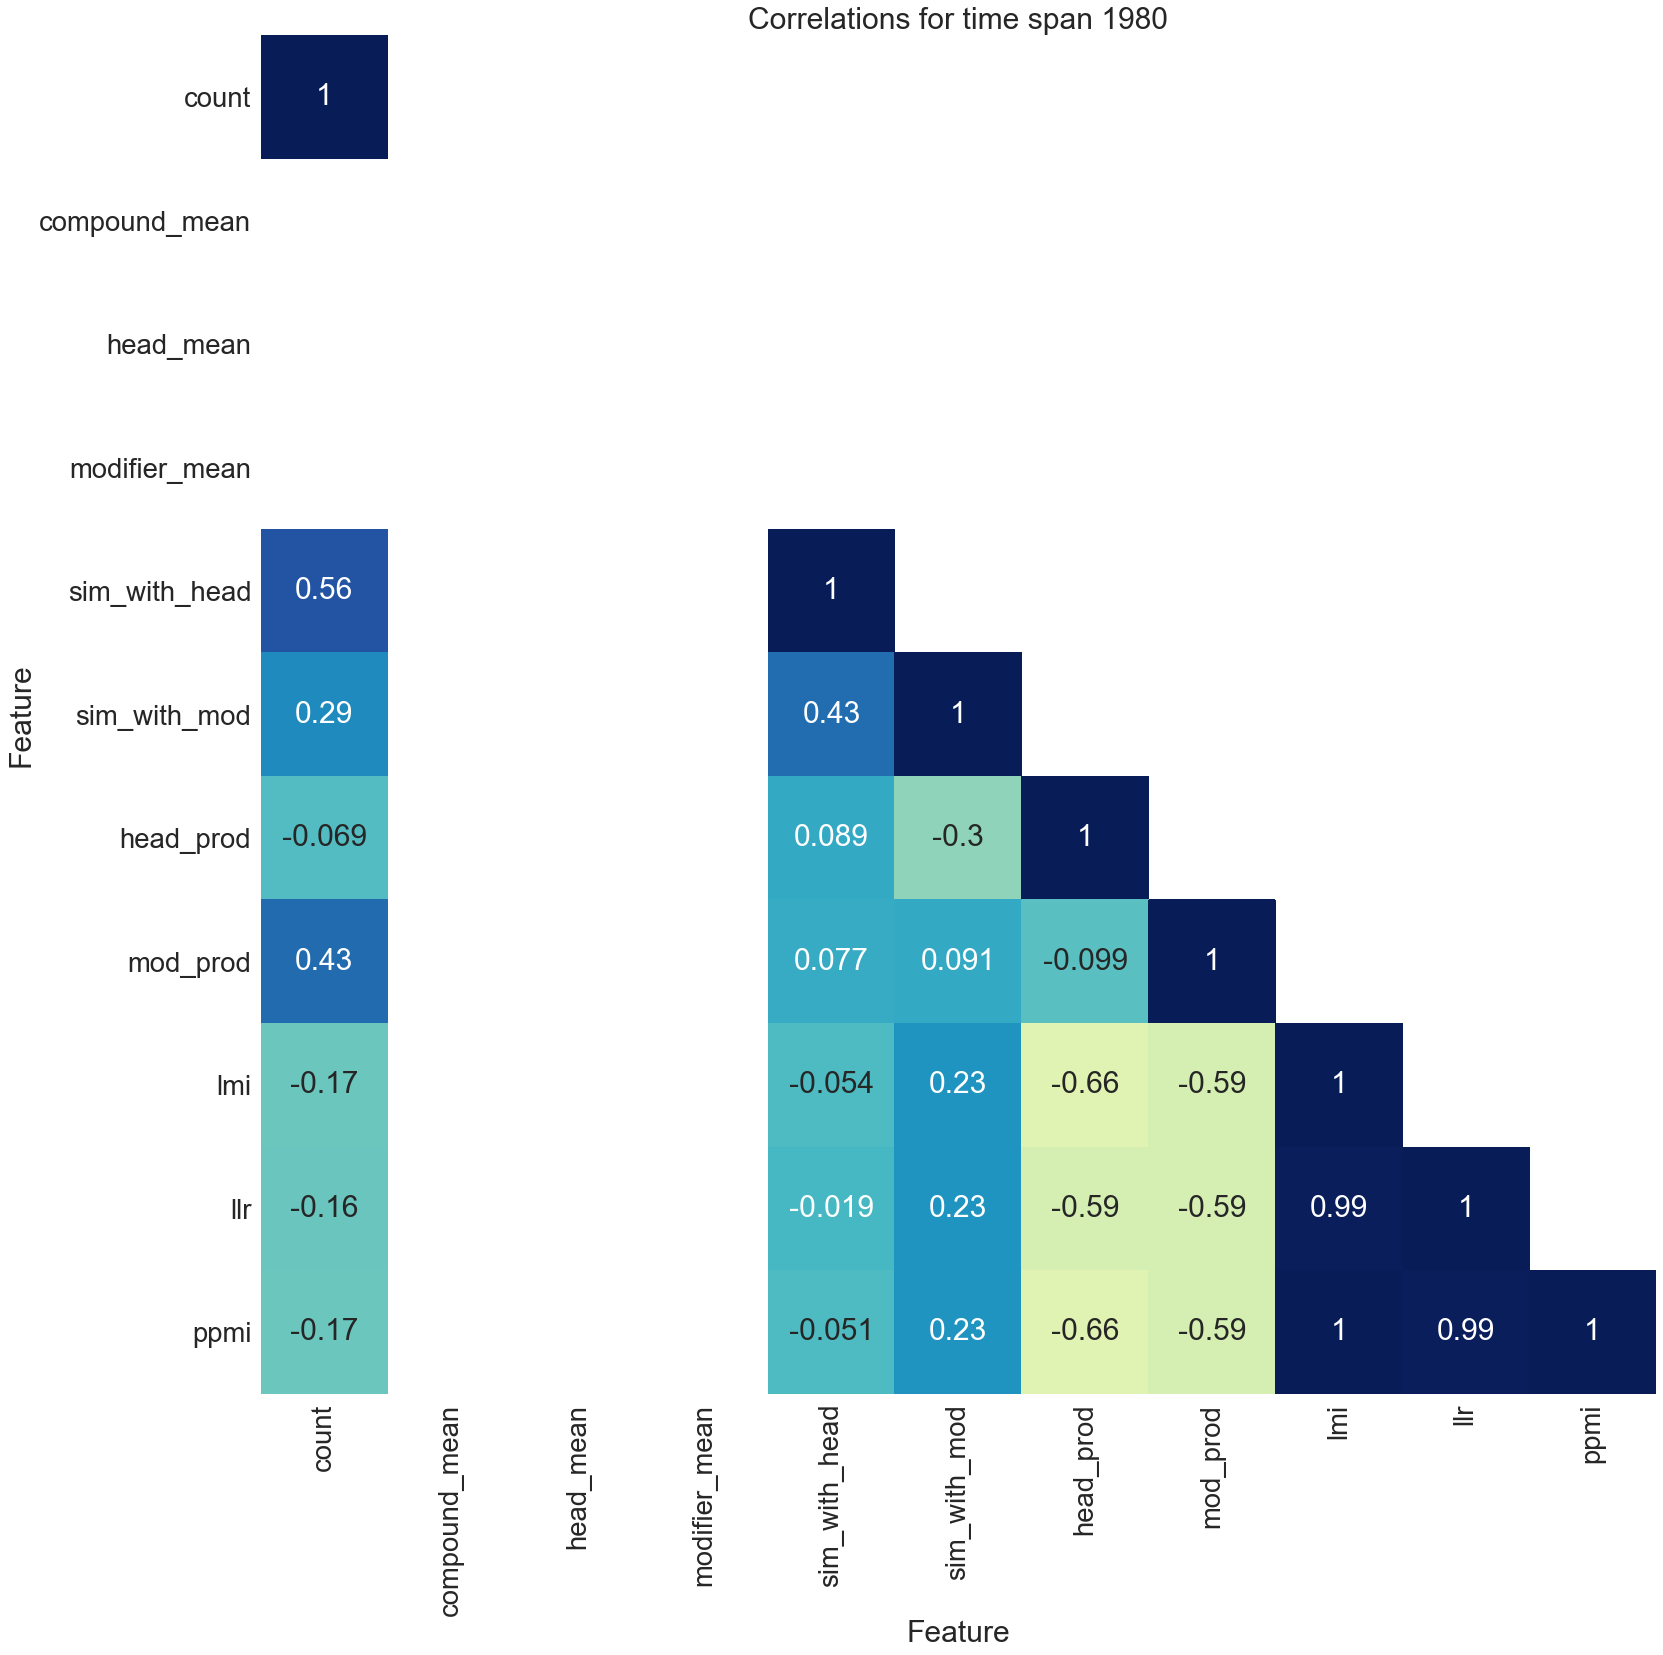

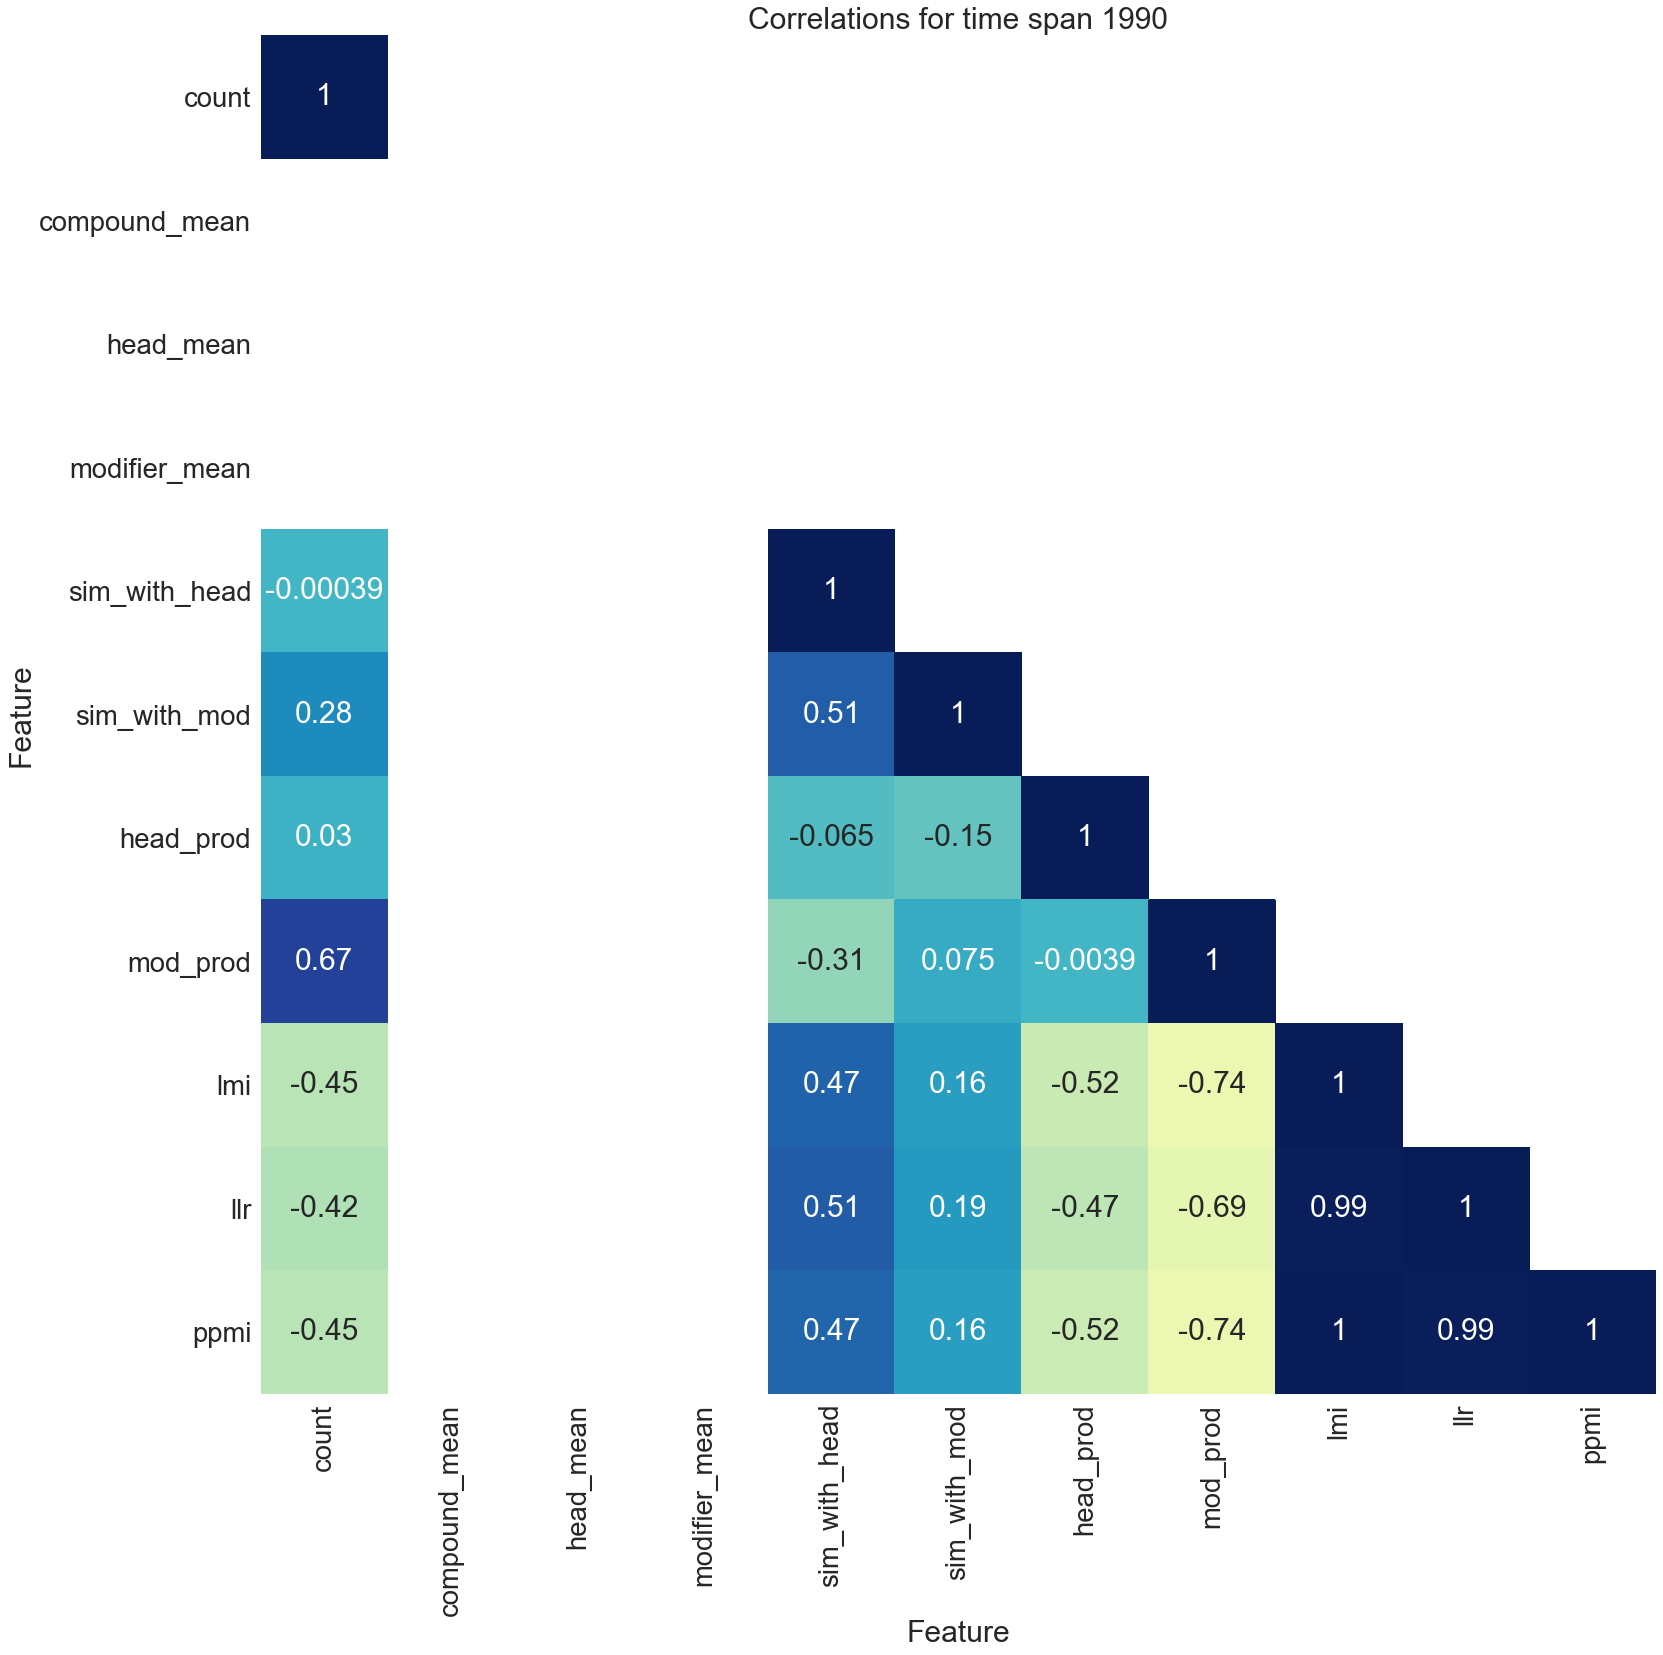

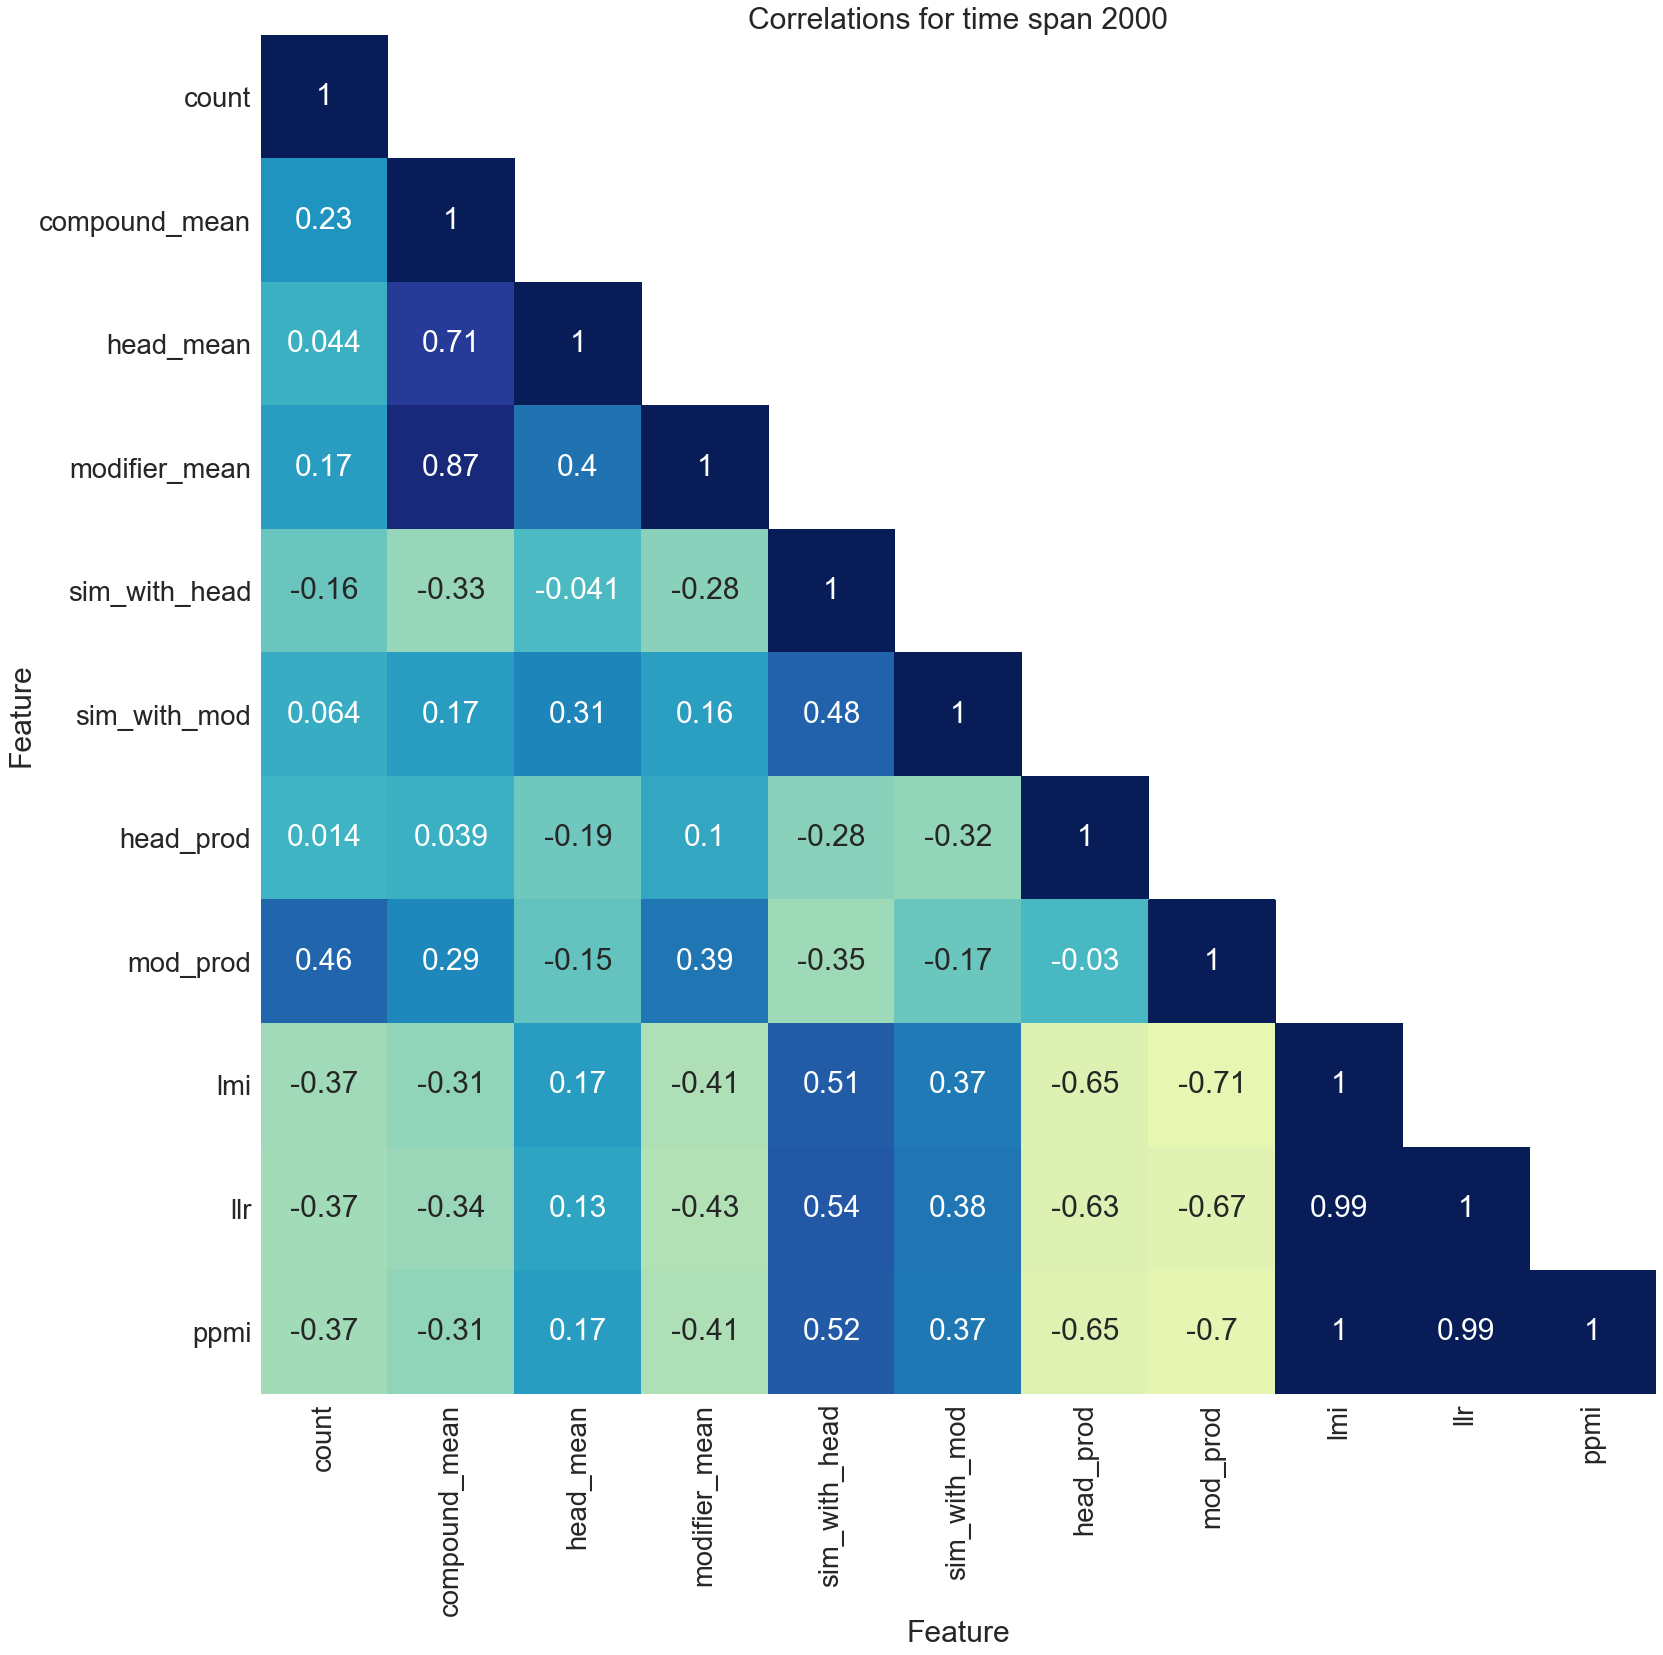

In [95]:
for year, new_df in corr_count_df.groupby(level=0):
    mask = np.zeros_like(new_df.corr())
    mask[np.triu_indices_from(mask, k=1)] = True
    plt.figure(figsize=(25, 25))
    g = sns.heatmap(new_df.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu", mask=mask, cbar=False)
    g.set_title("Correlations for time span {}".format(year))
    plt.savefig(plotdir+'corr-{}_{}_{}_{}_{}.png'.format(year, mode, timespan, cutoff, dimension), dpi=300)
    plt.savefig(plotdir+'corr-{}_{}_{}_{}_{}.jpg'.format(year, mode, timespan, cutoff, dimension), dpi=300)
    plt.savefig(plotdir+'corr-{}_{}_{}_{}_{}.tiff'.format(year, mode, timespan, cutoff, dimension), dpi=300)
    if use_pgf:
        plt.savefig(plotdir+'corr-{}_{}_{}_{}_{}.pgf'.format(year, mode, timespan, cutoff, dimension))